# THIS IS A HYBRID ENSEMBLE. I AM USING RNN FEATURED , GAT FEATURED AND CAPSULENET FEATURED AS THE FIRST LEVEL OF MODEL AND ON THE SECOND LEVEL I WILL USE LOGISTIC REGRESSION

# RNN FEATURED PREDICTIONS

In [4]:
import pandas as pd

# Load the SNLI test data (including true labels)
snli_test_path = "/kaggle/input/stanford-natural-language-inference-corpus/snli_1.0_test.csv"
snli_test_df = pd.read_csv(snli_test_path)

# Define file paths for SNLI prediction files
snli_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_snli_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_snli_predictions.csv",
    "albert": "/kaggle/input/albert/albert_snli_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_snli = "/kaggle/working/combined_snli_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_snli_df = pd.DataFrame(columns=columns)

label_mapping = {'entailment': 0, 'neutral': 1, 'contradiction': 2}

# Load and merge the predictions
for model, path in snli_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_snli_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_snli_df['True_Label'] = snli_test_df['gold_label'].map(label_mapping)

# Convert True_Label to integer type
combined_snli_df['True_Label'] = combined_snli_df['True_Label'].astype('Int64')

# Save the combined DataFrame to CSV
combined_snli_df.to_csv(output_csv_path_snli, index=False)

print(f"Combined SNLI predictions with true labels saved to {output_csv_path_snli}")


Combined SNLI predictions with true labels saved to /kaggle/working/combined_snli_df


In [5]:
combined_snli_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0


In [6]:
# Load the ANLI Round 1 test data (including true labels)
mnli_matched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_matched.csv"
mnli_matched_test_df = pd.read_csv(mnli_matched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_matched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_matched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_matched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_matched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_matched = "/kaggle/working/combined_mnli_matched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_matched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_matched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_matched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_matched_df['True_Label'] = mnli_matched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_matched_df.to_csv(output_csv_path_mnli_matched, index=False)

print(f"Combined MNLI-matched predictions with true labels saved to {output_csv_path_mnli_matched}")


Combined MNLI-matched predictions with true labels saved to /kaggle/working/combined_mnli_matched_df


In [7]:
combined_mnli_matched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005164,0.993364,0.001472,0.017844,0.950246,0.031909,0.010844,0.983012,0.006144,1
1,0.999153,0.000526,0.000321,0.001413,0.002030,0.996557,0.005388,0.007536,0.987076,2
2,0.000989,0.044792,0.954219,0.954781,0.042249,0.002970,0.853862,0.143483,0.002655,0
3,0.994965,0.004808,0.000228,0.000343,0.003511,0.996146,0.004128,0.070757,0.925115,2
4,0.999657,0.000220,0.000123,0.000079,0.000496,0.999425,0.003864,0.029262,0.966875,2


In [8]:
# Load the ANLI Round 1 test data (including true labels)
mnli_mismatched_test_path = "/kaggle/input/nli-dataset-for-sentence-understanding/mnli_validation_mismatched.csv"
mnli_mismatched_test_df = pd.read_csv(mnli_mismatched_test_path)

# Define file paths for ANLI Round 1 prediction files
mnli_mismatched_predictions_paths = {
    "deberta": "/kaggle/input/validation/deberta_mnli_mismatched_val_predictions.csv",
    "roberta": "/kaggle/input/validation/roberta_mnli_mismatched_val_predictions.csv",
    "albert": "/kaggle/input/validation/albert_mnli_mismatched_val_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_mnli_mismatched = "/kaggle/working/combined_mnli_mismatched_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_mnli_mismatched_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in mnli_mismatched_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_mnli_mismatched_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_mnli_mismatched_df['True_Label'] = mnli_mismatched_test_df['label']

# Save the combined DataFrame to CSV
combined_mnli_mismatched_df.to_csv(output_csv_path_mnli_mismatched, index=False)

print(f"Combined MNLI-mismatched predictions with true labels saved to {output_csv_path_mnli_mismatched}")


Combined MNLI-mismatched predictions with true labels saved to /kaggle/working/combined_mnli_mismatched_df


In [9]:
combined_mnli_mismatched_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0


In [10]:
# Load the ANLI Round 1 test data (including true labels)
anli_r1_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r1.csv"
anli_r1_test_df = pd.read_csv(anli_r1_test_path)

# Define file paths for ANLI Round 1 prediction files
anli_r1_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r1_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r1_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r1_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r1 = "/kaggle/working/combined_anli_r1_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r1_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r1_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r1_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r1_df['True_Label'] = anli_r1_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r1_df.to_csv(output_csv_path_anli_r1, index=False)

print(f"Combined ANLI Round 1 predictions with true labels saved to {output_csv_path_anli_r1}")


Combined ANLI Round 1 predictions with true labels saved to /kaggle/working/combined_anli_r1_df


In [11]:
combined_anli_r1_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.015388,0.976305,0.008307,0.996714,0.000376,0.002910,0.322974,0.667628,0.009398,0
1,0.224603,0.501549,0.273848,0.875720,0.000724,0.123556,0.998526,0.000604,0.000869,0
2,0.006642,0.976690,0.016669,0.999484,0.000330,0.000186,0.783352,0.212241,0.004407,0
3,0.966494,0.032235,0.001272,0.000686,0.998181,0.001133,0.002134,0.989523,0.008343,1
4,0.880736,0.028293,0.090971,0.000378,0.000197,0.999425,0.023283,0.013253,0.963464,2


In [12]:
# Load the ANLI Round 2 test data (including true labels)
anli_r2_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r2.csv"
anli_r2_test_df = pd.read_csv(anli_r2_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r2_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r2_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r2_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r2_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r2 = "/kaggle/working/combined_anli_r2_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r2_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r2_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r2_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r2_df['True_Label'] = anli_r2_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r2_df.to_csv(output_csv_path_anli_r2, index=False)

print(f"Combined ANLI Round 2 predictions with true labels saved to {output_csv_path_anli_r2}")


Combined ANLI Round 2 predictions with true labels saved to /kaggle/working/combined_anli_r2_df


In [13]:
combined_anli_r2_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.001309,0.029617,0.969075,0.999506,0.000264,0.000230,0.863365,0.133388,0.003246,0
1,0.724144,0.273676,0.002180,0.026951,0.054230,0.918819,0.072900,0.904344,0.022756,1
2,0.071604,0.917894,0.010503,0.001282,0.998108,0.000610,0.027402,0.972218,0.000380,0
3,0.066162,0.929179,0.004659,0.007091,0.992694,0.000215,0.632171,0.365194,0.002635,1
4,0.906199,0.089873,0.003928,0.006259,0.989432,0.004309,0.064109,0.234642,0.701249,2


In [14]:
# Load the ANLI Round 3 test data (including true labels)
anli_r3_test_path = "/kaggle/input/anli-a-large-scale-nli-benchmark-dataset/test_r3.csv"
anli_r3_test_df = pd.read_csv(anli_r3_test_path)

# Define file paths for ANLI Round 2 prediction files
anli_r3_predictions_paths = {
    "deberta": "/kaggle/input/deberta-nli/deberta_anli_r3_predictions.csv",
    "roberta": "/kaggle/input/roberta/roberta_anli_r3_predictions.csv",
    "albert": "/kaggle/input/albert/albert_anli_r3_predictions.csv",
}

# Specify where you want to save the combined predictions CSV file
output_csv_path_anli_r3 = "/kaggle/working/combined_anli_r3_df"

# Define the column names, placing True_Label at the end
columns = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'True_Label'  # Ensuring True_Label is the last column
]

# Initialize the DataFrame with specified columns
combined_anli_r3_df = pd.DataFrame(columns=columns)

# Load and merge the predictions
for model, path in anli_r3_predictions_paths.items():
    predictions_df = pd.read_csv(path)
    for label in ['Entailment', 'Neutral', 'Contradiction']:
        combined_anli_r3_df[f"{model.capitalize()}_{label}"] = predictions_df[label]

# Assign the true labels to the True_Label column, now positioned at the end
combined_anli_r3_df['True_Label'] = anli_r3_test_df['label']

# Save the combined DataFrame to CSV
combined_anli_r3_df.to_csv(output_csv_path_anli_r3, index=False)

print(f"Combined ANLI Round 3 predictions with true labels saved to {output_csv_path_anli_r3}")


Combined ANLI Round 3 predictions with true labels saved to /kaggle/working/combined_anli_r3_df


In [15]:
combined_anli_r3_df.head()

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0


In [16]:
# Check for missing values
missing_values_anli1 = combined_anli_r1_df.isnull().sum()

missing_values_anli2 = combined_anli_r2_df.isnull().sum()

missing_values_anli3 = combined_anli_r3_df.isnull().sum()

missing_values_snli = combined_snli_df.isnull().sum()

missing_values_mnli_matched = combined_mnli_matched_df.isnull().sum()

missing_values_mnli_mismatched = combined_mnli_mismatched_df.isnull().sum()

In [17]:
missing_values_anli1

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [18]:
missing_values_anli2

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [19]:
missing_values_anli3

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [20]:
missing_values_snli

Deberta_Entailment         0
Deberta_Neutral            0
Deberta_Contradiction      0
Roberta_Entailment         0
Roberta_Neutral            0
Roberta_Contradiction      0
Albert_Entailment          0
Albert_Neutral             0
Albert_Contradiction       0
True_Label               176
dtype: int64

In [21]:
missing_values_mnli_matched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [22]:
missing_values_mnli_mismatched

Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64

In [23]:
combined_snli_df.dropna(subset=['True_Label'], inplace=True)


In [24]:
# Verify missing values again after removal
missing_values_snli_after_removal = combined_snli_df.isnull().sum()
print(missing_values_snli_after_removal)


Deberta_Entailment       0
Deberta_Neutral          0
Deberta_Contradiction    0
Roberta_Entailment       0
Roberta_Neutral          0
Roberta_Contradiction    0
Albert_Entailment        0
Albert_Neutral           0
Albert_Contradiction     0
True_Label               0
dtype: int64


In [25]:
combined_snli_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9824 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Deberta_Entailment     9824 non-null   float64
 1   Deberta_Neutral        9824 non-null   float64
 2   Deberta_Contradiction  9824 non-null   float64
 3   Roberta_Entailment     9824 non-null   float64
 4   Roberta_Neutral        9824 non-null   float64
 5   Roberta_Contradiction  9824 non-null   float64
 6   Albert_Entailment      9824 non-null   float64
 7   Albert_Neutral         9824 non-null   float64
 8   Albert_Contradiction   9824 non-null   float64
 9   True_Label             9824 non-null   Int64  
dtypes: Int64(1), float64(9)
memory usage: 853.8 KB


In [26]:
combined_snli_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label
0,0.034767,0.962592,0.002641,0.012451,0.927093,0.060457,0.008653,0.947434,0.043913,1
1,0.001921,0.319032,0.679047,0.752766,0.242251,0.004983,0.740332,0.256434,0.003235,0
2,0.998783,0.000764,0.000453,0.000254,0.004494,0.995253,0.004677,0.060481,0.934843,2
3,0.001001,0.997708,0.001291,0.005844,0.990736,0.003419,0.034056,0.956687,0.009257,1
4,0.001080,0.301363,0.697557,0.278348,0.718575,0.003076,0.498761,0.499270,0.001969,0
...,...,...,...,...,...,...,...,...,...,...
9995,0.998825,0.001033,0.000142,0.001264,0.028942,0.969794,0.006420,0.057240,0.936340,2
9996,0.000704,0.009793,0.989503,0.780946,0.217053,0.002001,0.894637,0.104095,0.001267,0
9997,0.999171,0.000493,0.000336,0.000054,0.000765,0.999181,0.000838,0.002670,0.996493,2
9998,0.000267,0.002178,0.997556,0.983402,0.015884,0.000714,0.984347,0.015223,0.000430,0


In [27]:
import numpy as np

def calculate_margin(row):
    # Assuming the row only contains the probabilities
    sorted_probs = np.sort(row)  # Sort probabilities in ascending order
    if len(sorted_probs) > 1:
        return sorted_probs[-1] - sorted_probs[-2]  # Difference between the highest and second highest
    else:
        return 0  # This handles the edge case where there is only one probability value



In [28]:
# Applying to a sample DataFrame with made-up column names
combined_snli_df['confidence_margin_entailment'] = combined_snli_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_snli_df['confidence_margin_neutral'] = combined_snli_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_snli_df['confidence_margin_contradiction'] = combined_snli_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_mnli_matched_df['confidence_margin_entailment'] = combined_mnli_matched_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_mnli_matched_df['confidence_margin_neutral'] = combined_mnli_matched_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_mnli_matched_df['confidence_margin_contradiction'] = combined_mnli_matched_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)

# Applying to a sample DataFrame with made-up column names
combined_mnli_mismatched_df['confidence_margin_entailment'] = combined_mnli_mismatched_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_mnli_mismatched_df['confidence_margin_neutral'] = combined_mnli_mismatched_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_mnli_mismatched_df['confidence_margin_contradiction'] = combined_mnli_mismatched_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)

# Applying to a sample DataFrame with made-up column names
combined_anli_r1_df['confidence_margin_entailment'] = combined_anli_r1_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r1_df['confidence_margin_neutral'] = combined_anli_r1_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r1_df['confidence_margin_contradiction'] = combined_anli_r1_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_anli_r2_df['confidence_margin_entailment'] = combined_anli_r2_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r2_df['confidence_margin_neutral'] = combined_anli_r2_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r2_df['confidence_margin_contradiction'] = combined_anli_r2_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


# Applying to a sample DataFrame with made-up column names
combined_anli_r3_df['confidence_margin_entailment'] = combined_anli_r3_df[['Deberta_Entailment', 'Roberta_Entailment', 'Albert_Entailment']].apply(calculate_margin, axis=1)
combined_anli_r3_df['confidence_margin_neutral'] = combined_anli_r3_df[['Deberta_Neutral', 'Roberta_Neutral', 'Albert_Neutral']].apply(calculate_margin, axis=1)
combined_anli_r3_df['confidence_margin_contradiction'] = combined_anli_r3_df[['Deberta_Contradiction', 'Roberta_Contradiction', 'Albert_Contradiction']].apply(calculate_margin, axis=1)


In [29]:
combined_anli_r3_df

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction
0,0.005921,0.960529,0.033551,0.022959,0.976533,0.000509,0.001848,0.998084,0.000067,0,0.017038,0.021552,0.033042
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0,0.047839,0.886640,0.055515
2,0.003428,0.976393,0.020179,0.002020,0.997897,0.000083,0.001014,0.998984,0.000002,0,0.001408,0.001087,0.020096
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0,0.022308,0.000474,0.969120
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0,0.966988,0.505279,0.522189
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.150312,0.806051,0.043637,0.032452,0.068553,0.898994,0.122045,0.254093,0.623862,2,0.028268,0.551958,0.275132
1196,0.971834,0.026294,0.001872,0.009070,0.824654,0.166276,0.001115,0.003229,0.995656,2,0.962764,0.798360,0.829379
1197,0.973818,0.025074,0.001109,0.000352,0.000972,0.998677,0.310862,0.618914,0.070225,2,0.662956,0.593840,0.928452
1198,0.341781,0.226539,0.431681,0.006147,0.073669,0.920184,0.054172,0.317935,0.627893,2,0.287609,0.091397,0.292291


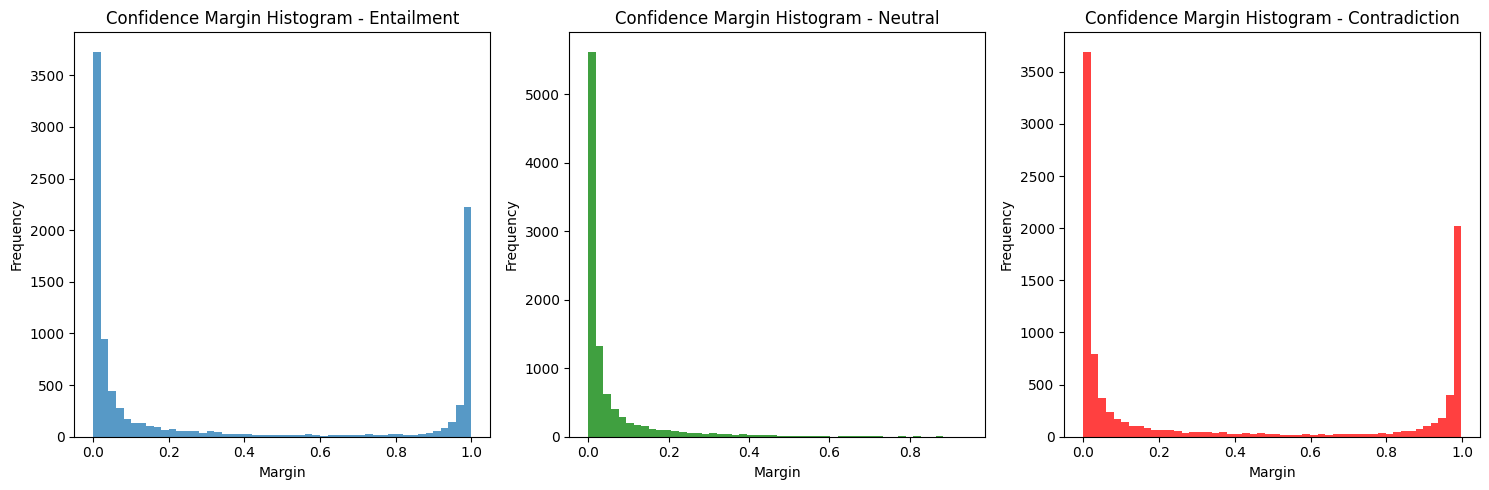

In [30]:
import matplotlib.pyplot as plt

# Plot histograms for the confidence margins
def plot_confidence_margins(df):
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.hist(df['confidence_margin_entailment'], bins=50, alpha=0.75, label='Entailment')
    plt.title('Confidence Margin Histogram - Entailment')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    plt.hist(df['confidence_margin_neutral'], bins=50, alpha=0.75, label='Neutral', color='green')
    plt.title('Confidence Margin Histogram - Neutral')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 3)
    plt.hist(df['confidence_margin_contradiction'], bins=50, alpha=0.75, label='Contradiction', color='red')
    plt.title('Confidence Margin Histogram - Contradiction')
    plt.xlabel('Margin')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

plot_confidence_margins(combined_snli_df)


In [31]:
# Define thresholds based on the distribution
confidence_threshold = 0.8

# Apply threshold and create a new copy of the DataFrame
high_confidence_snli = combined_snli_df[
    (combined_snli_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_snli_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_snli_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()


# Apply threshold and create a new copy of the DataFrame
high_confidence_mnli_matched = combined_mnli_matched_df[
    (combined_mnli_matched_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_mnli_matched_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_mnli_matched_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Apply threshold and create a new copy of the DataFrame
high_confidence_mnli_mismatched = combined_mnli_mismatched_df[
    (combined_mnli_mismatched_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_mnli_mismatched_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_mnli_mismatched_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 1
high_confidence_anli_r1 = combined_anli_r1_df[
    (combined_anli_r1_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r1_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r1_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 2
high_confidence_anli_r2 = combined_anli_r2_df[
    (combined_anli_r2_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r2_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r2_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

# Filter high confidence samples for ANLI round 3
high_confidence_anli_r3 = combined_anli_r3_df[
    (combined_anli_r3_df['confidence_margin_entailment'] >= confidence_threshold) | 
    (combined_anli_r3_df['confidence_margin_neutral'] >= confidence_threshold) |
    (combined_anli_r3_df['confidence_margin_contradiction'] >= confidence_threshold)
].copy()

In [32]:
# Majority vote logic with weights for numeric labels
def majority_vote_with_threshold(row):
    votes = [0, 0, 0]  # Index 0 for entailment, 1 for neutral, 2 for contradiction
    if row['confidence_margin_entailment'] >= confidence_threshold:
        votes[0] += row['confidence_margin_entailment']
    if row['confidence_margin_neutral'] >= confidence_threshold:
        votes[1] += row['confidence_margin_neutral']
    if row['confidence_margin_contradiction'] >= confidence_threshold:
        votes[2] += row['confidence_margin_contradiction']
    
    # Return the index of the highest vote
    return np.argmax(votes)

# Apply the majority vote logic using .loc
high_confidence_snli.loc[:, 'majority_vote'] = high_confidence_snli.apply(majority_vote_with_threshold, axis=1)
# Apply the majority vote logic using .loc
high_confidence_mnli_matched.loc[:, 'majority_vote'] = high_confidence_mnli_matched.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_mnli_mismatched.loc[:, 'majority_vote'] = high_confidence_mnli_mismatched.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r1.loc[:, 'majority_vote'] = high_confidence_anli_r1.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r2.loc[:, 'majority_vote'] = high_confidence_anli_r2.apply(majority_vote_with_threshold, axis=1)
# Apply majority vote logic
high_confidence_anli_r3.loc[:, 'majority_vote'] = high_confidence_anli_r3.apply(majority_vote_with_threshold, axis=1)


In [33]:
high_confidence_anli_r3

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction,majority_vote
1,0.009586,0.934714,0.055700,0.999611,0.000205,0.000185,0.951772,0.048075,0.000153,0,0.047839,0.886640,0.055515,1
3,0.004633,0.023985,0.971382,0.974441,0.024459,0.001100,0.996749,0.000989,0.002262,0,0.022308,0.000474,0.969120,2
4,0.017428,0.633695,0.348877,0.984416,0.011166,0.004419,0.000518,0.128416,0.871066,0,0.966988,0.505279,0.522189,0
5,0.002461,0.150678,0.846861,0.999220,0.000554,0.000227,0.985221,0.014745,0.000034,0,0.013998,0.135933,0.846635,2
8,0.131793,0.776056,0.092151,0.000384,0.002570,0.997046,0.049409,0.904356,0.046236,0,0.082384,0.128299,0.904895,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,0.957103,0.040533,0.002363,0.000066,0.000316,0.999618,0.009265,0.016116,0.974619,2,0.947838,0.024417,0.024999,0
1194,0.945850,0.052813,0.001337,0.000607,0.000853,0.998540,0.000205,0.000291,0.999504,2,0.945243,0.051960,0.000965,0
1196,0.971834,0.026294,0.001872,0.009070,0.824654,0.166276,0.001115,0.003229,0.995656,2,0.962764,0.798360,0.829379,0
1197,0.973818,0.025074,0.001109,0.000352,0.000972,0.998677,0.310862,0.618914,0.070225,2,0.662956,0.593840,0.928452,2


In [34]:
high_confidence_mnli_mismatched

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,True_Label,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction,majority_vote
0,0.999667,0.000160,0.000173,0.000068,0.000402,0.999529,0.000894,0.003787,0.995318,2,0.998773,0.003385,0.004211,0
1,0.998119,0.000962,0.000919,0.000183,0.001511,0.998306,0.006421,0.010224,0.983355,2,0.991698,0.008714,0.014951,0
2,0.000552,0.004809,0.994639,0.986062,0.012020,0.001918,0.975041,0.023354,0.001605,0,0.011021,0.011334,0.992721,2
3,0.827653,0.171961,0.000386,0.000478,0.270953,0.728569,0.001722,0.796122,0.202156,2,0.825931,0.525168,0.526413,0
4,0.000292,0.002875,0.996833,0.975167,0.021904,0.002929,0.965952,0.032748,0.001300,0,0.009215,0.010844,0.993904,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9824,0.000760,0.013837,0.985402,0.972984,0.025382,0.001634,0.925212,0.069991,0.004798,0,0.047772,0.044608,0.980605,2
9825,0.000145,0.003906,0.995949,0.952827,0.045891,0.001281,0.965645,0.032757,0.001598,0,0.012818,0.013134,0.994351,2
9826,0.996226,0.003656,0.000118,0.000353,0.104717,0.894930,0.004991,0.039946,0.955062,2,0.991234,0.064771,0.060132,0
9828,0.997044,0.001226,0.001730,0.000364,0.000717,0.998919,0.019078,0.039258,0.941663,2,0.977966,0.038033,0.057256,0


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf



# Features and Labels
X_snli = high_confidence_snli.drop(['True_Label','confidence_margin_entailment','confidence_margin_neutral','confidence_margin_contradiction','majority_vote'], axis=1).values
y_snli = high_confidence_snli['True_Label'].values

# Features and Labels
X_mnli_matched = high_confidence_mnli_matched.drop(['True_Label','confidence_margin_entailment','confidence_margin_neutral','confidence_margin_contradiction','majority_vote'], axis=1).values
y_mnli_matched = high_confidence_mnli_matched['True_Label'].values

# Features and Labels
X_mnli_mismatched = high_confidence_mnli_mismatched.drop(['True_Label','confidence_margin_entailment','confidence_margin_neutral','confidence_margin_contradiction','majority_vote'], axis=1).values
y_mnli_mismatched = high_confidence_mnli_mismatched['True_Label'].values

# Features and Labels
X_anli_r1 = high_confidence_anli_r1.drop(['True_Label','confidence_margin_entailment','confidence_margin_neutral','confidence_margin_contradiction','majority_vote'], axis=1).values
y_anli_r1 = high_confidence_anli_r1['True_Label'].values

# Features and Labels
X_anli_r2 = high_confidence_anli_r2.drop(['True_Label','confidence_margin_entailment','confidence_margin_neutral','confidence_margin_contradiction','majority_vote'], axis=1).values
y_anli_r2 = high_confidence_anli_r2['True_Label'].values

# Features and Labels
X_anli_r3 = high_confidence_anli_r3.drop(['True_Label','confidence_margin_entailment','confidence_margin_neutral','confidence_margin_contradiction','majority_vote'], axis=1).values
y_anli_r3 = high_confidence_anli_r3['True_Label'].values


2024-05-12 15:36:42.751851: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 15:36:42.751966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 15:36:42.884340: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [36]:
# Extract only the additional features from each dataset
features_snli = high_confidence_snli[['confidence_margin_entailment', 'confidence_margin_neutral', 'confidence_margin_contradiction']].values
features_mnli_matched = high_confidence_mnli_matched[[ 'confidence_margin_entailment', 'confidence_margin_neutral', 'confidence_margin_contradiction']].values
features_mnli_mismatched = high_confidence_mnli_mismatched[[ 'confidence_margin_entailment', 'confidence_margin_neutral', 'confidence_margin_contradiction']].values
features_anli_r1 = high_confidence_anli_r1[[ 'confidence_margin_entailment', 'confidence_margin_neutral', 'confidence_margin_contradiction']].values
features_anli_r2 = high_confidence_anli_r2[[ 'confidence_margin_entailment', 'confidence_margin_neutral', 'confidence_margin_contradiction']].values
features_anli_r3 = high_confidence_anli_r3[[ 'confidence_margin_entailment', 'confidence_margin_neutral', 'confidence_margin_contradiction']].values


In [37]:
X_snli

array([[9.9878270e-01, 7.6433434e-04, 4.5297167e-04, ..., 4.6765395e-03,
        6.0480673e-02, 9.3484277e-01],
       [5.0442386e-04, 4.3001700e-03, 9.9519530e-01, ..., 9.7817034e-01,
        2.1051416e-02, 7.7824460e-04],
       [9.8957914e-01, 5.4418677e-03, 4.9790350e-03, ..., 8.5550435e-02,
        7.5036585e-02, 8.3941300e-01],
       ...,
       [7.0376875e-04, 9.7931010e-03, 9.8950315e-01, ..., 8.9463750e-01,
        1.0409502e-01, 1.2674012e-03],
       [9.9917114e-01, 4.9286430e-04, 3.3603658e-04, ..., 8.3751883e-04,
        2.6697412e-03, 9.9649280e-01],
       [2.6664520e-04, 2.1777824e-03, 9.9755560e-01, ..., 9.8434700e-01,
        1.5223468e-02, 4.2961346e-04]])

In [38]:
features_snli

array([[9.94106161e-01, 5.59870956e-02, 6.04100800e-02],
       [5.73736000e-03, 5.89017100e-03, 9.94264296e-01],
       [9.04028705e-01, 1.89172950e-02, 3.66324000e-02],
       ...,
       [1.13691360e-01, 1.12957690e-01, 9.87502096e-01],
       [9.98333621e-01, 1.90469200e-03, 2.68793000e-03],
       [9.45200000e-04, 6.61004000e-04, 9.96841898e-01]])

In [39]:
# One-hot encode labels for each dataset using TensorFlow/Keras utility
y_encoded_snli = tf.keras.utils.to_categorical(y_snli)
y_encoded_mnli_matched = tf.keras.utils.to_categorical(y_mnli_matched)
y_encoded_mnli_mismatched = tf.keras.utils.to_categorical(y_mnli_mismatched)
y_encoded_anli_r1 = tf.keras.utils.to_categorical(y_anli_r1)
y_encoded_anli_r2 = tf.keras.utils.to_categorical(y_anli_r2)
y_encoded_anli_r3 = tf.keras.utils.to_categorical(y_anli_r3)


In [40]:
from sklearn.model_selection import train_test_split

def prepare_data_splits(X_rnn, features, y_encoded, test_size=0.2, random_state=42):
    # Split the data for the RNN inputs
    X_train_rnn, X_val_rnn, y_train, y_val = train_test_split(
        X_rnn, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded)

    # Split the data for the additional features
    features_train, features_val, _, _ = train_test_split(
        features, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded)

    return X_train_rnn, X_val_rnn, features_train, features_val, y_train, y_val

# Example for SNLI data
X_train_snli_rnn, X_val_snli_rnn, features_train_snli, features_val_snli, y_train_snli, y_val_snli = prepare_data_splits(X_snli, features_snli, y_encoded_snli)
# Example for MNLI-m data
X_train_mnli_matched_rnn, X_val_mnli_matched_rnn, features_train_mnli_matched, features_val_mnli_matched, y_train_mnli_matched, y_val_mnli_matched = prepare_data_splits(X_mnli_matched, features_mnli_matched, y_encoded_mnli_matched)
# Example for MNLI-mm data
X_train_mnli_mismatched_rnn, X_val_mnli_mismatched_rnn, features_train_mnli_mismatched, features_val_mnli_mismatched, y_train_mnli_mismatched, y_val_mnli_mismatched = prepare_data_splits(X_mnli_mismatched, features_mnli_mismatched, y_encoded_mnli_mismatched)
# Example for ANLI round 1 data
X_train_anli_r1_rnn, X_val_anli_r1_rnn, features_train_anli_r1, features_val_anli_r1, y_train_anli_r1, y_val_anli_r1 = prepare_data_splits(X_anli_r1, features_anli_r1, y_encoded_anli_r1)
# Example for ANLI round 2 data
X_train_anli_r2_rnn, X_val_anli_r2_rnn, features_train_anli_r2, features_val_anli_r2, y_train_anli_r2, y_val_anli_r2 = prepare_data_splits(X_anli_r2, features_anli_r2, y_encoded_anli_r2)
# Example for ANLI round 3 data
X_train_anli_r3_rnn, X_val_anli_r3_rnn, features_train_anli_r3, features_val_anli_r3, y_train_anli_r3, y_val_anli_r3 = prepare_data_splits(X_anli_r3, features_anli_r3, y_encoded_anli_r3)


In [41]:
X_train_anli_r3_rnn.shape

(424, 9)

In [42]:
X_train_snli_rnn.shape

(4825, 9)

In [43]:
# Reshape RNN inputs to 3D format for each dataset
X_train_snli_rnn1 = X_train_snli_rnn.reshape(X_train_snli_rnn.shape[0], 1, -1)
X_val_snli_rnn1 = X_val_snli_rnn.reshape(X_val_snli_rnn.shape[0], 1, -1)

X_train_mnli_matched_rnn1 = X_train_mnli_matched_rnn.reshape(X_train_mnli_matched_rnn.shape[0], 1, -1)
X_val_mnli_matched_rnn1 = X_val_mnli_matched_rnn.reshape(X_val_mnli_matched_rnn.shape[0], 1, -1)

X_train_mnli_mismatched_rnn1 = X_train_mnli_mismatched_rnn.reshape(X_train_mnli_mismatched_rnn.shape[0], 1, -1)
X_val_mnli_mismatched_rnn1 = X_val_mnli_mismatched_rnn.reshape(X_val_mnli_mismatched_rnn.shape[0], 1, -1)

X_train_anli_r1_rnn1 = X_train_anli_r1_rnn.reshape(X_train_anli_r1_rnn.shape[0], 1, -1)
X_val_anli_r1_rnn1 = X_val_anli_r1_rnn.reshape(X_val_anli_r1_rnn.shape[0], 1, -1)

X_train_anli_r2_rnn1 = X_train_anli_r2_rnn.reshape(X_train_anli_r2_rnn.shape[0], 1, -1)
X_val_anli_r2_rnn1 = X_val_anli_r2_rnn.reshape(X_val_anli_r2_rnn.shape[0], 1, -1)

X_train_anli_r3_rnn1 = X_train_anli_r3_rnn.reshape(X_train_anli_r3_rnn.shape[0], 1, -1)
X_val_anli_r3_rnn1 = X_val_anli_r3_rnn.reshape(X_val_anli_r3_rnn.shape[0], 1, -1)


In [44]:
# Reshape additional features to 3D format for each dataset
features_train_snli1 = features_train_snli.reshape(features_train_snli.shape[0], 1, -1)
features_val_snli1 = features_val_snli.reshape(features_val_snli.shape[0], 1, -1)

features_train_mnli_matched1 = features_train_mnli_matched.reshape(features_train_mnli_matched.shape[0], 1, -1)
features_val_mnli_matched1 = features_val_mnli_matched.reshape(features_val_mnli_matched.shape[0], 1, -1)

features_train_mnli_mismatched1 = features_train_mnli_mismatched.reshape(features_train_mnli_mismatched.shape[0], 1, -1)
features_val_mnli_mismatched1 = features_val_mnli_mismatched.reshape(features_val_mnli_mismatched.shape[0], 1, -1)

features_train_anli_r11 = features_train_anli_r1.reshape(features_train_anli_r1.shape[0], 1, -1)
features_val_anli_r11 = features_val_anli_r1.reshape(features_val_anli_r1.shape[0], 1, -1)

features_train_anli_r21 = features_train_anli_r2.reshape(features_train_anli_r2.shape[0], 1, -1)
features_val_anli_r21 = features_val_anli_r2.reshape(features_val_anli_r2.shape[0], 1, -1)

features_train_anli_r31 = features_train_anli_r3.reshape(features_train_anli_r3.shape[0], 1, -1)
features_val_anli_r31 = features_val_anli_r3.reshape(features_val_anli_r3.shape[0], 1, -1)


In [45]:
X_train_anli_r3_rnn1.shape

(424, 1, 9)

In [46]:
X_train_snli_rnn1.shape

(4825, 1, 9)

In [47]:
X_train_anli_r3_rnn1

array([[[3.00472140e-03, 1.24128185e-01, 8.72867100e-01, ...,
         9.97314900e-01, 2.55982180e-03, 1.25263440e-04]],

       [[2.46055260e-03, 1.51227360e-01, 8.46312050e-01, ...,
         9.99451200e-01, 5.31884100e-04, 1.69584300e-05]],

       [[6.34984600e-02, 9.23785500e-01, 1.27159770e-02, ...,
         2.98160500e-01, 6.97114350e-01, 4.72512800e-03]],

       ...,

       [[8.73325500e-01, 1.25248500e-01, 1.42598830e-03, ...,
         3.53178740e-04, 1.71298920e-02, 9.82516940e-01]],

       [[6.38777200e-03, 9.24302000e-01, 6.93102550e-02, ...,
         9.99517440e-01, 3.27918560e-04, 1.54646840e-04]],

       [[9.06661000e-02, 9.05081570e-01, 4.25238860e-03, ...,
         1.23509100e-02, 5.20660170e-02, 9.35583200e-01]]])

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Dropout, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Flatten


def build_and_train_model(X_train_rnn, features_train, y_train, X_val_rnn, features_val, y_val, epochs=20, batch_size=32):
    sequence_input_shape = X_train_rnn.shape[1:]
    features_input_shape = features_train.shape[1:]

    sequence_input = Input(shape=sequence_input_shape, name='sequence_input')
    rnn = SimpleRNN(64, return_sequences=False)(sequence_input)
    rnn = Dropout(0.5)(rnn)

    features_input = Input(shape=features_input_shape, name='features_input')
    features = Dense(32, activation='relu')(features_input)
    features = Dropout(0.2)(features)
    features = Flatten()(features)  # Ensure the features tensor is flattened

    concatenated = Concatenate()([rnn, features])
    output = Dense(3, activation='softmax')(concatenated)

    model = Model(inputs=[sequence_input, features_input], outputs=output)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3)

    history = model.fit(
        [X_train_rnn, features_train], y_train,
        validation_data=([X_val_rnn, features_val], y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping]
    )

    evaluation = model.evaluate([X_val_rnn, features_val], y_val, verbose=1)
    return model, history, evaluation


In [49]:
# Let's train and evaluate the model using the SNLI data we prepared earlier
model_snli, history_snli, evaluation_snli = build_and_train_model(
    X_train_snli_rnn1, features_train_snli1, y_train_snli, 
    X_val_snli_rnn1, features_val_snli1, y_val_snli, 
    epochs=20, batch_size=32
)

print("Evaluation on SNLI Validation Data:", evaluation_snli)
print("History keys:", history_snli.history.keys())


Epoch 1/20
 93/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6609 - loss: 0.7976

I0000 00:00:1715528218.794651      84 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


151/151 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7448 - loss: 0.6565 - val_accuracy: 0.9528 - val_loss: 0.1748
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9487 - loss: 0.1914 - val_accuracy: 0.9569 - val_loss: 0.1480
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9528 - loss: 0.1600 - val_accuracy: 0.9602 - val_loss: 0.1418
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9653 - loss: 0.1325 - val_accuracy: 0.9611 - val_loss: 0.1404
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9610 - loss: 0.1424 - val_accuracy: 0.9611 - val_loss: 0.1402
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9642 - loss: 0.1292 - val_accuracy: 0.9611 - val_loss: 0.1402
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9621 - loss: 0.1388 - val_accuracy: 0.9594 - val_loss: 0.1405
Epoch 8/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9606 - loss: 0.1358 - val_accuracy: 0.9594 - va

In [50]:
# Let's train and evaluate the model using the mnli_matched data we prepared earlier
model_mnli_matched, history_mnli_matched, evaluation_mnli_matched = build_and_train_model(
    X_train_mnli_matched_rnn1, features_train_mnli_matched1, y_train_mnli_matched, 
    X_val_mnli_matched_rnn1, features_val_mnli_matched1, y_val_mnli_matched, 
    epochs=20, batch_size=32
)

print("Evaluation on MNLI-m Validation Data:", evaluation_mnli_matched)
print("History keys:", history_mnli_matched.history.keys())


Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.8183 - loss: 0.5576 - val_accuracy: 0.9650 - val_loss: 0.1537
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9668 - loss: 0.1537 - val_accuracy: 0.9650 - val_loss: 0.1381
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9663 - loss: 0.1372 - val_accuracy: 0.9650 - val_loss: 0.1333
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9574 - loss: 0.1720 - val_accuracy: 0.9667 - val_loss: 0.1330
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9693 - loss: 0.1283 - val_accuracy: 0.9676 - val_loss: 0.1315
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9619 - loss: 0.1562 - val_accuracy: 0.9667 - val_loss: 0.1326
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9642 - loss: 0.1418 - val_accuracy: 0.9676 - val_loss: 0.1316
Epoch 8/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9690 - loss: 0.1317 - val_accuracy: 0

In [51]:
# Let's train and evaluate the model using the mnli_mismatched data we prepared earlier
model_mnli_mismatched, history_mnli_mismatched, evaluation_mnli_mismatched = build_and_train_model(
    X_train_mnli_mismatched_rnn1, features_train_mnli_mismatched1, y_train_mnli_mismatched, 
    X_val_mnli_mismatched_rnn1, features_val_mnli_mismatched1, y_val_mnli_mismatched, 
    epochs=20, batch_size=32
)

print("Evaluation on MNLI-mm Validation Data:", evaluation_mnli_mismatched)
print("History keys:", history_mnli_mismatched.history.keys())


Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.6842 - loss: 0.7402 - val_accuracy: 0.9636 - val_loss: 0.1580
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9707 - loss: 0.1411 - val_accuracy: 0.9645 - val_loss: 0.1378
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9670 - loss: 0.1317 - val_accuracy: 0.9662 - val_loss: 0.1333
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9651 - loss: 0.1251 - val_accuracy: 0.9653 - val_loss: 0.1321
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9659 - loss: 0.1219 - val_accuracy: 0.9645 - val_loss: 0.1311
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9669 - loss: 0.1318 - val_accuracy: 0.9645 - val_loss: 0.1310
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9656 - loss: 0.1298 - val_accuracy: 0.9645 - val_loss: 0.1306
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9606 - loss: 0.1314 - val_accuracy: 0

In [52]:
# Let's train and evaluate the model using the ANLI round 1 data we prepared earlier
model_anli_r1, history_anli_r1, evaluation_anli_r1 = build_and_train_model(
    X_train_anli_r1_rnn1, features_train_anli_r11, y_train_anli_r1, 
    X_val_anli_r1_rnn1, features_val_anli_r11, y_val_anli_r1, 
    epochs=20, batch_size=32
)

print("Evaluation on ANLI round 1 Validation Data:", evaluation_anli_r1)
print("History keys:", history_anli_r1.history.keys())


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 441ms/step - accuracy: 0.2288 - loss: 1.4456 - val_accuracy: 0.4302 - val_loss: 1.2469
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2692 - loss: 1.2315 - val_accuracy: 0.2791 - val_loss: 1.0590
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4686 - loss: 1.0526 - val_accuracy: 0.6279 - val_loss: 0.9246
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5898 - loss: 0.9501 - val_accuracy: 0.6279 - val_loss: 0.8259
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6541 - loss: 0.8205 - val_accuracy: 0.6860 - val_loss: 0.7571
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7400 - loss: 0.7498 - val_accuracy: 0.7209 - val_loss: 0.7078
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6829 - loss: 0.7061 - val_accuracy: 0.7326 - val_loss: 0.6737
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7464 - loss: 0.6527 - val_accuracy: 0.7442 - val_los

In [53]:
# Let's train and evaluate the model using the ANLI round 2 data we prepared earlier
model_anli_r2, history_anli_r2, evaluation_anli_r2 = build_and_train_model(
    X_train_anli_r2_rnn1, features_train_anli_r21, y_train_anli_r2, 
    X_val_anli_r2_rnn1, features_val_anli_r21, y_val_anli_r2, 
    epochs=20, batch_size=32
)

print("Evaluation on ANLI round 2 Validation Data:", evaluation_anli_r2)
print("History keys:", history_anli_r2.history.keys())


Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 325ms/step - accuracy: 0.3327 - loss: 1.1350 - val_accuracy: 0.6404 - val_loss: 0.9623
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5743 - loss: 0.9588 - val_accuracy: 0.6180 - val_loss: 0.8939
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6572 - loss: 0.8555 - val_accuracy: 0.6404 - val_loss: 0.8521
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6874 - loss: 0.7767 - val_accuracy: 0.6517 - val_loss: 0.8203
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6777 - loss: 0.7865 - val_accuracy: 0.6966 - val_loss: 0.8014
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7019 - loss: 0.7538 - val_accuracy: 0.7079 - val_loss: 0.7876
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6744 - loss: 0.7711 - val_accuracy: 0.7191 - val_loss: 0.7782
Epoch 8/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7194 - loss: 0.7099 - val_accuracy: 0.7191 - val_los

In [54]:
# Let's train and evaluate the model using the ANLI round 3 data we prepared earlier
model_anli_r3, history_anli_r3, evaluation_anli_r3 = build_and_train_model(
    X_train_anli_r3_rnn1, features_train_anli_r31, y_train_anli_r3, 
    X_val_anli_r3_rnn1, features_val_anli_r31, y_val_anli_r3, 
    epochs=20, batch_size=32
)

print("Evaluation on ANLI round 3 Validation Data:", evaluation_anli_r3)
print("History keys:", history_anli_r3.history.keys())


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step - accuracy: 0.2307 - loss: 1.1884 - val_accuracy: 0.5094 - val_loss: 1.0644
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5055 - loss: 1.0261 - val_accuracy: 0.6321 - val_loss: 0.9544
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5727 - loss: 0.9388 - val_accuracy: 0.6509 - val_loss: 0.8782
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6688 - loss: 0.8526 - val_accuracy: 0.6792 - val_loss: 0.8277
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6354 - loss: 0.8511 - val_accuracy: 0.6981 - val_loss: 0.7911
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6560 - loss: 0.7849 - val_accuracy: 0.7075 - val_loss: 0.7660
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6676 - loss: 0.7868 - val_accuracy: 0.6981 - val_loss: 0.7523
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7395 - loss: 0.7110 - val_accuracy: 0.6981 - val_los

In [55]:
X_rnn_all_tasks = np.concatenate([X_snli, X_mnli_matched, X_mnli_mismatched, X_anli_r1, X_anli_r2, X_anli_r3])
features_all_tasks = np.concatenate([features_snli, features_mnli_matched, features_mnli_mismatched, features_anli_r1, features_anli_r2, features_anli_r3])
y_encoded_all_tasks = np.concatenate([y_encoded_snli, y_encoded_mnli_matched, y_encoded_mnli_mismatched, y_encoded_anli_r1, y_encoded_anli_r2, y_encoded_anli_r3])


# Example for SNLI data
X_train_all_rnn, X_val_all_rnn, features_train_all, features_val_all, y_train_all, y_val_all = prepare_data_splits(X_rnn_all_tasks, features_all_tasks, y_encoded_all_tasks)

X_train_all_rnn1 = X_train_all_rnn.reshape(X_train_all_rnn.shape[0], 1, -1)
X_val_all_rnn1 = X_val_all_rnn.reshape(X_val_all_rnn.shape[0], 1, -1)

# Reshape additional features to 3D format for each dataset
features_train_all1 = features_train_all.reshape(features_train_all.shape[0], 1, -1)
features_val_all1 = features_val_all.reshape(features_val_all.shape[0], 1, -1)


# Let's train and evaluate the model using the ANLI round 3 data we prepared earlier
model_all, history_all, evaluation_all = build_and_train_model(
    X_train_all_rnn1, features_train_all1, y_train_all, 
    X_val_all_rnn1, features_val_all1, y_val_all, 
    epochs=20, batch_size=32
)

print("Evaluation on All Tasks Validation Data:", evaluation_all)
print("History keys:", history_all.history.keys())


Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9055 - loss: 0.3410 - val_accuracy: 0.9479 - val_loss: 0.1666
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9464 - loss: 0.1818 - val_accuracy: 0.9513 - val_loss: 0.1655
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9396 - loss: 0.2021 - val_accuracy: 0.9513 - val_loss: 0.1655
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9448 - loss: 0.1944 - val_accuracy: 0.9492 - val_loss: 0.1658
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9455 - loss: 0.1902 - val_accuracy: 0.9526 - val_loss: 0.1644
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9436 - loss: 0.1926 - val_accuracy: 0.9529 - val_loss: 0.1645
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9469 - loss: 0.1828 - val_accuracy: 0.9521 - val_loss: 0.1647
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9455 - loss: 0.1829 - val_accuracy: 

In [56]:
# After training the model
model_all.save('RNN_feature_ensemble.h5')  # Saves the model in HDF5 format


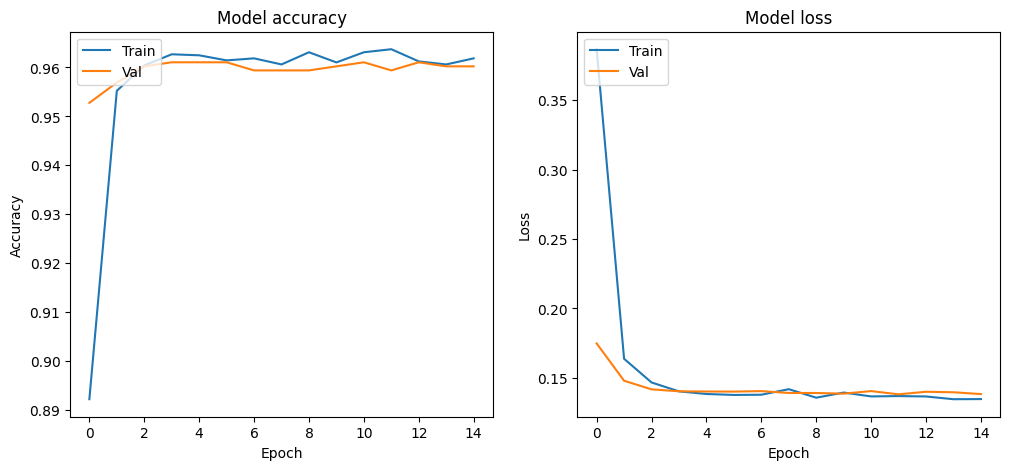

In [57]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_snli)


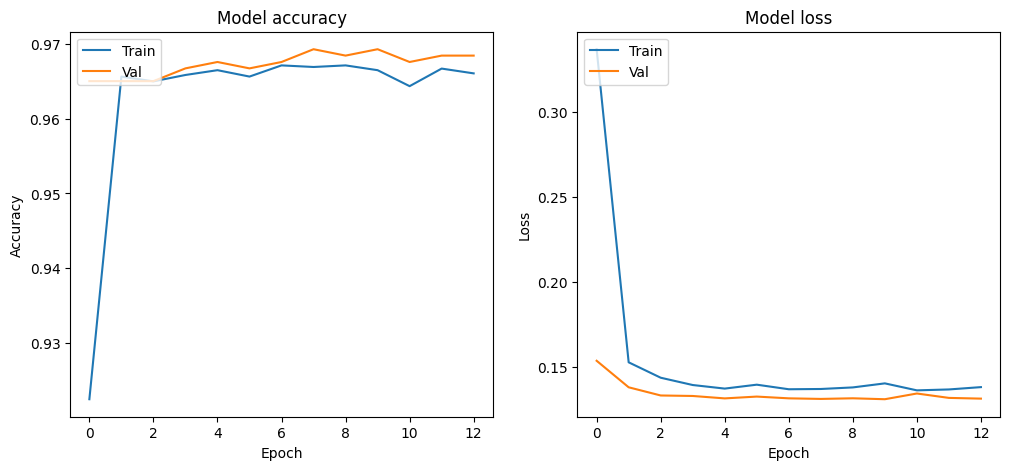

In [58]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_mnli_matched)


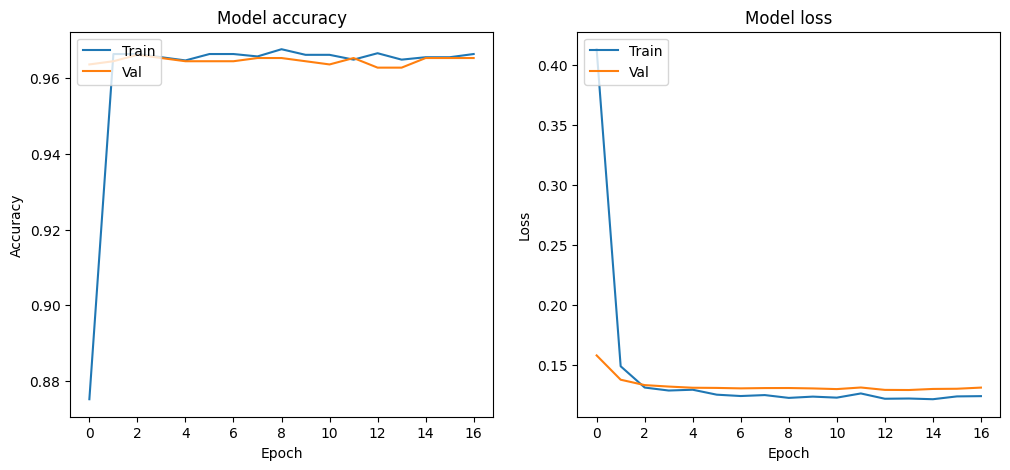

In [59]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_mnli_mismatched)


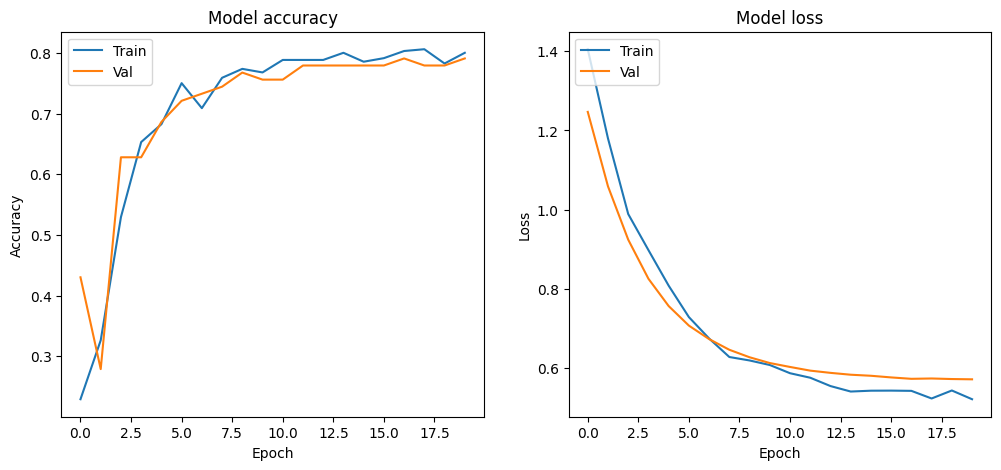

In [60]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_anli_r1)


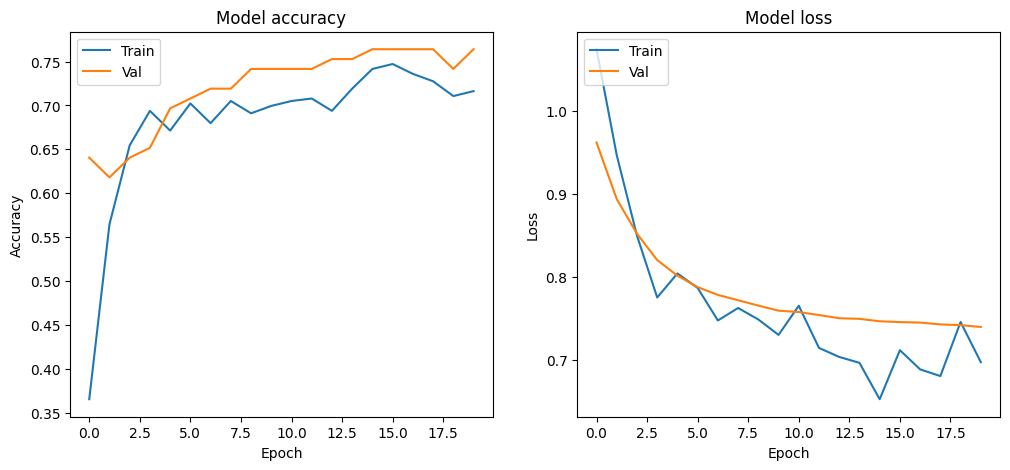

In [61]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_anli_r2)


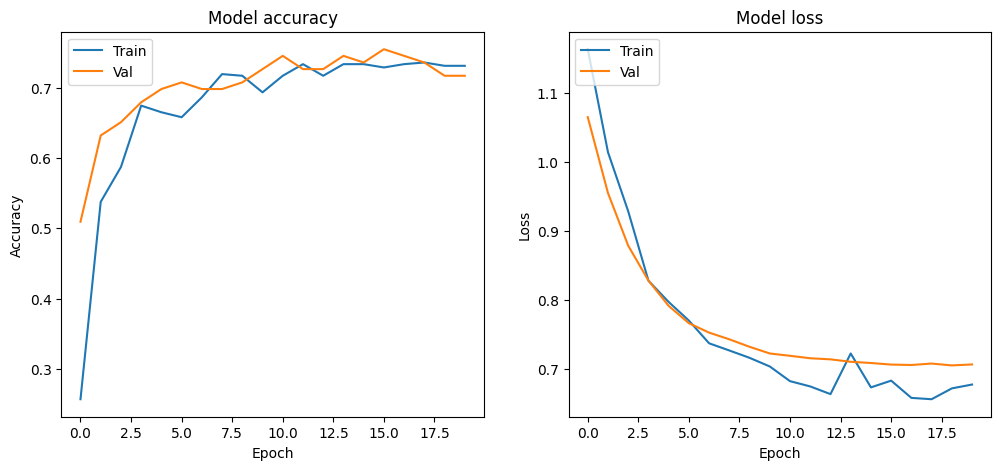

In [62]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_anli_r3)


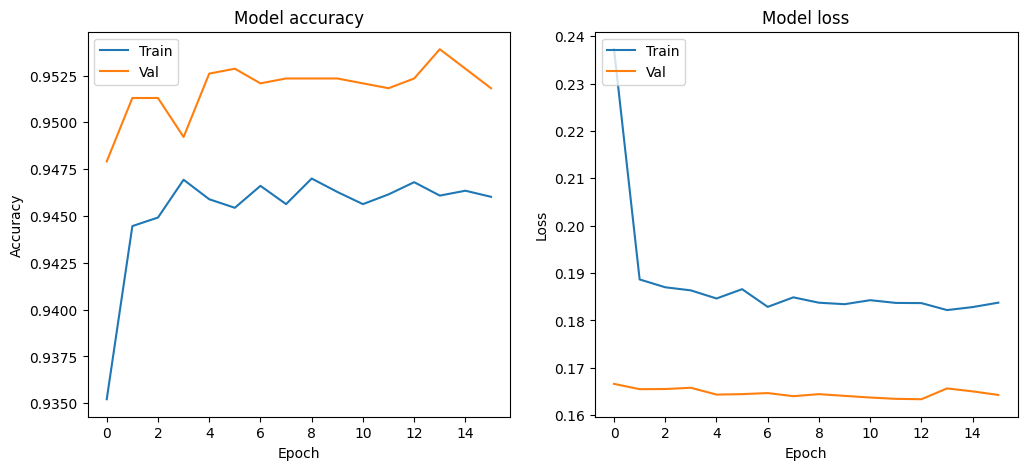

In [63]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')

    plt.show()

plot_training_history(history_all)


In [64]:
def create_predictions_dataframe(model, X_val_rnn, features_val, y_val_true, name):
    # Predict probabilities
    predicted_probs = model.predict([X_val_rnn, features_val])
    # Convert true one-hot encoded labels back to label indices
    true_labels = np.argmax(y_val_true, axis=1)
    # Create DataFrame with predicted probabilities and true labels
    predictions_df = pd.DataFrame(predicted_probs, columns=[f'{name}_Entailment', f'{name}_Neutral', f'{name}_Contradiction'])
    predictions_df[f'True_Label'] = true_labels
    return predictions_df

In [65]:
# Create predictions dataframes for each task
RNN_predictions_SNLI = create_predictions_dataframe(model_snli, X_val_snli_rnn1, features_val_snli1, y_val_snli, "RNN")
RNN_predictions_MNLI_matched = create_predictions_dataframe(model_mnli_matched, X_val_mnli_matched_rnn1, features_val_mnli_matched1, y_val_mnli_matched, "RNN")
RNN_predictions_MNLI_mismatched = create_predictions_dataframe(model_mnli_mismatched, X_val_mnli_mismatched_rnn1, features_val_mnli_mismatched1, y_val_mnli_mismatched, "RNN")
RNN_predictions_ANLI_R1 = create_predictions_dataframe(model_anli_r1, X_val_anli_r1_rnn1, features_val_anli_r11, y_val_anli_r1, "RNN")
RNN_predictions_ANLI_R2 = create_predictions_dataframe(model_anli_r2, X_val_anli_r2_rnn1, features_val_anli_r21, y_val_anli_r2, "RNN")
RNN_predictions_ANLI_R3 = create_predictions_dataframe(model_anli_r3, X_val_anli_r3_rnn1, features_val_anli_r31, y_val_anli_r3, "RNN")

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


In [66]:
RNN_predictions_ANLI_R3

,RNN_Entailment,RNN_Neutral,RNN_Contradiction,True_Label
0,0.925944,0.027520,0.046536,0
1,0.009124,0.160373,0.830503,2
2,0.009670,0.167656,0.822674,1
3,0.015575,0.225223,0.759202,2
4,0.938789,0.020239,0.040972,0
...,...,...,...,...
101,0.024423,0.298233,0.677344,2
102,0.010566,0.175728,0.813706,2
103,0.009732,0.167842,0.822426,1
104,0.018710,0.276872,0.704419,2


In [67]:
RNN_predictions_ALL = create_predictions_dataframe(model_all, X_val_all_rnn1, features_val_all1, y_val_all, "RNN")

120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [68]:
RNN_predictions_SNLI

,RNN_Entailment,RNN_Neutral,RNN_Contradiction,True_Label
0,0.001185,0.005861,0.992954,2
1,0.001280,0.006412,0.992308,2
2,0.001196,0.005924,0.992880,2
3,0.001470,0.007503,0.991027,2
4,0.001247,0.006257,0.992496,2
...,...,...,...,...
1202,0.981158,0.017464,0.001377,0
1203,0.002436,0.012228,0.985335,2
1204,0.980649,0.017945,0.001406,0
1205,0.001275,0.006437,0.992288,2


In [69]:
RNN_predictions_ALL

,RNN_Entailment,RNN_Neutral,RNN_Contradiction,True_Label
0,0.987476,0.008851,0.003674,0
1,0.973344,0.020074,0.006582,0
2,0.987817,0.008621,0.003562,0
3,0.881707,0.103263,0.015031,0
4,0.328146,0.123257,0.548597,2
...,...,...,...,...
3835,0.006368,0.056067,0.937565,2
3836,0.988252,0.008278,0.003470,0
3837,0.007297,0.056234,0.936469,2
3838,0.985473,0.010545,0.003982,0


In [70]:
# Save each predictions dataframe to a CSV file
RNN_predictions_SNLI.to_csv('RNN_predictions_SNLI.csv', index=False)
RNN_predictions_MNLI_matched.to_csv('RNN_predictions_MNLI_matched.csv', index=False)
RNN_predictions_MNLI_mismatched.to_csv('RNN_predictions_MNLI_mismatched.csv', index=False)
RNN_predictions_ANLI_R1.to_csv('RNN_predictions_ANLI_R1.csv', index=False)
RNN_predictions_ANLI_R2.to_csv('RNN_predictions_ANLI_R2.csv', index=False)
RNN_predictions_ANLI_R3.to_csv('RNN_predictions_ANLI_R3.csv', index=False)
RNN_predictions_ALL.to_csv('RNN_predictions_All.csv', index=False)

print("All prediction CSV files have been saved.")


All prediction CSV files have been saved.


# GETTING PREDICTIONS FROM GAT FEATURED

In [71]:
!pip install  torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.0 MB/s eta 0:00:0000:01


In [72]:
X_train_snli_rnn.shape

(4825, 9)

In [73]:
import numpy as np
import pandas as pd

def combine_features_rnn(X_rnn, features):
    # Ensure both inputs are numpy arrays (in case they're not)
    X_rnn_array = np.array(X_rnn)
    features_array = np.array(features)

    # Concatenate along the features axis (axis=1)
    combined = np.concatenate([X_rnn_array, features_array], axis=1)
    return combined

# Concatenate the RNN inputs and additional features for each dataset
X_train_graph_snli = pd.DataFrame(combine_features_rnn(X_train_snli_rnn, features_train_snli))
X_val_graph_snli = pd.DataFrame(combine_features_rnn(X_val_snli_rnn, features_val_snli))

X_train_graph_mnli_matched = pd.DataFrame(combine_features_rnn(X_train_mnli_matched_rnn, features_train_mnli_matched))
X_val_graph_mnli_matched = pd.DataFrame(combine_features_rnn(X_val_mnli_matched_rnn, features_val_mnli_matched))

X_train_graph_mnli_mismatched = pd.DataFrame(combine_features_rnn(X_train_mnli_mismatched_rnn, features_train_mnli_mismatched))
X_val_graph_mnli_mismatched = pd.DataFrame(combine_features_rnn(X_val_mnli_mismatched_rnn, features_val_mnli_mismatched))

X_train_graph_anli_r1 = pd.DataFrame(combine_features_rnn(X_train_anli_r1_rnn, features_train_anli_r1))
X_val_graph_anli_r1 = pd.DataFrame(combine_features_rnn(X_val_anli_r1_rnn, features_val_anli_r1))

X_train_graph_anli_r2 = pd.DataFrame(combine_features_rnn(X_train_anli_r2_rnn, features_train_anli_r2))
X_val_graph_anli_r2 = pd.DataFrame(combine_features_rnn(X_val_anli_r2_rnn, features_val_anli_r2))

X_train_graph_anli_r3 = pd.DataFrame(combine_features_rnn(X_train_anli_r3_rnn, features_train_anli_r3))
X_val_graph_anli_r3 = pd.DataFrame(combine_features_rnn(X_val_anli_r3_rnn, features_val_anli_r3))


In [74]:
X_train_graph_snli

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.995846,0.003834,0.000320,0.000437,0.068225,0.931338,0.002489,0.086675,0.910836,0.993357,0.018450,0.020502
1,0.998954,0.000582,0.000465,0.000982,0.006386,0.992632,0.034368,0.100376,0.865256,0.964585,0.093990,0.127376
2,0.000406,0.005111,0.994483,0.979361,0.017994,0.002644,0.982767,0.016221,0.001012,0.003406,0.001774,0.991838
3,0.000665,0.025356,0.973979,0.768910,0.228519,0.002571,0.169300,0.818175,0.012525,0.599610,0.589656,0.961454
4,0.000471,0.010126,0.989403,0.904818,0.092449,0.002734,0.949599,0.049547,0.000854,0.044781,0.042902,0.986669
...,...,...,...,...,...,...,...,...,...,...,...,...
4820,0.001198,0.043975,0.954827,0.892298,0.106245,0.001457,0.920312,0.078407,0.001282,0.028014,0.027838,0.953370
4821,0.000256,0.003371,0.996373,0.976198,0.022649,0.001153,0.978469,0.021039,0.000492,0.002271,0.001610,0.995220
4822,0.998751,0.001050,0.000199,0.000737,0.016078,0.983185,0.023176,0.257182,0.719642,0.975575,0.241104,0.263543
4823,0.978751,0.017841,0.003408,0.000233,0.027631,0.972136,0.002862,0.205389,0.791748,0.975888,0.177758,0.180387


In [75]:
column_names = [
    'Deberta_Entailment', 'Deberta_Neutral', 'Deberta_Contradiction',
    'Roberta_Entailment', 'Roberta_Neutral', 'Roberta_Contradiction',
    'Albert_Entailment', 'Albert_Neutral', 'Albert_Contradiction',
    'confidence_margin_entailment', 'confidence_margin_neutral', 'confidence_margin_contradiction'
]

# Set column names for each DataFrame after concatenating the features and RNN inputs
X_train_graph_snli.columns = column_names
X_val_graph_snli.columns = column_names

X_train_graph_mnli_matched.columns = column_names
X_val_graph_mnli_matched.columns = column_names

X_train_graph_mnli_mismatched.columns = column_names
X_val_graph_mnli_mismatched.columns = column_names

X_train_graph_anli_r1.columns = column_names
X_val_graph_anli_r1.columns = column_names

X_train_graph_anli_r2.columns = column_names
X_val_graph_anli_r2.columns = column_names

X_train_graph_anli_r3.columns = column_names
X_val_graph_anli_r3.columns = column_names


In [76]:
X_val_graph_snli

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction
0,0.998318,0.001376,0.000306,0.000081,0.000422,0.999497,0.000447,0.002228,0.997325,0.997871,0.000853,0.002172
1,0.996396,0.003003,0.000601,0.000733,0.004082,0.995186,0.007555,0.014718,0.977727,0.988840,0.010636,0.017459
2,0.999391,0.000430,0.000179,0.000041,0.000498,0.999461,0.001511,0.004571,0.993919,0.997880,0.004072,0.005542
3,0.995561,0.003724,0.000715,0.017540,0.009092,0.973368,0.013138,0.039302,0.947560,0.978021,0.030210,0.025808
4,0.999399,0.000476,0.000125,0.000111,0.006622,0.993267,0.004998,0.011090,0.983912,0.994401,0.004467,0.009355
...,...,...,...,...,...,...,...,...,...,...,...,...
1202,0.000421,0.003802,0.995777,0.984630,0.014581,0.000789,0.977515,0.021983,0.000502,0.007115,0.007402,0.994988
1203,0.998799,0.000841,0.000360,0.022268,0.061902,0.915830,0.074825,0.064921,0.860254,0.923974,0.003019,0.055577
1204,0.000336,0.004209,0.995455,0.982819,0.016544,0.000637,0.971823,0.027672,0.000505,0.010996,0.011128,0.994819
1205,0.997610,0.001484,0.000906,0.000112,0.000648,0.999240,0.005516,0.020955,0.973530,0.992095,0.019471,0.025711


In [77]:
X_train_graph_snli

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction
0,0.995846,0.003834,0.000320,0.000437,0.068225,0.931338,0.002489,0.086675,0.910836,0.993357,0.018450,0.020502
1,0.998954,0.000582,0.000465,0.000982,0.006386,0.992632,0.034368,0.100376,0.865256,0.964585,0.093990,0.127376
2,0.000406,0.005111,0.994483,0.979361,0.017994,0.002644,0.982767,0.016221,0.001012,0.003406,0.001774,0.991838
3,0.000665,0.025356,0.973979,0.768910,0.228519,0.002571,0.169300,0.818175,0.012525,0.599610,0.589656,0.961454
4,0.000471,0.010126,0.989403,0.904818,0.092449,0.002734,0.949599,0.049547,0.000854,0.044781,0.042902,0.986669
...,...,...,...,...,...,...,...,...,...,...,...,...
4820,0.001198,0.043975,0.954827,0.892298,0.106245,0.001457,0.920312,0.078407,0.001282,0.028014,0.027838,0.953370
4821,0.000256,0.003371,0.996373,0.976198,0.022649,0.001153,0.978469,0.021039,0.000492,0.002271,0.001610,0.995220
4822,0.998751,0.001050,0.000199,0.000737,0.016078,0.983185,0.023176,0.257182,0.719642,0.975575,0.241104,0.263543
4823,0.978751,0.017841,0.003408,0.000233,0.027631,0.972136,0.002862,0.205389,0.791748,0.975888,0.177758,0.180387


In [78]:
import numpy as np

# Decode one-hot encoded labels back to original class labels for training and validation sets
y_train_snli = np.argmax(y_train_snli, axis=1)
y_val_snli = np.argmax(y_val_snli, axis=1)

y_train_mnli_matched = np.argmax(y_train_mnli_matched, axis=1)
y_val_mnli_matched = np.argmax(y_val_mnli_matched, axis=1)

y_train_mnli_mismatched = np.argmax(y_train_mnli_mismatched, axis=1)
y_val_mnli_mismatched = np.argmax(y_val_mnli_mismatched, axis=1)

y_train_anli_r1 = np.argmax(y_train_anli_r1, axis=1)
y_val_anli_r1 = np.argmax(y_val_anli_r1, axis=1)

y_train_anli_r2 = np.argmax(y_train_anli_r2, axis=1)
y_val_anli_r2 = np.argmax(y_val_anli_r2, axis=1)

y_train_anli_r3 = np.argmax(y_train_anli_r3, axis=1)
y_val_anli_r3 = np.argmax(y_val_anli_r3, axis=1)


In [79]:
y_train_snli

array([2, 2, 0, ..., 2, 2, 2])

In [80]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
from torch_geometric.data import Data
import numpy as np
import matplotlib.pyplot as plt


# Function to create graph data
def create_graph(data, labels):
    # Convert DataFrame to numpy array
    data_array = data.values
    num_nodes = data_array.shape[0]
    edge_index = torch.tensor([range(num_nodes), range(num_nodes)], dtype=torch.long)  # Self-loops as edges
    
    # Create the graph data object
    graph_data = Data(x=torch.tensor(data_array, dtype=torch.float), 
                      edge_index=edge_index, 
                      y=torch.tensor(labels, dtype=torch.long))
    return graph_data


# Create a GAT-based model with 2 GATConv layers
class SimpleGAT(torch.nn.Module):
    def __init__(self, input_dim, heads=4):
        super(SimpleGAT, self).__init__()
        self.conv1 = GATConv(input_dim, 32, heads=heads)  # Input to hidden layer with multiple attention heads
        self.conv2 = GATConv(32 * heads, 3, heads=1)  # Output layer for classification with one head

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.3, training=self.training)  # Dropout
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Create early stopping utility
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0.001):
        self.patience = patience
        self.min_delta = min_delta
        self.best_loss = None
        self.wait = 0
        self.stop_training = False

    def __call__(self, loss):
        if self.best_loss is None or loss < self.best_loss - self.min_delta:
            self.best_loss = loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stop_training = True

In [81]:
# Define a function to plot training and validation metrics
def plot_training_and_validation(train_accuracies, val_accuracies, train_losses, val_losses, title):
    plt.figure(figsize=(12, 6))
    # Training and validation accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracy')
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Val Accuracy', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"{title} - Training and Validation Accuracy")
    plt.legend()
    # Training and validation loss plot
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Val Loss', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"{title} - Training and Validation Loss")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Define the train and evaluate function for GAT
def train_and_evaluate_gat(train_data, test_data, name, num_epochs=100, patience=10, learning_rate=0.005, weight_decay=5e-4):
    input_dim = train_data.x.shape[1]  # Determine the input dimension
    model = SimpleGAT(input_dim)  # Instantiate GAT model with the correct input dimension
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = torch.nn.CrossEntropyLoss()

    # Initialize early stopping
    early_stopping = EarlyStopping(patience=patience)

    # Variables for tracking metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    # Training loop with early stopping
    for epoch in range(num_epochs):
        model.train()  # Set to training mode
        optimizer.zero_grad()  # Reset gradients
        out = model(train_data)  # Forward pass
        loss = criterion(out, train_data.y)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        train_losses.append(loss.item())  # Store training loss

        # Calculate training accuracy
        train_pred = out.argmax(dim=1)  # Get predicted labels
        train_correct = (train_pred == train_data.y).sum().item()  # Correct predictions
        train_accuracy = train_correct / train_data.num_nodes
        train_accuracies.append(train_accuracy)

        # Validation loop
        model.eval()  # Set to evaluation mode
        with torch.no_grad():
            val_out = model(test_data)  # Forward pass for validation
            val_loss = criterion(val_out, test_data.y)  # Validation loss
            val_losses.append(val_loss.item())  # Store validation loss
            val_pred = val_out.argmax(dim=1)  # Get predicted labels
            val_correct = (val_pred == test_data.y).sum().item()  # Correct predictions
            val_accuracy = val_correct / test_data.num_nodes  # Validation accuracy
            val_accuracies.append(val_accuracy)

        # Check for early stopping
        early_stopping(val_loss.item())
        if early_stopping.stop_training:
            print("Early stopping triggered")
            break

        print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {loss:.4f}, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")

    # Final validation loss and accuracy
    final_val_loss = val_losses[-1]
    final_val_accuracy = val_accuracies[-1]

    print(f"Final Validation Loss on {name}: {final_val_loss:.4f}")
    print(f"Final Validation Accuracy on {name}: {final_val_accuracy:.4f}")

    # Plot training and validation curves
    plot_training_and_validation(train_accuracies, val_accuracies, train_losses, val_losses, name)

    return model, final_val_loss, final_val_accuracy

Epoch 1/100, Train Loss: 1.1055, Val Loss: 0.9205, Val Accuracy: 0.4805
Epoch 2/100, Train Loss: 0.9277, Val Loss: 0.7652, Val Accuracy: 0.8592
Epoch 3/100, Train Loss: 0.7769, Val Loss: 0.6322, Val Accuracy: 0.9503
Epoch 4/100, Train Loss: 0.6388, Val Loss: 0.5213, Val Accuracy: 0.9528
Epoch 5/100, Train Loss: 0.5293, Val Loss: 0.4329, Val Accuracy: 0.9528
Epoch 6/100, Train Loss: 0.4389, Val Loss: 0.3633, Val Accuracy: 0.9528
Epoch 7/100, Train Loss: 0.3689, Val Loss: 0.3100, Val Accuracy: 0.9528
Epoch 8/100, Train Loss: 0.3150, Val Loss: 0.2703, Val Accuracy: 0.9528
Epoch 9/100, Train Loss: 0.2742, Val Loss: 0.2414, Val Accuracy: 0.9528
Epoch 10/100, Train Loss: 0.2453, Val Loss: 0.2209, Val Accuracy: 0.9528
Epoch 11/100, Train Loss: 0.2205, Val Loss: 0.2061, Val Accuracy: 0.9528
Epoch 12/100, Train Loss: 0.2082, Val Loss: 0.1956, Val Accuracy: 0.9528
Epoch 13/100, Train Loss: 0.1956, Val Loss: 0.1878, Val Accuracy: 0.9528
Epoch 14/100, Train Loss: 0.1845, Val Loss: 0.1818, Val Accu

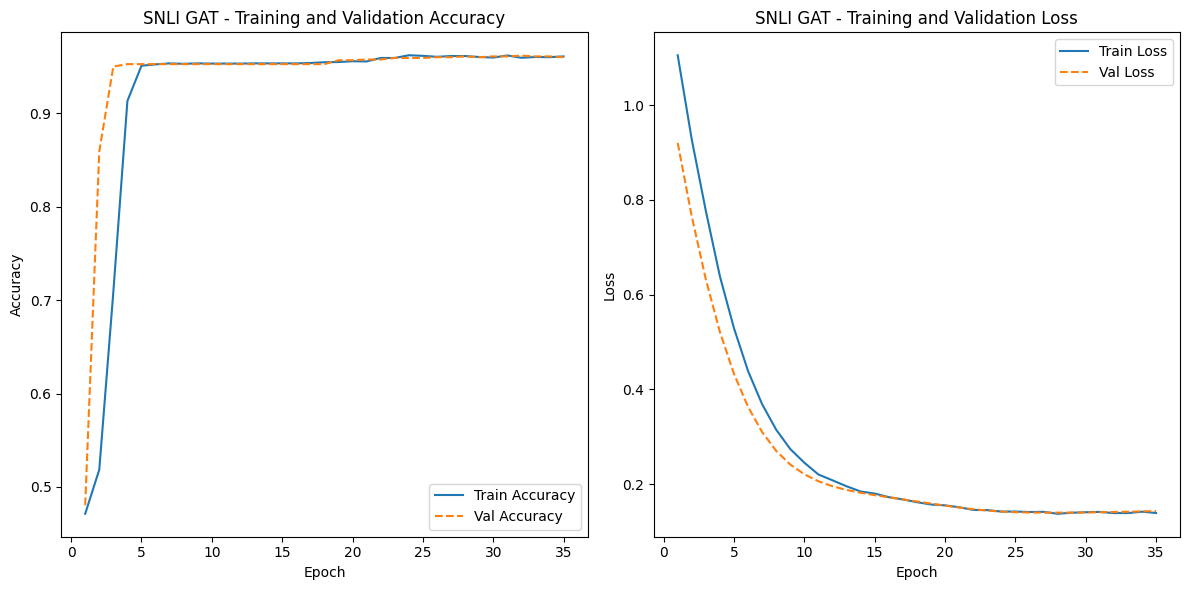

In [82]:
import torch
from torch_geometric.data import Data


# Usage with the DataFrame inputs
train_graph_snli = create_graph(X_train_graph_snli, y_train_snli)
test_graph_snli = create_graph(X_val_graph_snli, y_val_snli)

# Call the function to train and evaluate for SNLI
model_snli, val_loss_snli, val_accuracy_snli = train_and_evaluate_gat(
    train_graph_snli, test_graph_snli, 'SNLI GAT'
)


Epoch 1/100, Train Loss: 1.1101, Val Loss: 0.9221, Val Accuracy: 0.9326
Epoch 2/100, Train Loss: 0.9346, Val Loss: 0.7713, Val Accuracy: 0.9650
Epoch 3/100, Train Loss: 0.7842, Val Loss: 0.6432, Val Accuracy: 0.9650
Epoch 4/100, Train Loss: 0.6563, Val Loss: 0.5363, Val Accuracy: 0.9650
Epoch 5/100, Train Loss: 0.5476, Val Loss: 0.4491, Val Accuracy: 0.9650
Epoch 6/100, Train Loss: 0.4615, Val Loss: 0.3786, Val Accuracy: 0.9650
Epoch 7/100, Train Loss: 0.3904, Val Loss: 0.3228, Val Accuracy: 0.9650
Epoch 8/100, Train Loss: 0.3347, Val Loss: 0.2799, Val Accuracy: 0.9650
Epoch 9/100, Train Loss: 0.2921, Val Loss: 0.2474, Val Accuracy: 0.9650
Epoch 10/100, Train Loss: 0.2587, Val Loss: 0.2232, Val Accuracy: 0.9650
Epoch 11/100, Train Loss: 0.2366, Val Loss: 0.2054, Val Accuracy: 0.9650
Epoch 12/100, Train Loss: 0.2145, Val Loss: 0.1923, Val Accuracy: 0.9650
Epoch 13/100, Train Loss: 0.2031, Val Loss: 0.1828, Val Accuracy: 0.9650
Epoch 14/100, Train Loss: 0.1929, Val Loss: 0.1760, Val Accu

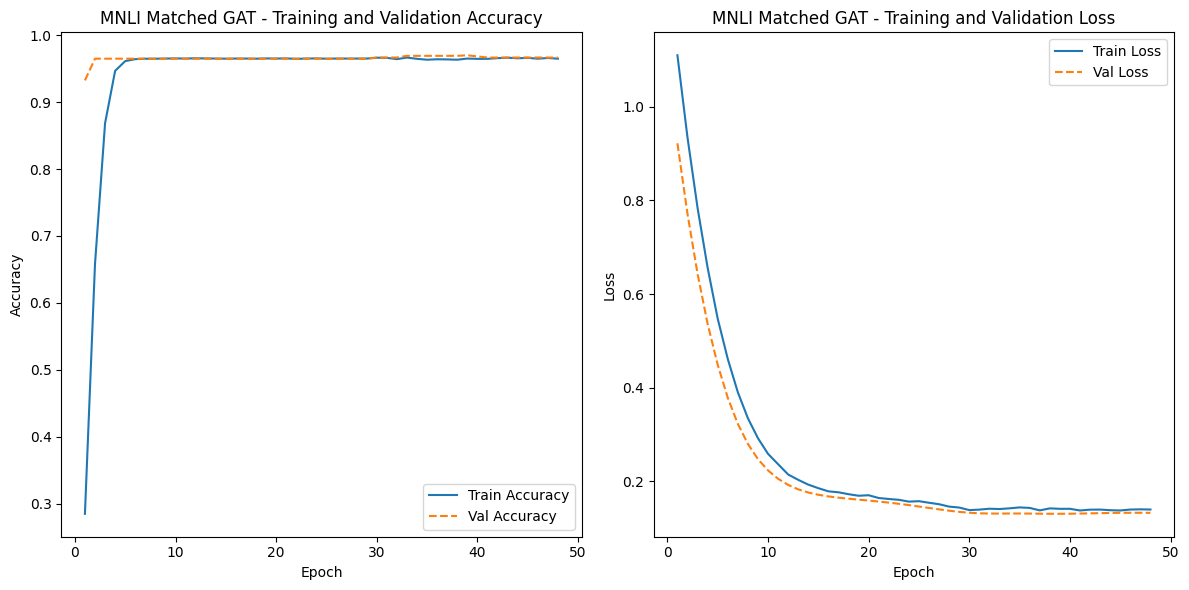

In [83]:
# MNLI Matched
train_graph_mnli_matched = create_graph(X_train_graph_mnli_matched, y_train_mnli_matched)
test_graph_mnli_matched = create_graph(X_val_graph_mnli_matched, y_val_mnli_matched)

model_mnli_matched, val_loss_mnli_matched, val_accuracy_mnli_matched = train_and_evaluate_gat(
    train_graph_mnli_matched, test_graph_mnli_matched, 'MNLI Matched GAT'
)

Epoch 1/100, Train Loss: 1.1590, Val Loss: 0.9854, Val Accuracy: 0.4822
Epoch 2/100, Train Loss: 0.9897, Val Loss: 0.8422, Val Accuracy: 0.9628
Epoch 3/100, Train Loss: 0.8473, Val Loss: 0.7205, Val Accuracy: 0.9645
Epoch 4/100, Train Loss: 0.7250, Val Loss: 0.6164, Val Accuracy: 0.9645
Epoch 5/100, Train Loss: 0.6239, Val Loss: 0.5273, Val Accuracy: 0.9645
Epoch 6/100, Train Loss: 0.5324, Val Loss: 0.4520, Val Accuracy: 0.9645
Epoch 7/100, Train Loss: 0.4560, Val Loss: 0.3892, Val Accuracy: 0.9645
Epoch 8/100, Train Loss: 0.3936, Val Loss: 0.3375, Val Accuracy: 0.9645
Epoch 9/100, Train Loss: 0.3434, Val Loss: 0.2955, Val Accuracy: 0.9645
Epoch 10/100, Train Loss: 0.2992, Val Loss: 0.2617, Val Accuracy: 0.9645
Epoch 11/100, Train Loss: 0.2645, Val Loss: 0.2349, Val Accuracy: 0.9645
Epoch 12/100, Train Loss: 0.2369, Val Loss: 0.2143, Val Accuracy: 0.9653
Epoch 13/100, Train Loss: 0.2162, Val Loss: 0.1990, Val Accuracy: 0.9662
Epoch 14/100, Train Loss: 0.1992, Val Loss: 0.1876, Val Accu

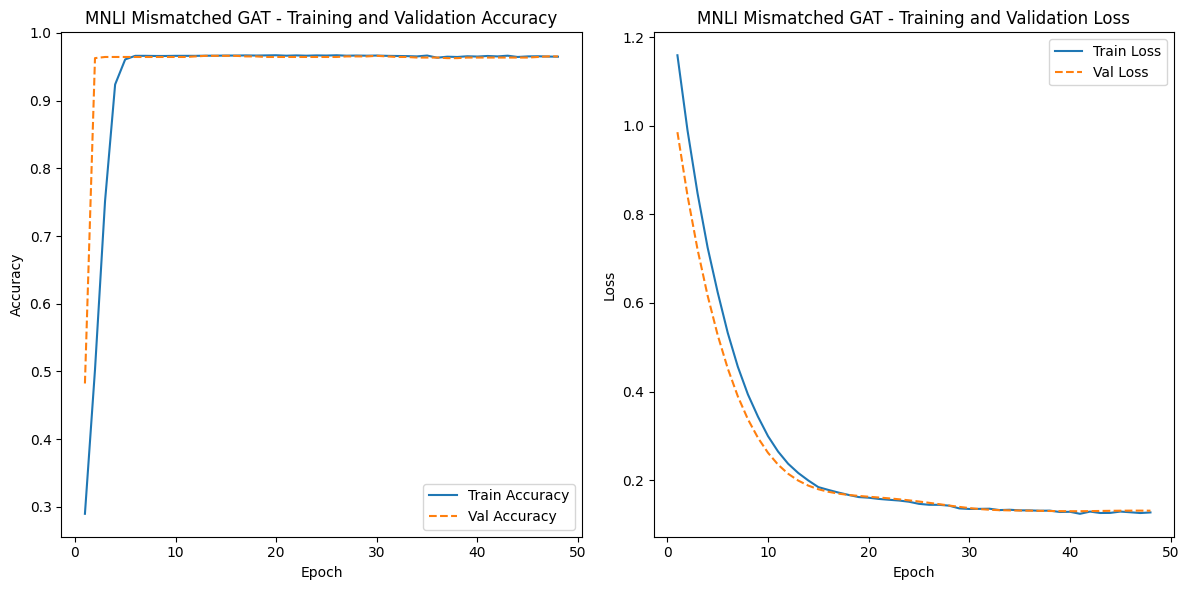

In [84]:
# MNLI Mismatched
train_graph_mnli_mismatched = create_graph(X_train_graph_mnli_mismatched, y_train_mnli_mismatched)
test_graph_mnli_mismatched = create_graph(X_val_graph_mnli_mismatched, y_val_mnli_mismatched)

model_mnli_mismatched, val_loss_mnli_mismatched, val_accuracy_mnli_mismatched = train_and_evaluate_gat(
    train_graph_mnli_mismatched, test_graph_mnli_mismatched, 'MNLI Mismatched GAT'
)


Epoch 1/100, Train Loss: 1.0611, Val Loss: 0.9660, Val Accuracy: 0.6395
Epoch 2/100, Train Loss: 0.9747, Val Loss: 0.8942, Val Accuracy: 0.6628
Epoch 3/100, Train Loss: 0.8924, Val Loss: 0.8348, Val Accuracy: 0.7093
Epoch 4/100, Train Loss: 0.8257, Val Loss: 0.7858, Val Accuracy: 0.6860
Epoch 5/100, Train Loss: 0.7698, Val Loss: 0.7455, Val Accuracy: 0.6744
Epoch 6/100, Train Loss: 0.7243, Val Loss: 0.7127, Val Accuracy: 0.6860
Epoch 7/100, Train Loss: 0.6817, Val Loss: 0.6859, Val Accuracy: 0.7209
Epoch 8/100, Train Loss: 0.6527, Val Loss: 0.6645, Val Accuracy: 0.7326
Epoch 9/100, Train Loss: 0.6170, Val Loss: 0.6477, Val Accuracy: 0.7326
Epoch 10/100, Train Loss: 0.6028, Val Loss: 0.6349, Val Accuracy: 0.7442
Epoch 11/100, Train Loss: 0.5721, Val Loss: 0.6252, Val Accuracy: 0.7442
Epoch 12/100, Train Loss: 0.5600, Val Loss: 0.6184, Val Accuracy: 0.7558
Epoch 13/100, Train Loss: 0.5459, Val Loss: 0.6136, Val Accuracy: 0.7674
Epoch 14/100, Train Loss: 0.5139, Val Loss: 0.6103, Val Accu

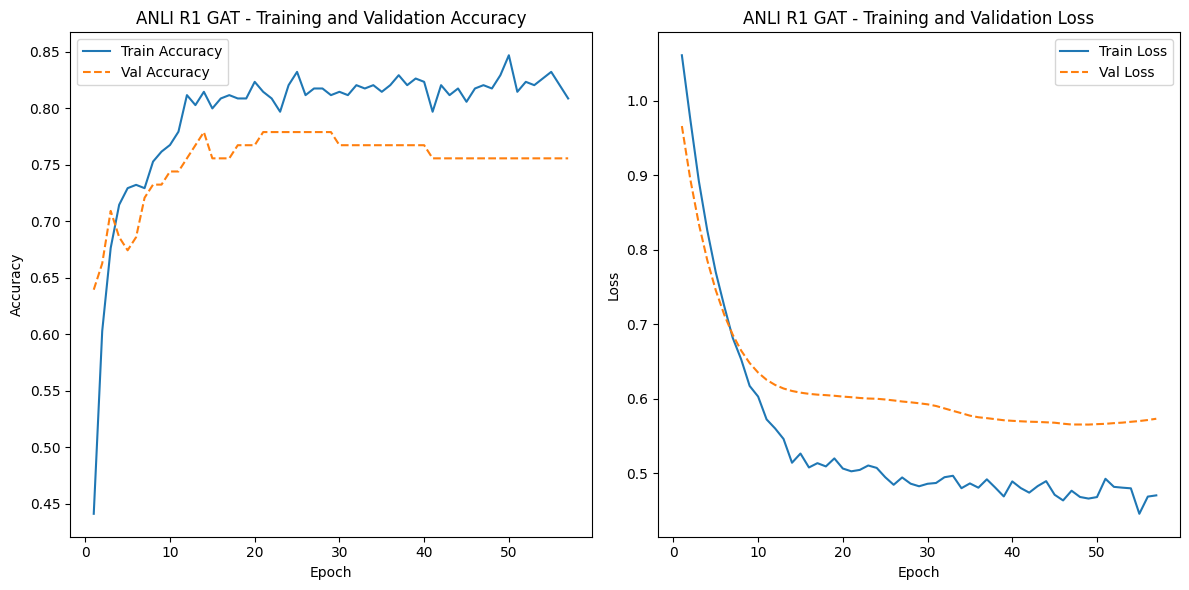

In [85]:
# ANLI Round 1
train_graph_anli_r1 = create_graph(X_train_graph_anli_r1, y_train_anli_r1)
test_graph_anli_r1 = create_graph(X_val_graph_anli_r1, y_val_anli_r1)

model_anli_r1, val_loss_anli_r1, val_accuracy_anli_r1 = train_and_evaluate_gat(
    train_graph_anli_r1, test_graph_anli_r1, 'ANLI R1 GAT'
)

Epoch 1/100, Train Loss: 1.1636, Val Loss: 1.0868, Val Accuracy: 0.4045
Epoch 2/100, Train Loss: 1.0724, Val Loss: 1.0262, Val Accuracy: 0.4494
Epoch 3/100, Train Loss: 0.9986, Val Loss: 0.9742, Val Accuracy: 0.5281
Epoch 4/100, Train Loss: 0.9498, Val Loss: 0.9302, Val Accuracy: 0.5955
Epoch 5/100, Train Loss: 0.9054, Val Loss: 0.8931, Val Accuracy: 0.6180
Epoch 6/100, Train Loss: 0.8608, Val Loss: 0.8617, Val Accuracy: 0.5955
Epoch 7/100, Train Loss: 0.8303, Val Loss: 0.8360, Val Accuracy: 0.6067
Epoch 8/100, Train Loss: 0.7893, Val Loss: 0.8154, Val Accuracy: 0.6180
Epoch 9/100, Train Loss: 0.7629, Val Loss: 0.7988, Val Accuracy: 0.6742
Epoch 10/100, Train Loss: 0.7614, Val Loss: 0.7859, Val Accuracy: 0.6854
Epoch 11/100, Train Loss: 0.7296, Val Loss: 0.7759, Val Accuracy: 0.7191
Epoch 12/100, Train Loss: 0.7145, Val Loss: 0.7681, Val Accuracy: 0.7416
Epoch 13/100, Train Loss: 0.6987, Val Loss: 0.7620, Val Accuracy: 0.7416
Epoch 14/100, Train Loss: 0.6981, Val Loss: 0.7573, Val Accu

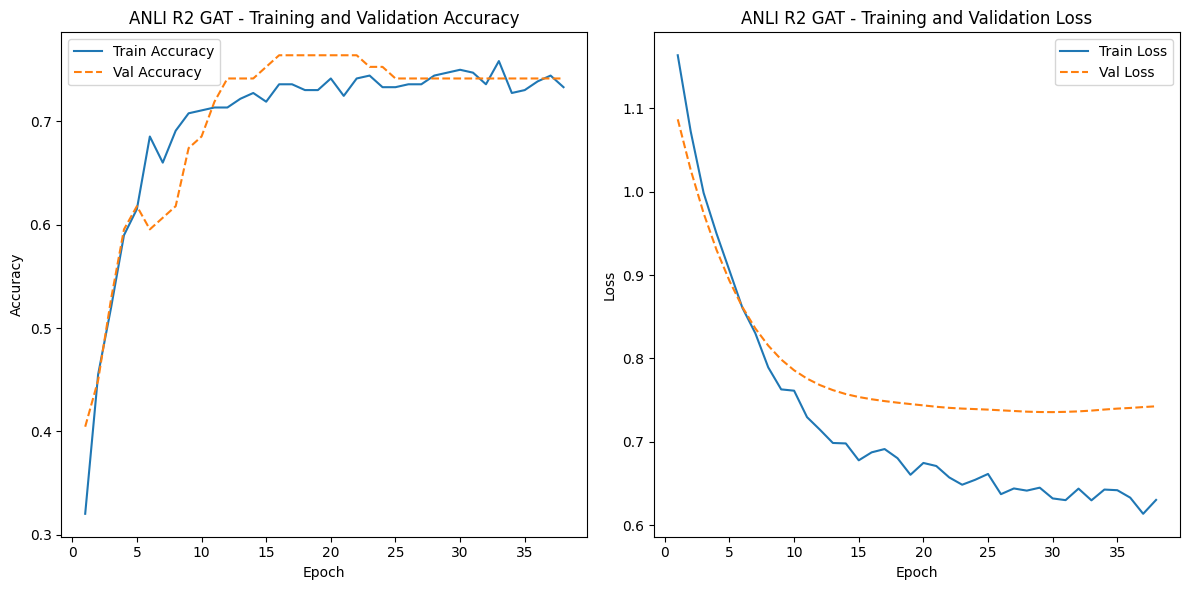

In [86]:
# ANLI Round 2
train_graph_anli_r2 = create_graph(X_train_graph_anli_r2, y_train_anli_r2)
test_graph_anli_r2 = create_graph(X_val_graph_anli_r2, y_val_anli_r2)

model_anli_r2, val_loss_anli_r2, val_accuracy_anli_r2 = train_and_evaluate_gat(
    train_graph_anli_r2, test_graph_anli_r2, 'ANLI R2 GAT'
)

Epoch 1/100, Train Loss: 1.0956, Val Loss: 1.0254, Val Accuracy: 0.5472
Epoch 2/100, Train Loss: 1.0162, Val Loss: 0.9581, Val Accuracy: 0.5849
Epoch 3/100, Train Loss: 0.9459, Val Loss: 0.9040, Val Accuracy: 0.5943
Epoch 4/100, Train Loss: 0.8981, Val Loss: 0.8605, Val Accuracy: 0.6321
Epoch 5/100, Train Loss: 0.8387, Val Loss: 0.8265, Val Accuracy: 0.6321
Epoch 6/100, Train Loss: 0.8035, Val Loss: 0.7999, Val Accuracy: 0.6509
Epoch 7/100, Train Loss: 0.7594, Val Loss: 0.7790, Val Accuracy: 0.6792
Epoch 8/100, Train Loss: 0.7278, Val Loss: 0.7633, Val Accuracy: 0.6604
Epoch 9/100, Train Loss: 0.7206, Val Loss: 0.7526, Val Accuracy: 0.6509
Epoch 10/100, Train Loss: 0.7041, Val Loss: 0.7457, Val Accuracy: 0.6509
Epoch 11/100, Train Loss: 0.6918, Val Loss: 0.7418, Val Accuracy: 0.6792
Epoch 12/100, Train Loss: 0.6880, Val Loss: 0.7400, Val Accuracy: 0.6792
Epoch 13/100, Train Loss: 0.6809, Val Loss: 0.7397, Val Accuracy: 0.6792
Epoch 14/100, Train Loss: 0.6751, Val Loss: 0.7396, Val Accu

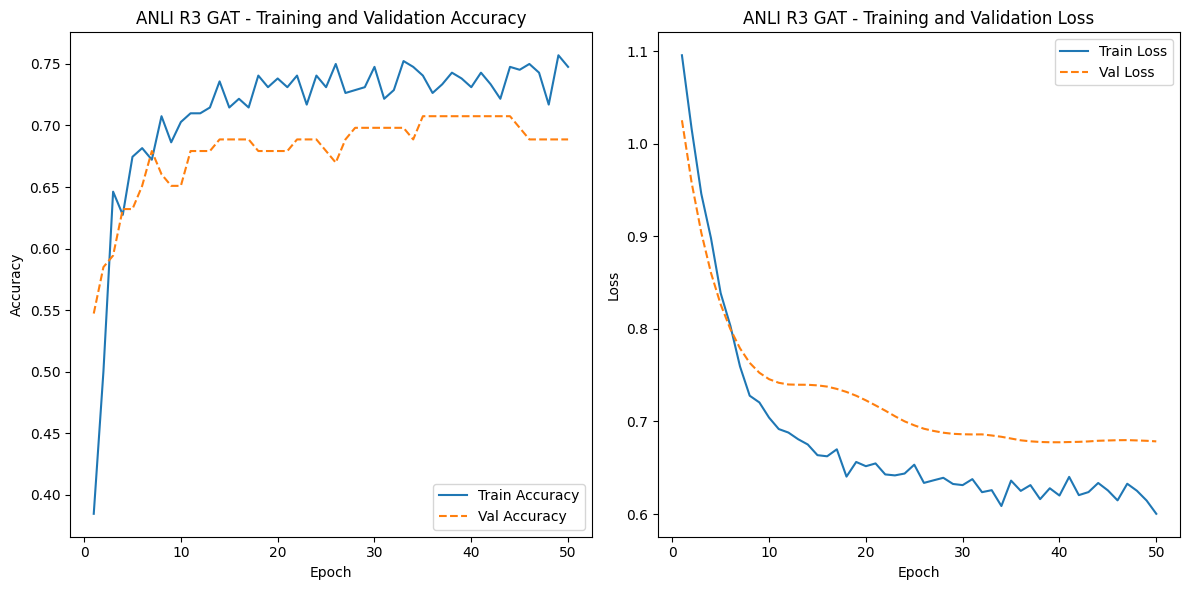

In [87]:
# ANLI Round 3
train_graph_anli_r3 = create_graph(X_train_graph_anli_r3, y_train_anli_r3)
test_graph_anli_r3 = create_graph(X_val_graph_anli_r3, y_val_anli_r3)

model_anli_r3, val_loss_anli_r3, val_accuracy_anli_r3 = train_and_evaluate_gat(
    train_graph_anli_r3, test_graph_anli_r3, 'ANLI R3 GAT'
)

In [88]:
import pandas as pd

# Combine feature data
combined_X_train = pd.concat([
    X_train_graph_snli,
    X_train_graph_mnli_matched,
    X_train_graph_mnli_mismatched,
    X_train_graph_anli_r1,
    X_train_graph_anli_r2,
    X_train_graph_anli_r3
], ignore_index=True)

combined_X_val = pd.concat([
    X_val_graph_snli,
    X_val_graph_mnli_matched,
    X_val_graph_mnli_mismatched,
    X_val_graph_anli_r1,
    X_val_graph_anli_r2,
    X_val_graph_anli_r3
], ignore_index=True)

# Combine labels
combined_y_train = np.concatenate([
    y_train_snli,
    y_train_mnli_matched,
    y_train_mnli_mismatched,
    y_train_anli_r1,
    y_train_anli_r2,
    y_train_anli_r3
])

combined_y_val = np.concatenate([
    y_val_snli,
    y_val_mnli_matched,
    y_val_mnli_mismatched,
    y_val_anli_r1,
    y_val_anli_r2,
    y_val_anli_r3
])


Epoch 1/100, Train Loss: 1.1811, Val Loss: 1.0079, Val Accuracy: 0.4969
Epoch 2/100, Train Loss: 1.0140, Val Loss: 0.8662, Val Accuracy: 0.9417
Epoch 3/100, Train Loss: 0.8737, Val Loss: 0.7467, Val Accuracy: 0.9414
Epoch 4/100, Train Loss: 0.7542, Val Loss: 0.6439, Val Accuracy: 0.9383
Epoch 5/100, Train Loss: 0.6512, Val Loss: 0.5558, Val Accuracy: 0.9383
Epoch 6/100, Train Loss: 0.5615, Val Loss: 0.4810, Val Accuracy: 0.9383
Epoch 7/100, Train Loss: 0.4882, Val Loss: 0.4184, Val Accuracy: 0.9383
Epoch 8/100, Train Loss: 0.4239, Val Loss: 0.3679, Val Accuracy: 0.9383
Epoch 9/100, Train Loss: 0.3736, Val Loss: 0.3280, Val Accuracy: 0.9383
Epoch 10/100, Train Loss: 0.3331, Val Loss: 0.2972, Val Accuracy: 0.9383
Epoch 11/100, Train Loss: 0.3007, Val Loss: 0.2740, Val Accuracy: 0.9383
Epoch 12/100, Train Loss: 0.2772, Val Loss: 0.2572, Val Accuracy: 0.9383
Epoch 13/100, Train Loss: 0.2583, Val Loss: 0.2453, Val Accuracy: 0.9383
Epoch 14/100, Train Loss: 0.2447, Val Loss: 0.2370, Val Accu

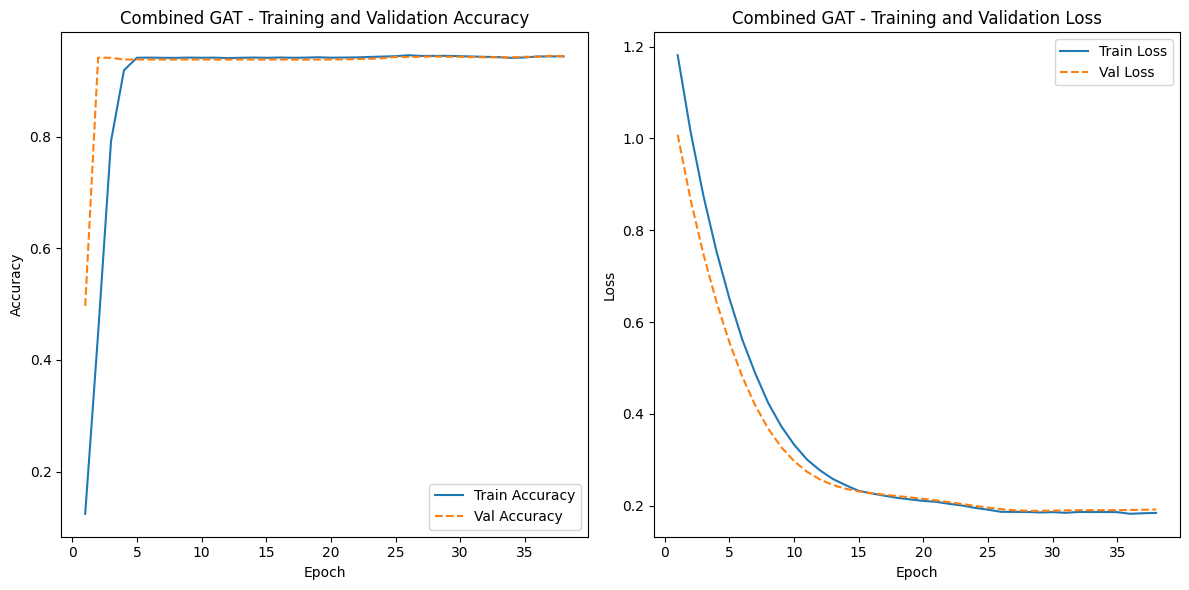

Final Validation Loss on Combined Tasks: 0.1919
Final Validation Accuracy on Combined Tasks: 0.9443


In [89]:
# Assuming create_graph is already defined to take features and labels to form a graph
combined_train_graph = create_graph(combined_X_train, combined_y_train)
combined_val_graph = create_graph(combined_X_val, combined_y_val)
model_combined, val_loss_combined, val_accuracy_combined = train_and_evaluate_gat(
    combined_train_graph, combined_val_graph, 'Combined GAT'
)

print(f"Final Validation Loss on Combined Tasks: {val_loss_combined:.4f}")
print(f"Final Validation Accuracy on Combined Tasks: {val_accuracy_combined:.4f}")


In [90]:
import pandas as pd

# Function to get model probabilities
def get_probabilities(model, graph_data):
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():
        outputs = model(graph_data)  # Forward pass
        probabilities = F.softmax(outputs, dim=1)  # Apply softmax to get probabilities
    return probabilities.numpy()  # Convert to numpy array for DataFrame creation

# Get probabilities for SNLI
probabilities_snli = get_probabilities(model_snli, test_graph_snli)

# Create DataFrame for SNLI probabilities
GAT_probabilities_snli = pd.DataFrame(probabilities_snli, columns=['GAT_Entailment', 'GAT_Neutral', 'GAT_Contradiction'])
GAT_probabilities_snli['True Labels'] = y_val_snli  # Assuming y_val_snli is the array of true labels


In [91]:
GAT_probabilities_snli

,GAT_Entailment,GAT_Neutral,GAT_Contradiction,True Labels
0,0.001178,0.004914,0.993908,2
1,0.001251,0.005348,0.993401,2
2,0.001184,0.004963,0.993853,2
3,0.001386,0.006214,0.992401,2
4,0.001226,0.005230,0.993545,2
...,...,...,...,...
1202,0.988196,0.010685,0.001120,0
1203,0.002081,0.009614,0.988305,2
1204,0.987914,0.010952,0.001133,0
1205,0.001240,0.005364,0.993396,2


In [92]:
# Get probabilities for MNLI Matched
probabilities_mnli_matched = get_probabilities(model_mnli_matched, test_graph_mnli_matched)
GAT_probabilities_mnli_matched = pd.DataFrame(probabilities_mnli_matched, columns=['GAT_Entailment', 'GAT_Neutral', 'GAT_Contradiction'])
GAT_probabilities_mnli_matched['True Labels'] = y_val_mnli_matched

In [93]:

# Get probabilities for MNLI Mismatched
probabilities_mnli_mismatched = get_probabilities(model_mnli_mismatched, test_graph_mnli_mismatched)
GAT_probabilities_mnli_mismatched = pd.DataFrame(probabilities_mnli_mismatched, columns=['GAT_Entailment', 'GAT_Neutral', 'GAT_Contradiction'])
GAT_probabilities_mnli_mismatched['True Labels'] = y_val_mnli_mismatched


In [94]:
# Get probabilities for ANLI Round 1
probabilities_anli_r1 = get_probabilities(model_anli_r1, test_graph_anli_r1)
GAT_probabilities_anli_r1 = pd.DataFrame(probabilities_anli_r1, columns=['GAT_Entailment', 'GAT_Neutral', 'GAT_Contradiction'])
GAT_probabilities_anli_r1['True Labels'] = y_val_anli_r1

In [95]:
# Get probabilities for ANLI Round 2
probabilities_anli_r2 = get_probabilities(model_anli_r2, test_graph_anli_r2)
GAT_probabilities_anli_r2 = pd.DataFrame(probabilities_anli_r2, columns=['GAT_Entailment', 'GAT_Neutral', 'GAT_Contradiction'])
GAT_probabilities_anli_r2['True Labels'] = y_val_anli_r2

In [96]:
# Get probabilities for ANLI Round 3
probabilities_anli_r3 = get_probabilities(model_anli_r3, test_graph_anli_r3)
GAT_probabilities_anli_r3 = pd.DataFrame(probabilities_anli_r3, columns=['GAT_Entailment', 'GAT_Neutral', 'GAT_Contradiction'])
GAT_probabilities_anli_r3['True Labels'] = y_val_anli_r3

In [97]:
# Get probabilities for the combined tasks
probabilities_combined = get_probabilities(model_combined, combined_val_graph)

# Create DataFrame for combined probabilities
GAT_probabilities_combined = pd.DataFrame(probabilities_combined, columns=['GAT_Entailment', 'GAT_Neutral', 'GAT_Contradiction'])
GAT_probabilities_combined['True Labels'] = combined_y_val  # Assuming combined_y_val is the array of true labels for the combined validation set

In [98]:
GAT_probabilities_combined

,GAT_Entailment,GAT_Neutral,GAT_Contradiction,True Labels
0,0.001147,0.008487,0.990366,2
1,0.001239,0.009186,0.989574,2
2,0.001155,0.008569,0.990275,2
3,0.001422,0.010644,0.987934,2
4,0.001204,0.008960,0.989836,2
...,...,...,...,...
3837,0.006786,0.059346,0.933868,2
3838,0.001571,0.010827,0.987602,2
3839,0.001309,0.009854,0.988837,1
3840,0.004108,0.049824,0.946068,2


In [99]:
# Saving the GAT probabilities DataFrames to CSV files
GAT_probabilities_snli.to_csv("GAT_probabilities_SNLI.csv", index=False)
GAT_probabilities_mnli_matched.to_csv("GAT_probabilities_MNLI_matched.csv", index=False)
GAT_probabilities_mnli_mismatched.to_csv("GAT_probabilities_MNLI_mismatched.csv", index=False)
GAT_probabilities_anli_r1.to_csv("GAT_probabilities_ANLI_R1.csv", index=False)
GAT_probabilities_anli_r2.to_csv("GAT_probabilities_ANLI_R2.csv", index=False)
GAT_probabilities_anli_r3.to_csv("GAT_probabilities_ANLI_R3.csv", index=False)
GAT_probabilities_combined.to_csv("GAT_probabilities_All.csv", index=False)


# GETTING PREDICTION FROM CAPSULENET FEATURED

In [100]:
# Renaming for CapsuleNet (or another model) consistency
X_train_capsulenet_snli = X_train_graph_snli
X_val_capsulenet_snli = X_val_graph_snli

X_train_capsulenet_mnli_matched = X_train_graph_mnli_matched
X_val_capsulenet_mnli_matched = X_val_graph_mnli_matched

X_train_capsulenet_mnli_mismatched = X_train_graph_mnli_mismatched
X_val_capsulenet_mnli_mismatched = X_val_graph_mnli_mismatched

X_train_capsulenet_anli_r1 = X_train_graph_anli_r1
X_val_capsulenet_anli_r1 = X_val_graph_anli_r1

X_train_capsulenet_anli_r2 = X_train_graph_anli_r2
X_val_capsulenet_anli_r2 = X_val_graph_anli_r2

X_train_capsulenet_anli_r3 = X_train_graph_anli_r3
X_val_capsulenet_anli_r3 = X_val_graph_anli_r3


In [101]:
X_train_capsulenet_snli

,Deberta_Entailment,Deberta_Neutral,Deberta_Contradiction,Roberta_Entailment,Roberta_Neutral,Roberta_Contradiction,Albert_Entailment,Albert_Neutral,Albert_Contradiction,confidence_margin_entailment,confidence_margin_neutral,confidence_margin_contradiction
0,0.995846,0.003834,0.000320,0.000437,0.068225,0.931338,0.002489,0.086675,0.910836,0.993357,0.018450,0.020502
1,0.998954,0.000582,0.000465,0.000982,0.006386,0.992632,0.034368,0.100376,0.865256,0.964585,0.093990,0.127376
2,0.000406,0.005111,0.994483,0.979361,0.017994,0.002644,0.982767,0.016221,0.001012,0.003406,0.001774,0.991838
3,0.000665,0.025356,0.973979,0.768910,0.228519,0.002571,0.169300,0.818175,0.012525,0.599610,0.589656,0.961454
4,0.000471,0.010126,0.989403,0.904818,0.092449,0.002734,0.949599,0.049547,0.000854,0.044781,0.042902,0.986669
...,...,...,...,...,...,...,...,...,...,...,...,...
4820,0.001198,0.043975,0.954827,0.892298,0.106245,0.001457,0.920312,0.078407,0.001282,0.028014,0.027838,0.953370
4821,0.000256,0.003371,0.996373,0.976198,0.022649,0.001153,0.978469,0.021039,0.000492,0.002271,0.001610,0.995220
4822,0.998751,0.001050,0.000199,0.000737,0.016078,0.983185,0.023176,0.257182,0.719642,0.975575,0.241104,0.263543
4823,0.978751,0.017841,0.003408,0.000233,0.027631,0.972136,0.002862,0.205389,0.791748,0.975888,0.177758,0.180387


In [102]:
y_train_snli


array([2, 2, 0, ..., 2, 2, 2])

In [103]:
y_val_snli

array([2, 2, 2, ..., 0, 2, 2])

In [104]:
import numpy as np

# Assuming the labels are in the format [0, 1, 2] for the classes
def one_hot_encode(labels):
    # Create an identity matrix of size number of classes and then index it with labels
    num_classes = np.max(labels) + 1  # Adjust depending on whether your classes start at 0 or 1
    return np.eye(num_classes)[labels]

# One-hot encoding labels for all tasks
y_train_snli_one_hot = one_hot_encode(y_train_snli)
y_val_snli_one_hot = one_hot_encode(y_val_snli)

y_train_mnli_matched_one_hot = one_hot_encode(y_train_mnli_matched)
y_val_mnli_matched_one_hot = one_hot_encode(y_val_mnli_matched)

y_train_mnli_mismatched_one_hot = one_hot_encode(y_train_mnli_mismatched)
y_val_mnli_mismatched_one_hot = one_hot_encode(y_val_mnli_mismatched)

y_train_anli_r1_one_hot = one_hot_encode(y_train_anli_r1)
y_val_anli_r1_one_hot = one_hot_encode(y_val_anli_r1)

y_train_anli_r2_one_hot = one_hot_encode(y_train_anli_r2)
y_val_anli_r2_one_hot = one_hot_encode(y_val_anli_r2)

y_train_anli_r3_one_hot = one_hot_encode(y_train_anli_r3)
y_val_anli_r3_one_hot = one_hot_encode(y_val_anli_r3)



In [105]:
y_train_snli_one_hot 

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [106]:
y_train_anli_r1_one_hot

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [107]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder


# Step 1: Feature Scaling
scaler = StandardScaler()

# Fit the scaler to each task's feature data
X_train_snli_scaled = scaler.fit_transform(X_train_capsulenet_snli)
X_val_snli_scaled = scaler.fit_transform(X_val_capsulenet_snli)

# MNLI Matched
X_train_mnli_matched_scaled = scaler.fit_transform(X_train_capsulenet_mnli_matched)
X_val_mnli_matched_scaled = scaler.fit_transform(X_val_capsulenet_mnli_matched)

# MNLI Mismatched
X_train_mnli_mismatched_scaled = scaler.fit_transform(X_train_capsulenet_mnli_mismatched)
X_val_mnli_mismatched_scaled = scaler.fit_transform(X_val_capsulenet_mnli_mismatched)

# ANLI Round 1
X_train_anli_r1_scaled = scaler.fit_transform(X_train_capsulenet_anli_r1)
X_val_anli_r1_scaled = scaler.fit_transform(X_val_capsulenet_anli_r1)

# ANLI Round 2
X_train_anli_r2_scaled = scaler.fit_transform(X_train_capsulenet_anli_r2)
X_val_anli_r2_scaled = scaler.fit_transform(X_val_capsulenet_anli_r2)

# ANLI Round 3
X_train_anli_r3_scaled = scaler.fit_transform(X_train_capsulenet_anli_r3)
X_val_anli_r3_scaled = scaler.fit_transform(X_val_capsulenet_anli_r3)



In [108]:
X_train_snli_scaled.shape

(4825, 12)

In [109]:
X_val_snli_scaled.shape

(1207, 12)

In [110]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Adjusted Capsule Layer
class CapsuleLayer(layers.Layer):
    def __init__(self, num_capsules, dim_capsules, num_routing=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsules = num_capsules
        self.dim_capsules = dim_capsules
        self.num_routing = num_routing
    
    def build(self, input_shape):
        self.kernel = self.add_weight(
            shape=(input_shape[-1], self.num_capsules * self.dim_capsules),
            initializer="glorot_uniform",
            name="capsule_kernel",
        )
    
    def call(self, inputs):
        outputs = tf.matmul(inputs, self.kernel)
        outputs = tf.reshape(outputs, (-1, self.num_capsules, self.dim_capsules))
        
        b = tf.zeros(shape=(tf.shape(inputs)[0], self.num_capsules, 1))
        for _ in range(self.num_routing):
            c = tf.nn.softmax(b, axis=1)
            outputs = c * outputs
            outputs = self.squash(outputs)
            b += tf.reduce_sum(outputs * outputs, axis=-1, keepdims=True)
        
        return outputs
    
    @staticmethod
    def squash(vector):
        squared_norm = tf.reduce_sum(tf.square(vector), axis=-1, keepdims=True)
        scale = squared_norm / (1 + squared_norm) / tf.sqrt(squared_norm)
        return scale * vector


In [111]:
# Ensure Data is in Correct Format
def ensure_dense(data):
    if hasattr(data, 'toarray'):
        return data.toarray()
    return data

# Apply Data Conversion and Reshaping for Other Tasks
X_snli_train_capsulenet = ensure_dense(X_train_snli_scaled)
X_snli_val_capsulenet = ensure_dense(X_val_snli_scaled)
y_snli_train_capsulenet = ensure_dense(y_train_snli_one_hot)
y_snli_val_capsulenet = ensure_dense(y_val_snli_one_hot)

# MNLI Matched
X_mnli_matched_train_capsulenet = ensure_dense(X_train_mnli_matched_scaled)
X_mnli_matched_val_capsulenet = ensure_dense(X_val_mnli_matched_scaled)
y_mnli_matched_train_capsulenet = ensure_dense(y_train_mnli_matched_one_hot)
y_mnli_matched_val_capsulenet = ensure_dense(y_val_mnli_matched_one_hot)

# MNLI Mismatched
X_mnli_mismatched_train_capsulenet = ensure_dense(X_train_mnli_mismatched_scaled)
X_mnli_mismatched_val_capsulenet = ensure_dense(X_val_mnli_mismatched_scaled)
y_mnli_mismatched_train_capsulenet = ensure_dense(y_train_mnli_mismatched_one_hot)
y_mnli_mismatched_val_capsulenet = ensure_dense(y_val_mnli_mismatched_one_hot)

# ANLI Round 1
X_anli_r1_train_capsulenet = ensure_dense(X_train_anli_r1_scaled)
X_anli_r1_val_capsulenet = ensure_dense(X_val_anli_r1_scaled)
y_anli_r1_train_capsulenet = ensure_dense(y_train_anli_r1_one_hot)
y_anli_r1_val_capsulenet = ensure_dense(y_val_anli_r1_one_hot)

# ANLI Round 2
X_anli_r2_train_capsulenet = ensure_dense(X_train_anli_r2_scaled)
X_anli_r2_val_capsulenet = ensure_dense(X_val_anli_r2_scaled)
y_anli_r2_train_capsulenet = ensure_dense(y_train_anli_r2_one_hot)
y_anli_r2_val_capsulenet = ensure_dense(y_val_anli_r2_one_hot)

# ANLI Round 3
X_anli_r3_train_capsulenet = ensure_dense(X_train_anli_r3_scaled)
X_anli_r3_val_capsulenet = ensure_dense(X_val_anli_r3_scaled)
y_anli_r3_train_capsulenet = ensure_dense(y_train_anli_r3_one_hot)
y_anli_r3_val_capsulenet = ensure_dense(y_val_anli_r3_one_hot)


In [112]:
X_anli_r3_train_capsulenet.shape

(424, 12)

In [113]:
X_snli_train_capsulenet.shape

(4825, 12)

In [114]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


# Function to create a simple dense model with regularization
def create_simple_dense_model(input_shape, num_classes):
    inputs = keras.Input(shape=(input_shape,))
    dense_layer = layers.Dense(64, activation='relu')(inputs)  # Simplified model
    dropout_layer = layers.Dropout(0.2)(dense_layer)  # Reduced dropout
    dense_layer_2 = layers.Dense(32, activation='relu')(dropout_layer)
    outputs = layers.Dense(num_classes, activation='softmax')(dense_layer_2)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Function to train and evaluate the model, returning history, test loss/accuracy, and the trained model
def train_and_evaluate(X_train, y_train, X_test, y_test, epochs=20, batch_size=32):
    model = create_simple_dense_model(
        input_shape=X_train.shape[1],  # Input feature count
        num_classes=y_train.shape[1],  # Number of output classes
    )
    
    optimizer = keras.optimizers.Adam(learning_rate=0.0005)  # Set learning rate
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Callbacks for early stopping and learning rate adjustment
    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
    ]
    
    # Fit the model with validation data and callbacks
    history = model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=callbacks
    )
    
    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    
    # Return history, test loss, test accuracy, and the model
    return history, test_loss, test_accuracy, model

In [115]:
import matplotlib.pyplot as plt

# Function to plot training/validation accuracy and loss from history
def plot_training_history_capsulenet(history, title_prefix="Model"):
    # Create subplots for accuracy and loss
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Accuracy plot (training and validation)
    axes[0].plot(history.history['accuracy'], label='Training Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
    axes[0].set_title(f'{title_prefix} - Training and Validation Accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True)

    # Loss plot (training and validation)
    axes[1].plot(history.history['loss'], label='Training Loss')
    axes[1].plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
    axes[1].set_title(f'{title_prefix} - Training and Validation Loss')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


In [116]:
# Call the function for a specific task (example: snli)
history_snli, test_loss_snli, test_accuracy_snli, trained_model_snli = train_and_evaluate(
    X_snli_train_capsulenet, y_snli_train_capsulenet, X_snli_val_capsulenet, y_snli_val_capsulenet, epochs=20, batch_size=32
)

print("Test loss on SNLI:", test_loss_snli)
print("Test accuracy on SNLI:", test_accuracy_snli)


Epoch 1/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7098 - loss: 0.7061 - val_accuracy: 0.9528 - val_loss: 0.1621 - learning_rate: 5.0000e-04
Epoch 2/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9575 - loss: 0.1623 - val_accuracy: 0.9569 - val_loss: 0.1439 - learning_rate: 5.0000e-04
Epoch 3/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9657 - loss: 0.1263 - val_accuracy: 0.9586 - val_loss: 0.1403 - learning_rate: 5.0000e-04
Epoch 4/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9599 - loss: 0.1401 - val_accuracy: 0.9594 - val_loss: 0.1392 - learning_rate: 5.0000e-04
Epoch 5/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9546 - loss: 0.1476 - val_accuracy: 0.9602 - val_loss: 0.1401 - learning_rate: 5.0000e-04
Epoch 6/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9591 - loss: 0.1392 - val_accuracy: 0.9594 - val_loss: 0.1369 - learning_rate: 5.0000e-04
Epoch 7/20
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

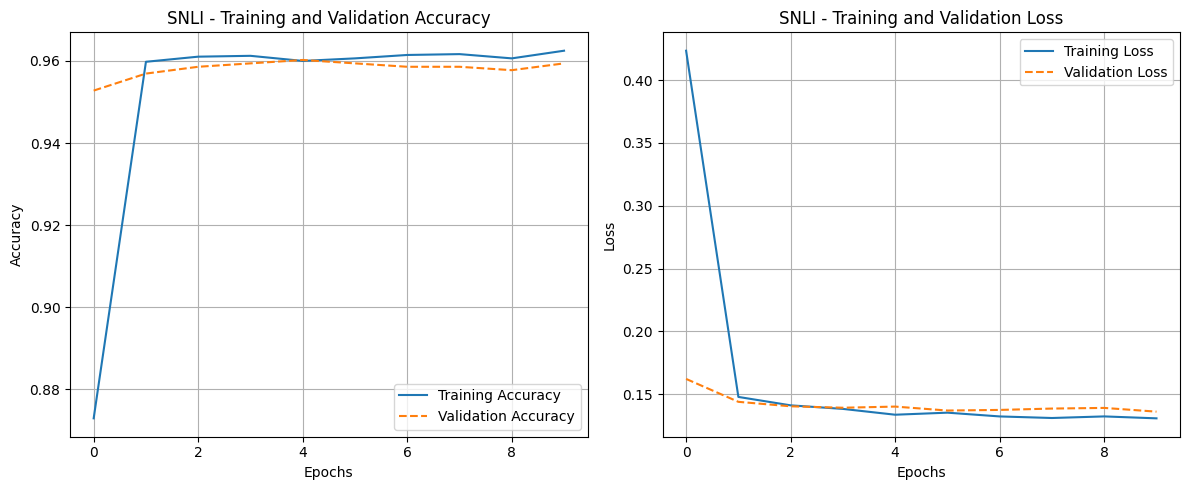

In [117]:
# MNLI Matched
plot_training_history_capsulenet(history_snli, title_prefix="SNLI")

In [118]:
# MNLI Matched
history_mnli_matched, test_loss_mnli_matched, test_accuracy_mnli_matched, trained_model_mnli_matched = train_and_evaluate(
    X_mnli_matched_train_capsulenet, y_mnli_matched_train_capsulenet, X_mnli_matched_val_capsulenet, y_mnli_matched_val_capsulenet, epochs=20, batch_size=32
)
print("Test loss on MNLI Matched:", test_loss_mnli_matched)
print("Test accuracy on MNLI Matched:", test_accuracy_mnli_matched)

Epoch 1/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9158 - loss: 0.4933 - val_accuracy: 0.9642 - val_loss: 0.1405 - learning_rate: 5.0000e-04
Epoch 2/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9600 - loss: 0.1587 - val_accuracy: 0.9659 - val_loss: 0.1315 - learning_rate: 5.0000e-04
Epoch 3/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9611 - loss: 0.1478 - val_accuracy: 0.9659 - val_loss: 0.1290 - learning_rate: 5.0000e-04
Epoch 4/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9648 - loss: 0.1363 - val_accuracy: 0.9676 - val_loss: 0.1272 - learning_rate: 5.0000e-04
Epoch 5/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9638 - loss: 0.1314 - val_accuracy: 0.9676 - val_loss: 0.1266 - learning_rate: 5.0000e-04
Epoch 6/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9658 - loss: 0.1284 - val_accuracy: 0.9667 - val_loss: 0.1278 - learning_rate: 5.0000e-04
Epoch 7/20
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

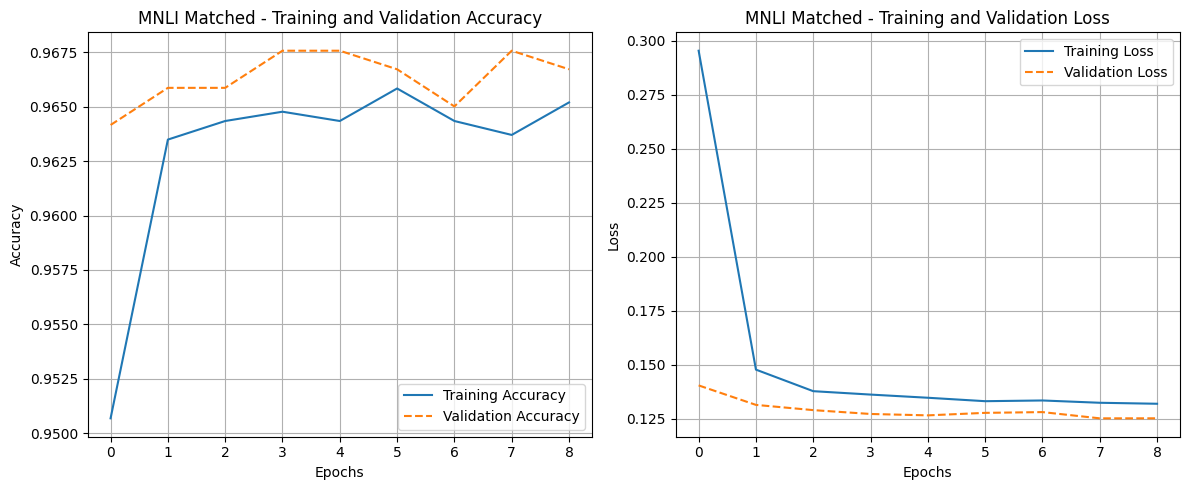

In [119]:
# MNLI Matched
plot_training_history_capsulenet(history_mnli_matched, title_prefix="MNLI Matched")

In [120]:
# MNLI Mismatched
history_mnli_mismatched, test_loss_mnli_mismatched, test_accuracy_mnli_mismatched, trained_model_mnli_mismatched = train_and_evaluate(
    X_mnli_mismatched_train_capsulenet, y_mnli_mismatched_train_capsulenet, X_mnli_mismatched_val_capsulenet, y_mnli_mismatched_val_capsulenet, epochs=20, batch_size=32
)
print("Test loss on MNLI Mismatched:", test_loss_mnli_mismatched)
print("Test accuracy on MNLI Mismatched:", test_accuracy_mnli_mismatched)

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7140 - loss: 0.7474 - val_accuracy: 0.9628 - val_loss: 0.1607 - learning_rate: 5.0000e-04
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9622 - loss: 0.1526 - val_accuracy: 0.9611 - val_loss: 0.1296 - learning_rate: 5.0000e-04
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9667 - loss: 0.1212 - val_accuracy: 0.9636 - val_loss: 0.1256 - learning_rate: 5.0000e-04
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9639 - loss: 0.1219 - val_accuracy: 0.9645 - val_loss: 0.1243 - learning_rate: 5.0000e-04
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9698 - loss: 0.1100 - val_accuracy: 0.9645 - val_loss: 0.1238 - learning_rate: 5.0000e-04
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9622 - loss: 0.1325 - val_accuracy: 0.9662 - val_loss: 0.1235 - learning_rate: 5.0000e-04
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

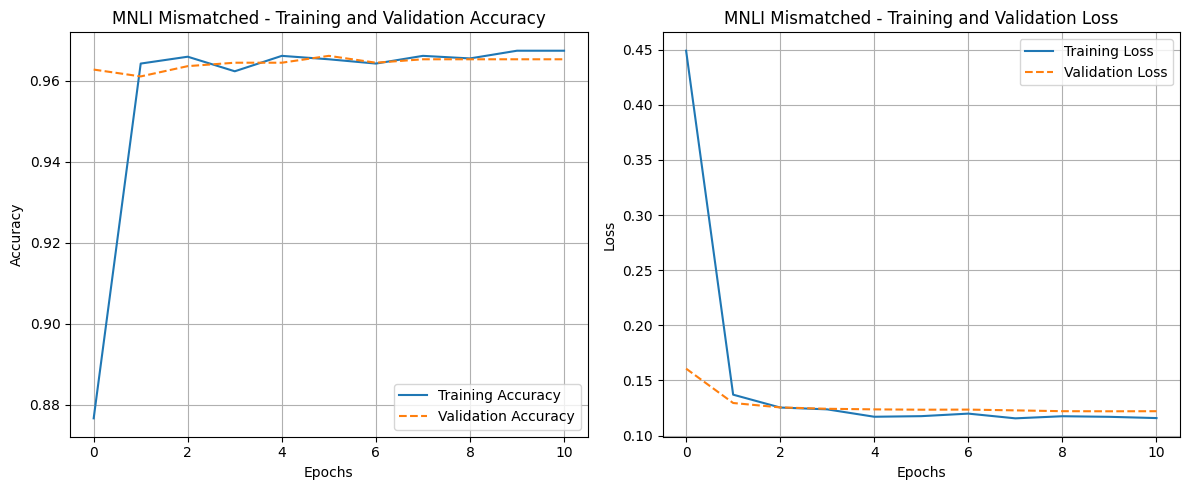

In [121]:
# MNLI Mismatched
plot_training_history_capsulenet(history_mnli_mismatched, title_prefix="MNLI Mismatched")


In [122]:
# ANLI Round 1
history_anli_r1, test_loss_anli_r1, test_accuracy_anli_r1, trained_model_anli_r1 = train_and_evaluate(
    X_anli_r1_train_capsulenet, y_anli_r1_train_capsulenet, X_anli_r1_val_capsulenet, y_anli_r1_val_capsulenet, epochs=20, batch_size=32
)
print("Test loss on ANLI Round 1:", test_loss_anli_r1)
print("Test accuracy on ANLI Round 1:", test_accuracy_anli_r1)

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 287ms/step - accuracy: 0.4813 - loss: 0.9963 - val_accuracy: 0.6977 - val_loss: 0.9002 - learning_rate: 5.0000e-04
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6520 - loss: 0.8889 - val_accuracy: 0.7093 - val_loss: 0.8062 - learning_rate: 5.0000e-04
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7161 - loss: 0.7916 - val_accuracy: 0.7326 - val_loss: 0.7365 - learning_rate: 5.0000e-04
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7793 - loss: 0.6873 - val_accuracy: 0.7558 - val_loss: 0.6839 - learning_rate: 5.0000e-04
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7807 - loss: 0.6598 - val_accuracy: 0.7442 - val_loss: 0.6470 - learning_rate: 5.0000e-04
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7494 - loss: 0.6300 - val_accuracy: 0.7674 - val_loss: 0.6206 - learning_rate: 5.0000e-04
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7910 - los

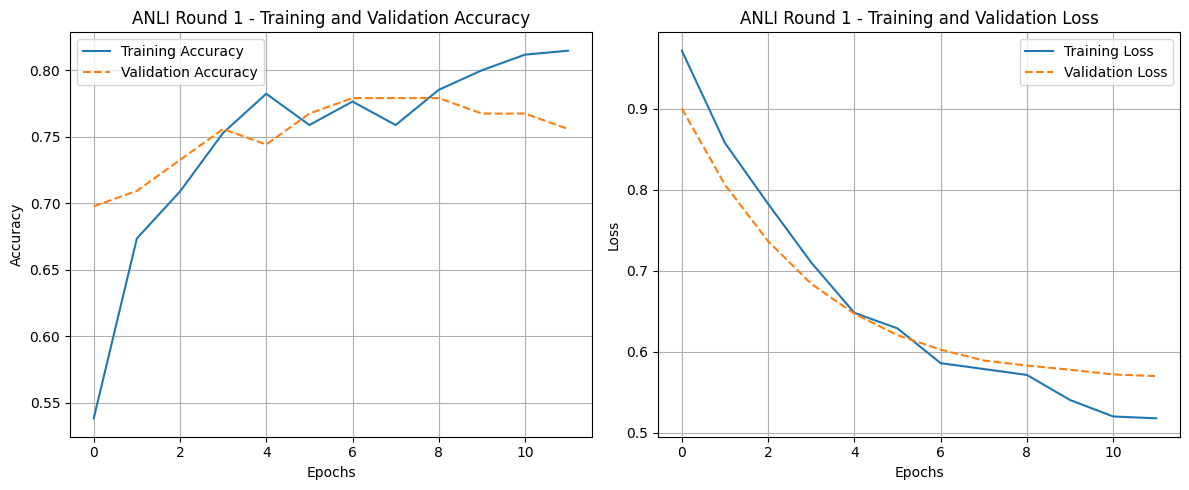

In [123]:
# ANLI Round 1
plot_training_history_capsulenet(history_anli_r1, title_prefix="ANLI Round 1")

In [124]:
# ANLI Round 2
history_anli_r2, test_loss_anli_r2, test_accuracy_anli_r2, trained_model_anli_r2 = train_and_evaluate(
    X_anli_r2_train_capsulenet, y_anli_r2_train_capsulenet, X_anli_r2_val_capsulenet, y_anli_r2_val_capsulenet, epochs=20, batch_size=32
)
print("Test loss on ANLI Round 2:", test_loss_anli_r2)
print("Test accuracy on ANLI Round 2:", test_accuracy_anli_r2)

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.2754 - loss: 1.1647 - val_accuracy: 0.4045 - val_loss: 1.0628 - learning_rate: 5.0000e-04
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4694 - loss: 1.0208 - val_accuracy: 0.6517 - val_loss: 0.9772 - learning_rate: 5.0000e-04
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5887 - loss: 0.9514 - val_accuracy: 0.6629 - val_loss: 0.9178 - learning_rate: 5.0000e-04
Epoch 4/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6763 - loss: 0.8566 - val_accuracy: 0.6517 - val_loss: 0.8720 - learning_rate: 5.0000e-04
Epoch 5/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6916 - loss: 0.7956 - val_accuracy: 0.6517 - val_loss: 0.8414 - learning_rate: 5.0000e-04
Epoch 6/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6698 - loss: 0.8197 - val_accuracy: 0.6629 - val_loss: 0.8173 - learning_rate: 5.0000e-04
Epoch 7/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6991 - los

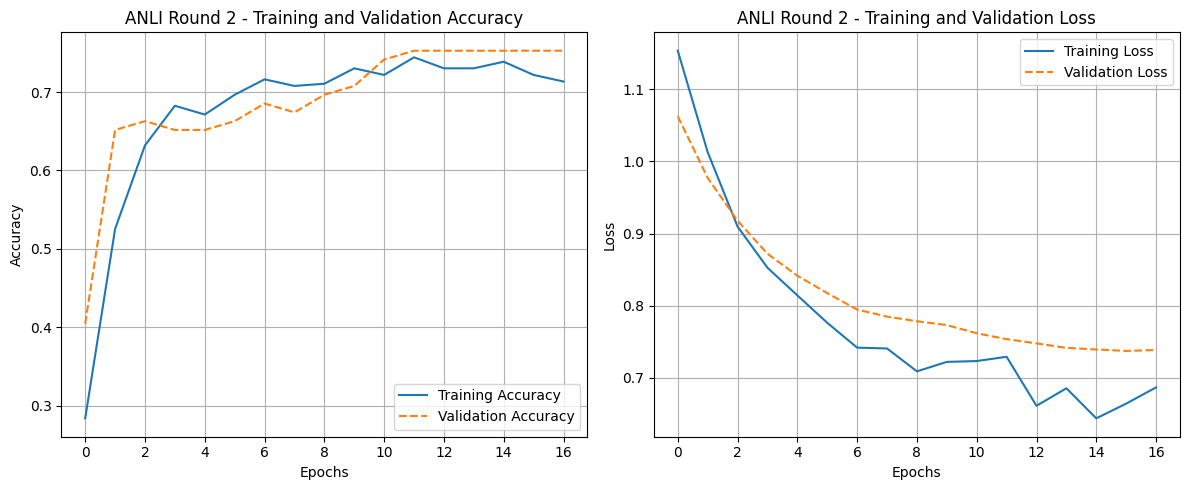

In [125]:
# ANLI Round 2
plot_training_history_capsulenet(history_anli_r2, title_prefix="ANLI Round 2")

In [126]:
# ANLI Round 3
history_anli_r3, test_loss_anli_r3, test_accuracy_anli_r3, trained_model_anli_r3 = train_and_evaluate(
    X_anli_r3_train_capsulenet, y_anli_r3_train_capsulenet, X_anli_r3_val_capsulenet, y_anli_r3_val_capsulenet, epochs=20, batch_size=32
)
print("Test loss on ANLI Round 3:", test_loss_anli_r3)
print("Test accuracy on ANLI Round 3:", test_accuracy_anli_r3)

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.4743 - loss: 1.1174 - val_accuracy: 0.6698 - val_loss: 0.9184 - learning_rate: 5.0000e-04
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6251 - loss: 0.9078 - val_accuracy: 0.6509 - val_loss: 0.8226 - learning_rate: 5.0000e-04
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6259 - loss: 0.8442 - val_accuracy: 0.6792 - val_loss: 0.7877 - learning_rate: 5.0000e-04
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6756 - loss: 0.7659 - val_accuracy: 0.6604 - val_loss: 0.7691 - learning_rate: 5.0000e-04
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6576 - loss: 0.7658 - val_accuracy: 0.6698 - val_loss: 0.7568 - learning_rate: 5.0000e-04
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6638 - loss: 0.7237 - val_accuracy: 0.6792 - val_loss: 0.7424 - learning_rate: 5.0000e-04
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6786 - los

In [127]:
X_all_train = np.concatenate([
    X_train_capsulenet_snli, 
    X_train_capsulenet_mnli_matched, 
    X_train_capsulenet_mnli_mismatched, 
    X_train_capsulenet_anli_r1, 
    X_train_capsulenet_anli_r2, 
    X_train_capsulenet_anli_r3  
])

X_all_val = np.concatenate([
    X_val_capsulenet_snli, 
    X_val_capsulenet_mnli_matched, 
    X_val_capsulenet_mnli_mismatched, 
    X_val_capsulenet_anli_r1, 
    X_val_capsulenet_anli_r2, 
    X_val_capsulenet_anli_r3
])

y_all_train_one_hot = np.concatenate([
    y_train_snli_one_hot, 
    y_train_mnli_matched_one_hot, 
    y_train_mnli_mismatched_one_hot, 
    y_train_anli_r1_one_hot, 
    y_train_anli_r2_one_hot, 
    y_train_anli_r3_one_hot
])


y_all_val_one_hot = np.concatenate([
    y_val_snli_one_hot, 
    y_val_mnli_matched_one_hot, 
    y_val_mnli_mismatched_one_hot, 
    y_val_anli_r1_one_hot, 
    y_val_anli_r2_one_hot, 
    y_val_anli_r3_one_hot
])

scaler = StandardScaler()

# Fit the scaler to each task's feature data
X_train_all_scaled = scaler.fit_transform(X_all_train)
X_val_all_scaled = scaler.fit_transform(X_all_val)

X_all_train = ensure_dense(X_train_all_scaled)
X_all_val = ensure_dense(X_val_all_scaled)
y_all_train = ensure_dense(y_all_train_one_hot)
y_all_val = ensure_dense(y_all_val_one_hot)


# Call the function for a specific task (example: snli)
history_combined, test_loss_combined, test_accuracy_combined, trained_model_combined = train_and_evaluate(
    X_all_train, y_all_train, X_all_val, y_all_val, epochs=20, batch_size=32
)

print("Test loss on Combined tasks:", test_loss_combined)
print("Test accuracy on Combined tasks:", test_accuracy_combined)

Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9124 - loss: 0.3341 - val_accuracy: 0.9443 - val_loss: 0.1896 - learning_rate: 5.0000e-04
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9477 - loss: 0.1687 - val_accuracy: 0.9477 - val_loss: 0.1839 - learning_rate: 5.0000e-04
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9450 - loss: 0.1852 - val_accuracy: 0.9446 - val_loss: 0.1855 - learning_rate: 5.0000e-04
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9455 - loss: 0.1769 - val_accuracy: 0.9474 - val_loss: 0.1813 - learning_rate: 5.0000e-04
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9503 - loss: 0.1691 - val_accuracy: 0.9451 - val_loss: 0.1802 - learning_rate: 5.0000e-04
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9485 - loss: 0.1699 - val_accuracy: 0.9451 - val_loss: 0.1808 - learning_rate: 5.0000e-04
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 

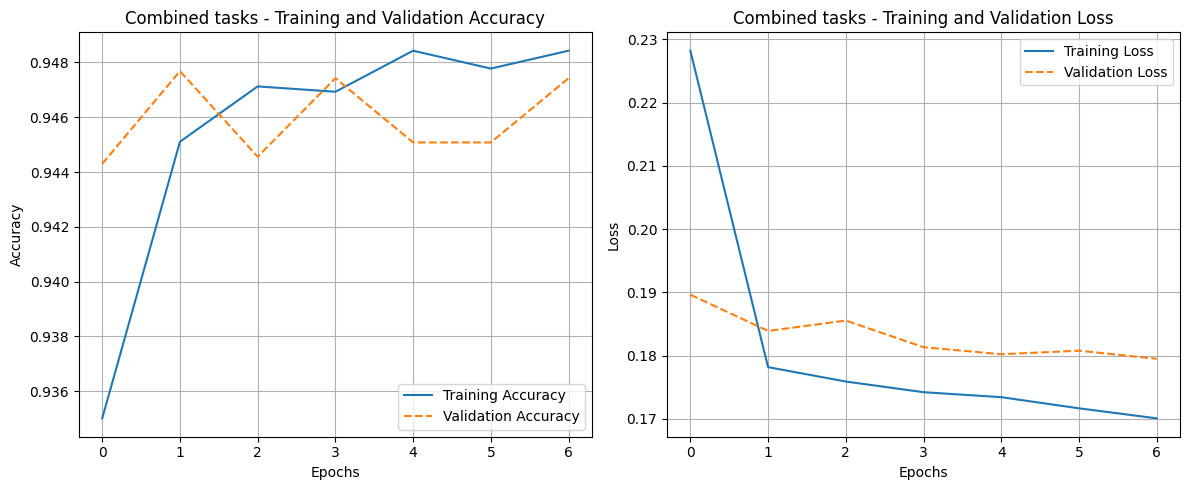

In [128]:
# combined
plot_training_history_capsulenet(history_combined, title_prefix="Combined tasks")

In [129]:
def get_capsulenet_predictions(model, X, true_labels_one_hot):
    probabilities = model.predict(X)
    # Converting one-hot encoded labels back to class labels
    true_labels = np.argmax(true_labels_one_hot, axis=1)
    columns = ['Prob_Entailment', 'Prob_Neutral', 'Prob_Contradiction']
    df = pd.DataFrame(probabilities, columns=columns)
    df['True Labels'] = true_labels  # Now a 1D array of class labels
    return df

# Assuming the trained_model_combined and X_all_val are already defined and correct
CapsuleNet_predictions_all = get_capsulenet_predictions(trained_model_combined, X_all_val,y_all_val)

# Generate predictions for each task
CapsuleNet_predictions_snli = get_capsulenet_predictions(trained_model_snli, X_val_capsulenet_snli, y_val_snli_one_hot)
CapsuleNet_predictions_mnli_matched = get_capsulenet_predictions(trained_model_mnli_matched, X_mnli_matched_val_capsulenet, y_val_mnli_matched_one_hot)
CapsuleNet_predictions_mnli_mismatched = get_capsulenet_predictions(trained_model_mnli_mismatched, X_mnli_mismatched_val_capsulenet, y_val_mnli_mismatched_one_hot)
CapsuleNet_predictions_anli_r1 = get_capsulenet_predictions(trained_model_anli_r1, X_anli_r1_val_capsulenet, y_val_anli_r1_one_hot)
CapsuleNet_predictions_anli_r2 = get_capsulenet_predictions(trained_model_anli_r2, X_anli_r2_val_capsulenet, y_val_anli_r2_one_hot)
CapsuleNet_predictions_anli_r3 = get_capsulenet_predictions(trained_model_anli_r3, X_anli_r3_val_capsulenet, y_val_anli_r3_one_hot)


121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [130]:
CapsuleNet_predictions_all

,Prob_Entailment,Prob_Neutral,Prob_Contradiction,True Labels
0,0.001168,0.011943,0.986889,2
1,0.001333,0.013765,0.984902,2
2,0.001185,0.012160,0.986656,2
3,0.001739,0.018005,0.980257,2
4,0.001253,0.013026,0.985721,2
...,...,...,...,...
3837,0.014458,0.192970,0.792572,2
3838,0.003130,0.026660,0.970210,2
3839,0.001546,0.016472,0.981982,1
3840,0.008544,0.116322,0.875134,2


In [131]:
# Save each DataFrame to a CSV file
CapsuleNet_predictions_all.to_csv('CapsuleNet_predictions_all.csv', index=False)

CapsuleNet_predictions_snli.to_csv('CapsuleNet_predictions_snli.csv', index=False)
CapsuleNet_predictions_mnli_matched.to_csv('CapsuleNet_predictions_mnli_matched.csv', index=False)
CapsuleNet_predictions_mnli_mismatched.to_csv('CapsuleNet_predictions_mnli_mismatched.csv', index=False)
CapsuleNet_predictions_anli_r1.to_csv('CapsuleNet_predictions_anli_r1.csv', index=False)
CapsuleNet_predictions_anli_r2.to_csv('CapsuleNet_predictions_anli_r2.csv', index=False)
CapsuleNet_predictions_anli_r3.to_csv('CapsuleNet_predictions_anli_r3.csv', index=False)

In [132]:
GAT_probabilities_snli

,GAT_Entailment,GAT_Neutral,GAT_Contradiction,True Labels
0,0.001178,0.004914,0.993908,2
1,0.001251,0.005348,0.993401,2
2,0.001184,0.004963,0.993853,2
3,0.001386,0.006214,0.992401,2
4,0.001226,0.005230,0.993545,2
...,...,...,...,...
1202,0.988196,0.010685,0.001120,0
1203,0.002081,0.009614,0.988305,2
1204,0.987914,0.010952,0.001133,0
1205,0.001240,0.005364,0.993396,2


In [133]:
RNN_predictions_SNLI

,RNN_Entailment,RNN_Neutral,RNN_Contradiction,True_Label
0,0.001185,0.005861,0.992954,2
1,0.001280,0.006412,0.992308,2
2,0.001196,0.005924,0.992880,2
3,0.001470,0.007503,0.991027,2
4,0.001247,0.006257,0.992496,2
...,...,...,...,...
1202,0.981158,0.017464,0.001377,0
1203,0.002436,0.012228,0.985335,2
1204,0.980649,0.017945,0.001406,0
1205,0.001275,0.006437,0.992288,2


In [134]:
CapsuleNet_predictions_snli

,Prob_Entailment,Prob_Neutral,Prob_Contradiction,True Labels
0,0.034473,0.049313,0.916214,2
1,0.035905,0.051234,0.912861,2
2,0.034611,0.049514,0.915875,2
3,0.038311,0.054492,0.907198,2
4,0.035205,0.050458,0.914338,2
...,...,...,...,...
1202,0.926133,0.062567,0.011300,0
1203,0.046478,0.063988,0.889534,2
1204,0.925508,0.063090,0.011402,0
1205,0.035905,0.051395,0.912700,2


In [149]:
import pandas as pd

# Assuming you have the three DataFrames with probabilities and predictions for the SNLI task:
# GAT_probabilities_snli, RNN_predictions_SNLI, and CapsuleNet_predictions_snli
# And each DataFrame contains a column named 'True_Labels' for true labels

# Drop the True_Label column from GAT and CapsuleNet DataFrames if they exist
GAT_probabilities_snli.drop(columns=['True_Label'], errors='ignore', inplace=True)
CapsuleNet_predictions_snli.drop(columns=['True_Label'], errors='ignore', inplace=True)

# Ensure that 'True_Label' in RNN_predictions_SNLI is correctly named and keep it at the end
RNN_predictions_SNLI = RNN_predictions_SNLI.rename(columns={'True Labels': 'True_Label'})  # Renaming for consistency

# Concatenate features from all models along with the True_Label from RNN_predictions_SNLI
hybrid_snli = pd.concat([
    GAT_probabilities_snli, 
    RNN_predictions_SNLI.drop(columns=['True_Label']),  # Drop True_Label to avoid duplication
    CapsuleNet_predictions_snli, 
    RNN_predictions_SNLI[['True_Label']]  # Add True_Label at the end
], axis=1)


In [150]:
hybrid_snli

,GAT_Entailment,GAT_Neutral,GAT_Contradiction,RNN_Entailment,RNN_Neutral,RNN_Contradiction,Prob_Entailment,Prob_Neutral,Prob_Contradiction,True_Label
0,0.001178,0.004914,0.993908,0.001185,0.005861,0.992954,0.034473,0.049313,0.916214,2
1,0.001251,0.005348,0.993401,0.001280,0.006412,0.992308,0.035905,0.051234,0.912861,2
2,0.001184,0.004963,0.993853,0.001196,0.005924,0.992880,0.034611,0.049514,0.915875,2
3,0.001386,0.006214,0.992401,0.001470,0.007503,0.991027,0.038311,0.054492,0.907198,2
4,0.001226,0.005230,0.993545,0.001247,0.006257,0.992496,0.035205,0.050458,0.914338,2
...,...,...,...,...,...,...,...,...,...,...
1202,0.988196,0.010685,0.001120,0.981158,0.017464,0.001377,0.926133,0.062567,0.011300,0
1203,0.002081,0.009614,0.988305,0.002436,0.012228,0.985335,0.046478,0.063988,0.889534,2
1204,0.987914,0.010952,0.001133,0.980649,0.017945,0.001406,0.925508,0.063090,0.011402,0
1205,0.001240,0.005364,0.993396,0.001275,0.006437,0.992288,0.035905,0.051395,0.912700,2


In [151]:
RNN_predictions_MNLI_matched

,RNN_Entailment,RNN_Neutral,RNN_Contradiction,True_Label
0,0.982915,0.014943,0.002142,0
1,0.002981,0.012486,0.984533,2
2,0.693440,0.294804,0.011756,0
3,0.002687,0.011102,0.986211,2
4,0.002781,0.011441,0.985779,2
...,...,...,...,...
1167,0.002524,0.010180,0.987296,2
1168,0.985031,0.012998,0.001971,0
1169,0.007085,0.040165,0.952750,1
1170,0.975144,0.022133,0.002723,0


In [153]:
# Drop the True_Label column from GAT and CapsuleNet DataFrames if they exist
GAT_probabilities_mnli_matched.drop(columns=['True Labels'], errors='ignore', inplace=True)
CapsuleNet_predictions_mnli_matched.drop(columns=['True Labels'], errors='ignore', inplace=True)


RNN_predictions_MNLI_matched = RNN_predictions_MNLI_matched.rename(columns={'True Labels': 'True_Label'})  # Renaming for consistency


hybrid_mnli_matched = pd.concat([
    GAT_probabilities_mnli_matched, 
    RNN_predictions_MNLI_matched.drop(columns=['True_Label']),  # Drop True_Label to avoid duplication
    CapsuleNet_predictions_mnli_matched, 
    RNN_predictions_MNLI_matched[['True_Label']]  # Add True_Label at the end
], axis=1)

hybrid_mnli_matched

,GAT_Entailment,GAT_Neutral,GAT_Contradiction,RNN_Entailment,RNN_Neutral,RNN_Contradiction,Prob_Entailment,Prob_Neutral,Prob_Contradiction,True_Label
0,0.989400,0.008936,0.001664,0.982915,0.014943,0.002142,0.991915,0.006675,0.001410,0
1,0.001962,0.007921,0.990117,0.002981,0.012486,0.984533,0.002561,0.009749,0.987690,2
2,0.854539,0.132977,0.012484,0.693440,0.294804,0.011756,0.839583,0.139014,0.021404,0
3,0.001778,0.007056,0.991167,0.002687,0.011102,0.986211,0.001974,0.007573,0.990453,2
4,0.001844,0.007294,0.990862,0.002781,0.011441,0.985779,0.002154,0.008140,0.989706,2
...,...,...,...,...,...,...,...,...,...,...
1167,0.001653,0.006386,0.991960,0.002524,0.010180,0.987296,0.001746,0.006035,0.992220,2
1168,0.990538,0.007949,0.001512,0.985031,0.012998,0.001971,0.993605,0.005259,0.001136,0
1169,0.005051,0.025323,0.969625,0.007085,0.040165,0.952750,0.043992,0.141149,0.814859,1
1170,0.984192,0.013578,0.002230,0.975144,0.022133,0.002723,0.977662,0.019213,0.003125,0


In [155]:
RNN_predictions_MNLI_mismatched

,RNN_Entailment,RNN_Neutral,RNN_Contradiction,True_Label
0,0.000571,0.007718,0.991711,2
1,0.990300,0.009409,0.000291,0
2,0.987736,0.011900,0.000364,0
3,0.000593,0.008087,0.991320,2
4,0.989239,0.010435,0.000326,0
...,...,...,...,...
1177,0.000636,0.008783,0.990581,2
1178,0.000667,0.010009,0.989325,2
1179,0.000971,0.013192,0.985836,2
1180,0.000568,0.007694,0.991739,2


In [154]:
# Drop the True_Label column from GAT and CapsuleNet DataFrames if they exist
GAT_probabilities_mnli_mismatched.drop(columns=['True Labels'], errors='ignore', inplace=True)
CapsuleNet_predictions_mnli_mismatched.drop(columns=['True Labels'], errors='ignore', inplace=True)


RNN_predictions_MNLI_mismatched = RNN_predictions_MNLI_mismatched.rename(columns={'True Labels': 'True_Label'})  # Renaming for consistency


hybrid_mnli_mismatched = pd.concat([
    GAT_probabilities_mnli_mismatched, 
    RNN_predictions_MNLI_mismatched.drop(columns=['True_Label']),  # Drop True_Label to avoid duplication
    CapsuleNet_predictions_mnli_mismatched, 
    RNN_predictions_MNLI_mismatched[['True_Label']]  # Add True_Label at the end
], axis=1)

hybrid_mnli_mismatched

,GAT_Entailment,GAT_Neutral,GAT_Contradiction,RNN_Entailment,RNN_Neutral,RNN_Contradiction,Prob_Entailment,Prob_Neutral,Prob_Contradiction,True_Label
0,0.000566,0.006784,0.992650,0.000571,0.007718,0.991711,0.000437,0.004932,0.994631,2
1,0.991069,0.008056,0.000874,0.990300,0.009409,0.000291,0.994038,0.005640,0.000322,0
2,0.988915,0.010038,0.001047,0.987736,0.011900,0.000364,0.990789,0.008692,0.000519,0
3,0.000583,0.007089,0.992328,0.000593,0.008087,0.991320,0.000502,0.005739,0.993759,2
4,0.990220,0.008838,0.000941,0.989239,0.010435,0.000326,0.992579,0.007009,0.000412,0
...,...,...,...,...,...,...,...,...,...,...
1177,0.000613,0.007721,0.991666,0.000636,0.008783,0.990581,0.000651,0.007740,0.991608,2
1178,0.000665,0.008881,0.990454,0.000667,0.010009,0.989325,0.000787,0.009460,0.989753,2
1179,0.000883,0.012569,0.986548,0.000971,0.013192,0.985836,0.002265,0.032106,0.965629,2
1180,0.000564,0.006770,0.992666,0.000568,0.007694,0.991739,0.000435,0.004924,0.994641,2


In [156]:
RNN_predictions_ANLI_R1

,RNN_Entailment,RNN_Neutral,RNN_Contradiction,True_Label
0,0.127589,0.355259,0.517152,0
1,0.680135,0.252667,0.067198,0
2,0.016257,0.080206,0.903537,2
3,0.493929,0.353534,0.152537,1
4,0.930887,0.030190,0.038923,0
...,...,...,...,...
81,0.016835,0.084560,0.898606,1
82,0.942780,0.026165,0.031055,0
83,0.944783,0.023799,0.031419,2
84,0.034560,0.867919,0.097522,1


In [157]:
# Drop the True_Label column from GAT and CapsuleNet DataFrames if they exist
GAT_probabilities_anli_r1.drop(columns=['True Labels'], errors='ignore', inplace=True)
CapsuleNet_predictions_anli_r1.drop(columns=['True Labels'], errors='ignore', inplace=True)


RNN_predictions_ANLI_R1 = RNN_predictions_ANLI_R1.rename(columns={'True Labels': 'True_Label'})  # Renaming for consistency


hybrid_anli_r1 = pd.concat([
    GAT_probabilities_anli_r1, 
    RNN_predictions_ANLI_R1.drop(columns=['True_Label']),  # Drop True_Label to avoid duplication
    CapsuleNet_predictions_anli_r1, 
    RNN_predictions_ANLI_R1[['True_Label']]  # Add True_Label at the end
], axis=1)

hybrid_anli_r1

,GAT_Entailment,GAT_Neutral,GAT_Contradiction,RNN_Entailment,RNN_Neutral,RNN_Contradiction,Prob_Entailment,Prob_Neutral,Prob_Contradiction,True_Label
0,0.078895,0.157676,0.763429,0.127589,0.355259,0.517152,0.245634,0.248479,0.505888,0
1,0.718970,0.237719,0.043311,0.680135,0.252667,0.067198,0.418964,0.414279,0.166756,0
2,0.014651,0.071273,0.914076,0.016257,0.080206,0.903537,0.049140,0.056351,0.894509,2
3,0.524811,0.400768,0.074421,0.493929,0.353534,0.152537,0.340999,0.412640,0.246361,1
4,0.952925,0.023302,0.023773,0.930887,0.030190,0.038923,0.781617,0.079855,0.138527,0
...,...,...,...,...,...,...,...,...,...,...
81,0.015319,0.076860,0.907821,0.016835,0.084560,0.898606,0.051655,0.059768,0.888578,1
82,0.961312,0.019885,0.018804,0.942780,0.026165,0.031055,0.824027,0.068102,0.107871,0
83,0.954047,0.022078,0.023874,0.944783,0.023799,0.031419,0.886506,0.039994,0.073500,2
84,0.014673,0.964761,0.020566,0.034560,0.867919,0.097522,0.127602,0.760941,0.111456,1


In [159]:
RNN_predictions_ANLI_R2

,RNN_Entailment,RNN_Neutral,RNN_Contradiction,True_Label
0,0.607526,0.323146,0.069328,0
1,0.052410,0.356374,0.591217,2
2,0.847770,0.035512,0.116718,0
3,0.865475,0.036885,0.097640,0
4,0.016425,0.163624,0.819951,1
...,...,...,...,...
84,0.862688,0.039281,0.098031,2
85,0.093144,0.657522,0.249334,1
86,0.864593,0.034607,0.100800,0
87,0.049651,0.282616,0.667733,1


In [158]:
# Drop the True_Label column from GAT and CapsuleNet DataFrames if they exist
GAT_probabilities_anli_r2.drop(columns=['True Labels'], errors='ignore', inplace=True)
CapsuleNet_predictions_anli_r2.drop(columns=['True Labels'], errors='ignore', inplace=True)


RNN_predictions_ANLI_R2 = RNN_predictions_ANLI_R2.rename(columns={'True Labels': 'True_Label'})  # Renaming for consistency


hybrid_anli_r2 = pd.concat([
    GAT_probabilities_anli_r2, 
    RNN_predictions_ANLI_R2.drop(columns=['True_Label']),  # Drop True_Label to avoid duplication
    CapsuleNet_predictions_anli_r2, 
    RNN_predictions_ANLI_R2[['True_Label']]  # Add True_Label at the end
], axis=1)

hybrid_anli_r2

,GAT_Entailment,GAT_Neutral,GAT_Contradiction,RNN_Entailment,RNN_Neutral,RNN_Contradiction,Prob_Entailment,Prob_Neutral,Prob_Contradiction,True_Label
0,0.706755,0.274518,0.018727,0.607526,0.323146,0.069328,0.647179,0.272268,0.080553,0
1,0.022558,0.213497,0.763945,0.052410,0.356374,0.591217,0.135529,0.231148,0.633323,2
2,0.775436,0.021173,0.203391,0.847770,0.035512,0.116718,0.793721,0.082847,0.123432,0
3,0.798059,0.023936,0.178005,0.865475,0.036885,0.097640,0.814689,0.080692,0.104619,0
4,0.007255,0.167176,0.825569,0.016425,0.163624,0.819951,0.025531,0.140338,0.834131,1
...,...,...,...,...,...,...,...,...,...,...
84,0.799597,0.026028,0.174375,0.862688,0.039281,0.098031,0.812878,0.083300,0.103822,2
85,0.055438,0.712877,0.231686,0.093144,0.657522,0.249334,0.129842,0.508311,0.361847,1
86,0.785843,0.021689,0.192467,0.864593,0.034607,0.100800,0.812099,0.077628,0.110273,0
87,0.019550,0.143929,0.836521,0.049651,0.282616,0.667733,0.146642,0.232313,0.621045,1


In [161]:
RNN_predictions_ANLI_R3

,RNN_Entailment,RNN_Neutral,RNN_Contradiction,True_Label
0,0.925944,0.027520,0.046536,0
1,0.009124,0.160373,0.830503,2
2,0.009670,0.167656,0.822674,1
3,0.015575,0.225223,0.759202,2
4,0.938789,0.020239,0.040972,0
...,...,...,...,...
101,0.024423,0.298233,0.677344,2
102,0.010566,0.175728,0.813706,2
103,0.009732,0.167842,0.822426,1
104,0.018710,0.276872,0.704419,2


In [160]:
# Drop the True_Label column from GAT and CapsuleNet DataFrames if they exist
GAT_probabilities_anli_r3.drop(columns=['True Labels'], errors='ignore', inplace=True)
CapsuleNet_predictions_anli_r3.drop(columns=['True Labels'], errors='ignore', inplace=True)


RNN_predictions_ANLI_R3 = RNN_predictions_ANLI_R3.rename(columns={'True Labels': 'True_Label'})  # Renaming for consistency


hybrid_anli_r3 = pd.concat([
    GAT_probabilities_anli_r3, 
    RNN_predictions_ANLI_R3.drop(columns=['True_Label']),  # Drop True_Label to avoid duplication
    CapsuleNet_predictions_anli_r3, 
    RNN_predictions_ANLI_R3[['True_Label']]  # Add True_Label at the end
], axis=1)

hybrid_anli_r3

,GAT_Entailment,GAT_Neutral,GAT_Contradiction,RNN_Entailment,RNN_Neutral,RNN_Contradiction,Prob_Entailment,Prob_Neutral,Prob_Contradiction,True_Label
0,0.880817,0.025165,0.094018,0.925944,0.027520,0.046536,0.875003,0.063749,0.061248,0
1,0.005192,0.144243,0.850565,0.009124,0.160373,0.830503,0.004602,0.127382,0.868015,2
2,0.005523,0.151216,0.843260,0.009670,0.167656,0.822674,0.005426,0.139980,0.854594,1
3,0.009241,0.208247,0.782511,0.015575,0.225223,0.759202,0.014855,0.238514,0.746630,2
4,0.892786,0.019913,0.087301,0.938789,0.020239,0.040972,0.890206,0.055321,0.054474,0
...,...,...,...,...,...,...,...,...,...,...
101,0.013708,0.304512,0.681779,0.024423,0.298233,0.677344,0.024152,0.272967,0.702882,2
102,0.006541,0.170513,0.822947,0.010566,0.175728,0.813706,0.005817,0.147888,0.846296,2
103,0.005588,0.151511,0.842901,0.009732,0.167842,0.822426,0.005445,0.139782,0.854773,1
104,0.007856,0.273673,0.718471,0.018710,0.276872,0.704419,0.016205,0.228225,0.755569,2


In [162]:
RNN_predictions_ALL

,RNN_Entailment,RNN_Neutral,RNN_Contradiction,True_Label
0,0.987476,0.008851,0.003674,0
1,0.973344,0.020074,0.006582,0
2,0.987817,0.008621,0.003562,0
3,0.881707,0.103263,0.015031,0
4,0.328146,0.123257,0.548597,2
...,...,...,...,...
3835,0.006368,0.056067,0.937565,2
3836,0.988252,0.008278,0.003470,0
3837,0.007297,0.056234,0.936469,2
3838,0.985473,0.010545,0.003982,0


In [165]:
# Drop the True_Label column from GAT and CapsuleNet DataFrames if they exist
GAT_probabilities_combined.drop(columns=['True Labels'], errors='ignore', inplace=True)
CapsuleNet_predictions_all.drop(columns=['True Labels'], errors='ignore', inplace=True)


RNN_predictions_ALL = RNN_predictions_ALL.rename(columns={'True Labels': 'True_Label'})  # Renaming for consistency


hybrid_all = pd.concat([
    GAT_probabilities_combined, 
    RNN_predictions_ALL.drop(columns=['True_Label']),  # Drop True_Label to avoid duplication
    CapsuleNet_predictions_all, 
    RNN_predictions_ALL[['True_Label']]  # Add True_Label at the end
], axis=1)

hybrid_all

,GAT_Entailment,GAT_Neutral,GAT_Contradiction,RNN_Entailment,RNN_Neutral,RNN_Contradiction,Prob_Entailment,Prob_Neutral,Prob_Contradiction,True_Label
0,0.001147,0.008487,0.990366,0.987476,0.008851,0.003674,0.001168,0.011943,0.986889,0.0
1,0.001239,0.009186,0.989574,0.973344,0.020074,0.006582,0.001333,0.013765,0.984902,0.0
2,0.001155,0.008569,0.990275,0.987817,0.008621,0.003562,0.001185,0.012160,0.986656,0.0
3,0.001422,0.010644,0.987934,0.881707,0.103263,0.015031,0.001739,0.018005,0.980257,0.0
4,0.001204,0.008960,0.989836,0.328146,0.123257,0.548597,0.001253,0.013026,0.985721,2.0
...,...,...,...,...,...,...,...,...,...,...
3837,0.006786,0.059346,0.933868,0.007297,0.056234,0.936469,0.014458,0.192970,0.792572,2.0
3838,0.001571,0.010827,0.987602,0.985473,0.010545,0.003982,0.003130,0.026660,0.970210,0.0
3839,0.001309,0.009854,0.988837,0.983028,0.012508,0.004464,0.001546,0.016472,0.981982,0.0
3840,0.004108,0.049824,0.946068,NaN,NaN,NaN,0.008544,0.116322,0.875134,NaN


In [174]:
# Convert 'True_Label' column to integer in the 'hybrid_all' DataFrame
hybrid_all['True_Label'] = hybrid_all['True_Label'].dropna().astype(int)


In [167]:
# Drop any rows with NaN values in the hybrid_snli dataframe
hybrid_snli.dropna(inplace=True)

# Drop any rows with NaN values in the hybrid_mnli_matched dataframe
hybrid_mnli_matched.dropna(inplace=True)

# Drop any rows with NaN values in the hybrid_mnli_mismatched dataframe
hybrid_mnli_mismatched.dropna(inplace=True)

# Drop any rows with NaN values in the hybrid_anli_r1 dataframe
hybrid_anli_r1.dropna(inplace=True)

# Drop any rows with NaN values in the hybrid_anli_r2 dataframe
hybrid_anli_r2.dropna(inplace=True)

# Drop any rows with NaN values in the hybrid_anli_r3 dataframe
hybrid_anli_r3.dropna(inplace=True)

# Drop any rows with NaN values in the hybrid_all dataframe
hybrid_all.dropna(inplace=True)


# Check for NaN values in the hybrid_snli dataframe
nan_in_hybrid_snli = hybrid_snli.isnull().any().any()

# Check for NaN values in the hybrid_mnli_matched dataframe
nan_in_hybrid_mnli_matched = hybrid_mnli_matched.isnull().any().any()

# Check for NaN values in the hybrid_mnli_mismatched dataframe
nan_in_hybrid_mnli_mismatched = hybrid_mnli_mismatched.isnull().any().any()

# Check for NaN values in the hybrid_anli_r1 dataframe
nan_in_hybrid_anli_r1 = hybrid_anli_r1.isnull().any().any()

# Check for NaN values in the hybrid_anli_r2 dataframe
nan_in_hybrid_anli_r2 = hybrid_anli_r2.isnull().any().any()

# Check for NaN values in the hybrid_anli_r3 dataframe
nan_in_hybrid_anli_r3 = hybrid_anli_r3.isnull().any().any()

# Check for NaN values in the hybrid_all dataframe
nan_in_hybrid_all = hybrid_all.isnull().any().any()

# Print the results to see if any NaN values are present
print("NaN in Hybrid SNLI:", nan_in_hybrid_snli)
print("NaN in Hybrid MNLI Matched:", nan_in_hybrid_mnli_matched)
print("NaN in Hybrid MNLI Mismatched:", nan_in_hybrid_mnli_mismatched)
print("NaN in Hybrid ANLI R1:", nan_in_hybrid_anli_r1)
print("NaN in Hybrid ANLI R2:", nan_in_hybrid_anli_r2)
print("NaN in Hybrid ANLI R3:", nan_in_hybrid_anli_r3)
print("NaN in Hybrid ALL:", nan_in_hybrid_all)


NaN in Hybrid SNLI: False
NaN in Hybrid MNLI Matched: False
NaN in Hybrid MNLI Mismatched: False
NaN in Hybrid ANLI R1: False
NaN in Hybrid ANLI R2: False
NaN in Hybrid ANLI R3: False
NaN in Hybrid ALL: False


In [175]:
# Splitting the SNLI hybrid dataset
X_snli = hybrid_snli.drop('True_Label', axis=1)
y_snli = hybrid_snli['True_Label']
X_snli_train, X_snli_test, y_snli_train, y_snli_test = train_test_split(X_snli, y_snli, test_size=0.2, random_state=42)

# Splitting the MNLI Matched hybrid dataset
X_mnli_matched = hybrid_mnli_matched.drop('True_Label', axis=1)
y_mnli_matched = hybrid_mnli_matched['True_Label']
X_mnli_matched_train, X_mnli_matched_test, y_mnli_matched_train, y_mnli_matched_test = train_test_split(X_mnli_matched, y_mnli_matched, test_size=0.2, random_state=42)

# Splitting the MNLI Mismatched hybrid dataset
X_mnli_mismatched = hybrid_mnli_mismatched.drop('True_Label', axis=1)
y_mnli_mismatched = hybrid_mnli_mismatched['True_Label']
X_mnli_mismatched_train, X_mnli_mismatched_test, y_mnli_mismatched_train, y_mnli_mismatched_test = train_test_split(X_mnli_mismatched, y_mnli_mismatched, test_size=0.2, random_state=42)

# Splitting the ANLI R1 hybrid dataset
X_anli_r1 = hybrid_anli_r1.drop('True_Label', axis=1)
y_anli_r1 = hybrid_anli_r1['True_Label']
X_anli_r1_train, X_anli_r1_test, y_anli_r1_train, y_anli_r1_test = train_test_split(X_anli_r1, y_anli_r1, test_size=0.2, random_state=42)

# Splitting the ANLI R2 hybrid dataset
X_anli_r2 = hybrid_anli_r2.drop('True_Label', axis=1)
y_anli_r2 = hybrid_anli_r2['True_Label']
X_anli_r2_train, X_anli_r2_test, y_anli_r2_train, y_anli_r2_test = train_test_split(X_anli_r2, y_anli_r2, test_size=0.2, random_state=42)

# Splitting the ANLI R3 hybrid dataset
X_anli_r3 = hybrid_anli_r3.drop('True_Label', axis=1)
y_anli_r3 = hybrid_anli_r3['True_Label']
X_anli_r3_train, X_anli_r3_test, y_anli_r3_train, y_anli_r3_test = train_test_split(X_anli_r3, y_anli_r3, test_size=0.2, random_state=42)

# Assuming hybrid_all DataFrame is already prepared
X_all = hybrid_all.drop('True_Label', axis=1)
y_all = hybrid_all['True_Label']

# Split the data into training and testing sets
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)


In [176]:
# Print training and testing sizes for SNLI
print("Training and testing sizes for SNLI:")
print(X_snli_train.shape, X_snli_test.shape, y_snli_train.shape, y_snli_test.shape)

# Print training and testing sizes for MNLI Matched
print("Training and testing sizes for MNLI Matched:")
print(X_mnli_matched_train.shape, X_mnli_matched_test.shape, y_mnli_matched_train.shape, y_mnli_matched_test.shape)

# Print training and testing sizes for MNLI Mismatched
print("Training and testing sizes for MNLI Mismatched:")
print(X_mnli_mismatched_train.shape, X_mnli_mismatched_test.shape, y_mnli_mismatched_train.shape, y_mnli_mismatched_test.shape)

# Print training and testing sizes for ANLI Round 1
print("Training and testing sizes for ANLI Round 1:")
print(X_anli_r1_train.shape, X_anli_r1_test.shape, y_anli_r1_train.shape, y_anli_r1_test.shape)

# Print training and testing sizes for ANLI Round 2
print("Training and testing sizes for ANLI Round 2:")
print(X_anli_r2_train.shape, X_anli_r2_test.shape, y_anli_r2_train.shape, y_anli_r2_test.shape)

# Print training and testing sizes for ANLI Round 3
print("Training and testing sizes for ANLI Round 3:")
print(X_anli_r3_train.shape, X_anli_r3_test.shape, y_anli_r3_train.shape, y_anli_r3_test.shape)

# Print training and testing sizes for hybrid_all
print("Training and testing sizes for hybrid_all:")
print(X_all_train.shape, X_all_test.shape, y_all_train.shape, y_all_test.shape)



Training and testing sizes for SNLI:
(965, 9) (242, 9) (965,) (242,)
Training and testing sizes for MNLI Matched:
(937, 9) (235, 9) (937,) (235,)
Training and testing sizes for MNLI Mismatched:
(945, 9) (237, 9) (945,) (237,)
Training and testing sizes for ANLI Round 1:
(68, 9) (18, 9) (68,) (18,)
Training and testing sizes for ANLI Round 2:
(71, 9) (18, 9) (71,) (18,)
Training and testing sizes for ANLI Round 3:
(84, 9) (22, 9) (84,) (22,)
Training and testing sizes for hybrid_all:
(3072, 9) (768, 9) (3072,) (768,)


In [178]:
y_all_train


1729    0
2422    0
433     0
2603    0
371     0
       ..
1130    1
1294    2
860     2
3507    2
3174    2
Name: True_Label, Length: 3072, dtype: int64

In [184]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

def train_logistic_regression(X_train, y_train, X_test, y_test, name, use_grid_search=True, C_values=[0.01, 0.1, 1, 10, 100], penalty_types=['l2']):
    """
    Train and evaluate a logistic regression model, returning the model, accuracy, classification report, log loss, and displaying the confusion matrix.
    """
    if use_grid_search:
        grid = GridSearchCV(LogisticRegression(solver='liblinear', random_state=42),
                            {'C': C_values, 'penalty': penalty_types}, cv=5, verbose=1, scoring='accuracy')
        grid.fit(X_train, y_train)
        model = grid.best_estimator_
        print("Best parameters found:", grid.best_params_)
        print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
    else:
        model = LogisticRegression(C=C_values[-1], penalty=penalty_types[0], solver='liblinear', random_state=42)
        model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)  # For calculating log loss

    test_accuracy = accuracy_score(y_test, y_pred)
    test_log_loss = log_loss(y_test, y_prob)  # Calculating log loss
    print("Test Accuracy:", test_accuracy)
    print("Log Loss:", test_log_loss)

    report = classification_report(y_test, y_pred)
    print("Classification Report:\n", report)

    # Confusion matrix plotting
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Neg', 'Predicted Pos'], yticklabels=['Actual Neg', 'Actual Pos'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

    return model, test_accuracy, report, test_log_loss


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'C': 1, 'penalty': 'l1'}
Best cross-validation accuracy: 0.96
Test Accuracy: 0.9628099173553719
Log Loss: 0.16984649339387906
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       114
           1       1.00      0.18      0.31        11
           2       0.96      1.00      0.98       117

    accuracy                           0.96       242
   macro avg       0.98      0.73      0.76       242
weighted avg       0.96      0.96      0.95       242



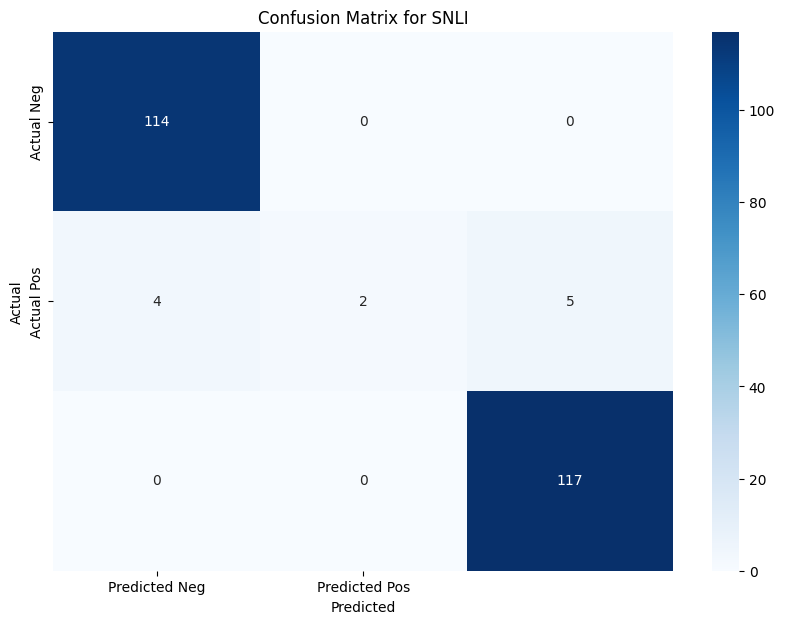

In [186]:
# Assuming X_snli_train, y_snli_train, X_snli_test, y_snli_test are defined
model_snli, accuracy_snli, report_snli, log_loss_snli = train_logistic_regression(
    X_snli_train, y_snli_train, X_snli_test, y_snli_test, 'SNLI',
    use_grid_search=True, C_values=[0.01, 0.1, 1, 10, 100], penalty_types=['l1', 'l2']
)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'C': 10, 'penalty': 'l1'}
Best cross-validation accuracy: 0.97
Test Accuracy: 0.9744680851063829
Log Loss: 0.11034770708656338
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       111
           1       1.00      0.14      0.25         7
           2       0.97      1.00      0.99       117

    accuracy                           0.97       235
   macro avg       0.98      0.71      0.74       235
weighted avg       0.98      0.97      0.97       235



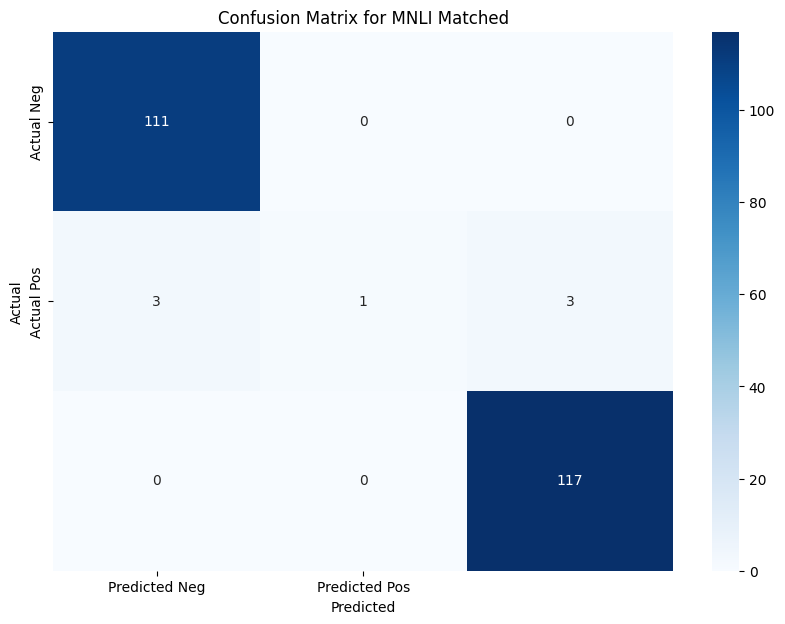

In [187]:
model_mnli_matched, accuracy_mnli_matched, report_mnli_matched, log_loss_mnli_matched = train_logistic_regression(
    X_mnli_matched_train, y_mnli_matched_train, X_mnli_matched_test, y_mnli_matched_test, 'MNLI Matched',
    use_grid_search=True, C_values=[0.01, 0.1, 1, 10, 100], penalty_types=['l1', 'l2']
)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters found: {'C': 0.01, 'penalty': 'l1'}
Best cross-validation accuracy: 0.97
Test Accuracy: 0.9704641350210971
Log Loss: 0.4416554559439912
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       108
           1       0.00      0.00      0.00         7
           2       0.97      1.00      0.98       122

    accuracy                           0.97       237
   macro avg       0.65      0.67      0.66       237
weighted avg       0.94      0.97      0.96       237



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


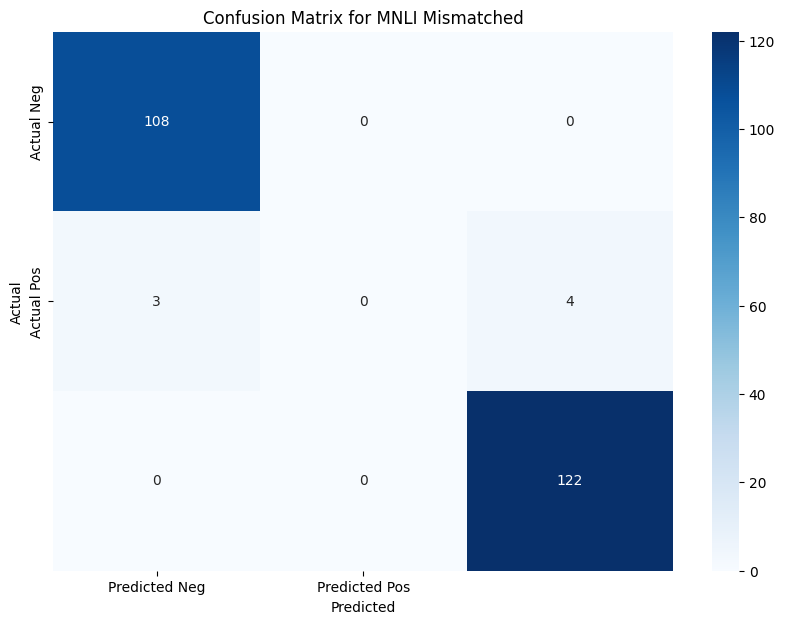

In [188]:
model_mnli_mismatched, accuracy_mnli_mismatched, report_mnli_mismatched, log_loss_mnli_mismatched = train_logistic_regression(
    X_mnli_mismatched_train, y_mnli_mismatched_train, X_mnli_mismatched_test, y_mnli_mismatched_test, 'MNLI Mismatched',
    use_grid_search=True, C_values=[0.01, 0.1, 1, 10, 100], penalty_types=['l1', 'l2']
)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best parameters found: {'C': 10, 'penalty': 'l1'}
Best cross-validation accuracy: 0.82
Test Accuracy: 0.6111111111111112
Log Loss: 0.773333224681886
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.33      0.25      0.29         4
           2       0.57      0.67      0.62         6

    accuracy                           0.61        18
   macro avg       0.55      0.56      0.55        18
weighted avg       0.60      0.61      0.60        18



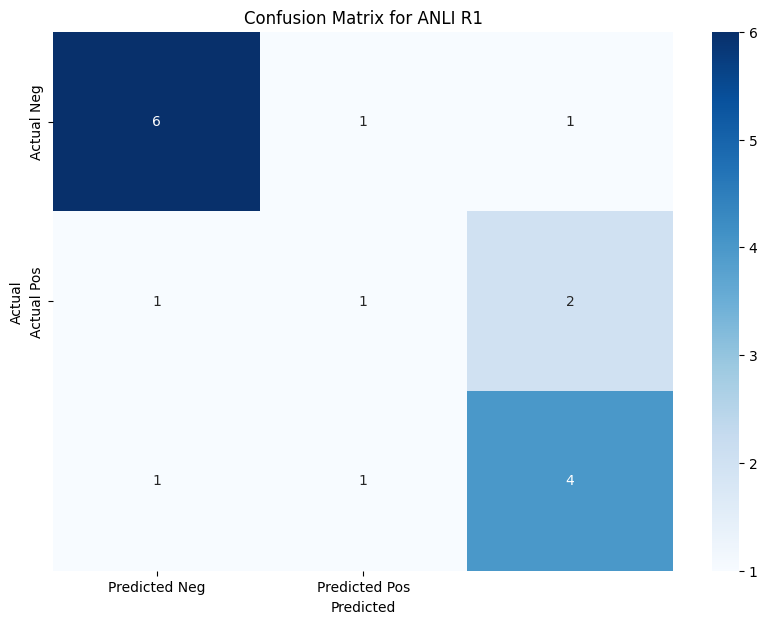

In [189]:
model_anli_r1, accuracy_anli_r1, report_anli_r1, log_loss_anli_r1 = train_logistic_regression(
    X_anli_r1_train, y_anli_r1_train, X_anli_r1_test, y_anli_r1_test, 'ANLI R1',
    use_grid_search=True, C_values=[0.01, 0.1, 1, 10, 100], penalty_types=['l1', 'l2']
)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'C': 1, 'penalty': 'l2'}
Best cross-validation accuracy: 0.76
Test Accuracy: 0.7222222222222222
Log Loss: 0.7740747512940075
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.75      0.50      0.60         6
           2       0.62      0.83      0.71         6

    accuracy                           0.72        18
   macro avg       0.74      0.72      0.72        18
weighted avg       0.74      0.72      0.72        18



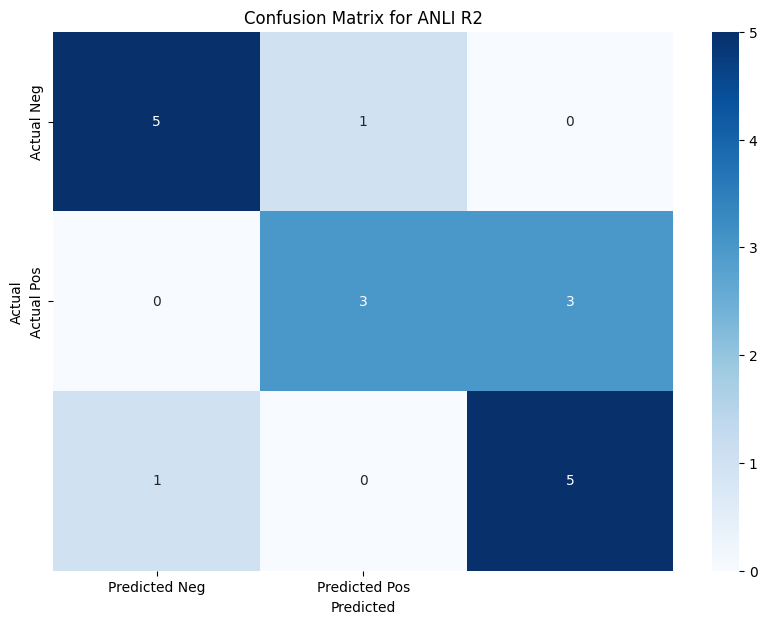

In [190]:
model_anli_r2, accuracy_anli_r2, report_anli_r2, log_loss_anli_r2 = train_logistic_regression(
    X_anli_r2_train, y_anli_r2_train, X_anli_r2_test, y_anli_r2_test, 'ANLI R2',
    use_grid_search=True, C_values=[0.01, 0.1, 1, 10, 100], penalty_types=['l1', 'l2']
)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'C': 10, 'penalty': 'l2'}
Best cross-validation accuracy: 0.73
Test Accuracy: 0.6818181818181818
Log Loss: 0.6651710717285089
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.33      0.25      0.29         4
           2       0.75      0.67      0.71         9

    accuracy                           0.68        22
   macro avg       0.60      0.60      0.60        22
weighted avg       0.66      0.68      0.67        22



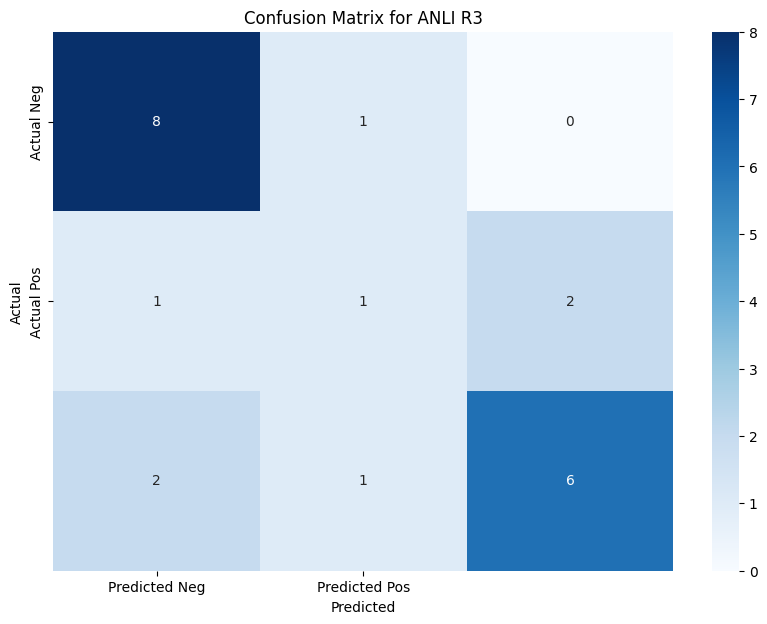

In [191]:
model_anli_r3, accuracy_anli_r3, report_anli_r3, log_loss_anli_r3 = train_logistic_regression(
    X_anli_r3_train, y_anli_r3_train, X_anli_r3_test, y_anli_r3_test, 'ANLI R3',
    use_grid_search=True, C_values=[0.01, 0.1, 1, 10, 100], penalty_types=['l1', 'l2']
)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'C': 1, 'penalty': 'l2'}
Best cross-validation accuracy: 0.95
Test Accuracy: 0.9622395833333334
Log Loss: 0.1629895795100986
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       365
           1       0.85      0.32      0.47        34
           2       0.97      0.99      0.98       369

    accuracy                           0.96       768
   macro avg       0.92      0.77      0.81       768
weighted avg       0.96      0.96      0.96       768



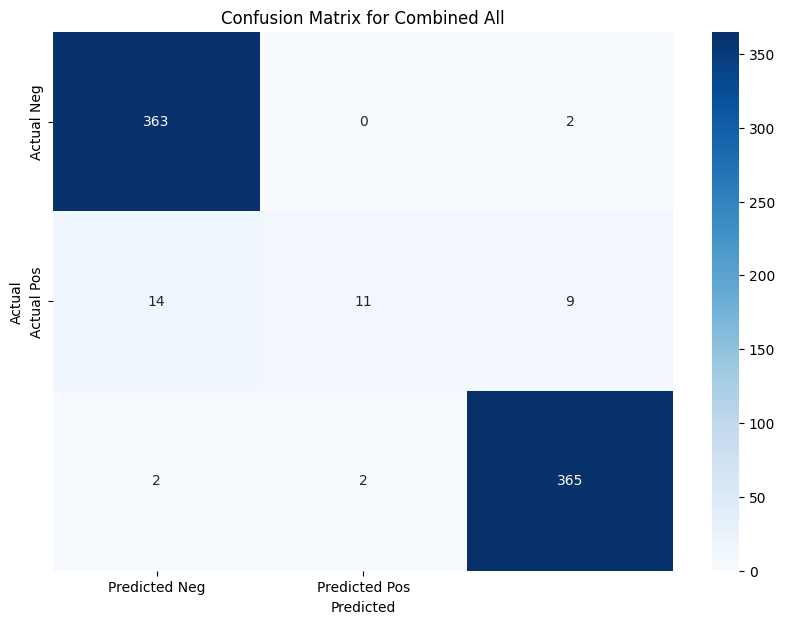

In [192]:
# Assuming X_all_train, y_all_train, X_all_test, y_all_test are defined
model_all, accuracy_all, report_all, log_loss_all = train_logistic_regression(
    X_all_train, y_all_train, X_all_test, y_all_test, 'Combined All',
    use_grid_search=True, C_values=[0.01, 0.1, 1, 10, 100], penalty_types=['l1', 'l2']
)


In [198]:
from tensorflow.keras.utils import to_categorical

# Example for one-hot encoding y_snli_train
y_snli_train_encoded = to_categorical(y_snli_train)
y_snli_test_encoded = to_categorical(y_snli_test)

y_mnli_matched_train_encoded = to_categorical(y_mnli_matched_train)
y_mnli_matched_test_encoded = to_categorical(y_mnli_matched_test)

y_mnli_mismatched_train_encoded = to_categorical(y_mnli_mismatched_train)
y_mnli_mismatched_test_encoded = to_categorical(y_mnli_mismatched_test)

y_anli_r1_train_encoded = to_categorical(y_anli_r1_train)
y_anli_r1_test_encoded = to_categorical(y_anli_r1_test)

y_anli_r2_train_encoded = to_categorical(y_anli_r2_train)
y_anli_r2_test_encoded = to_categorical(y_anli_r2_test)

y_anli_r3_train_encoded = to_categorical(y_anli_r3_train)
y_anli_r3_test_encoded = to_categorical(y_anli_r3_test)

y_all_train_encoded = to_categorical(y_all_train)
y_all_test_encoded = to_categorical(y_all_test)


In [199]:
 y_snli_train_encoded

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [200]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

def train_and_evaluate_fnn(X_train, y_train, X_test, y_test, num_classes, epochs=20, batch_size=32):
    """
    Builds, trains, and evaluates a feedforward neural network model.
    
    Returns:
    - model: Trained Keras model.
    - test_accuracy: Accuracy on the test set.
    - test_loss: Loss on the test set.
    - history: Training history object containing training and validation metrics.
    """
    model = Sequential([
        Dense(128, input_dim=X_train.shape[1], activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, validation_split=0.2, epochs=epochs, batch_size=batch_size, verbose=1)
    
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    
    return model, test_accuracy, test_loss, history


In [201]:
import matplotlib.pyplot as plt

def plot_training_history_fnn(history):
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    
    # Plot accuracy
    axes[0].plot(history.history['accuracy'], label='Train accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Validation accuracy')
    axes[0].set_title('Model Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend(loc='lower right')
    
    # Plot loss
    axes[1].plot(history.history['loss'], label='Train loss')
    axes[1].plot(history.history['val_loss'], label='Validation loss')
    axes[1].set_title('Model Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()


Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.6005 - loss: 0.9410 - val_accuracy: 0.9326 - val_loss: 0.4372
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9527 - loss: 0.4069 - val_accuracy: 0.9326 - val_loss: 0.2186
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9397 - loss: 0.2623 - val_accuracy: 0.9326 - val_loss: 0.1870
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9608 - loss: 0.1842 - val_accuracy: 0.9326 - val_loss: 0.1776
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9581 - loss: 0.1711 - val_accuracy: 0.9326 - val_loss: 0.1684
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9558 - loss: 0.1777 - val_accuracy: 0.9326 - val_loss: 0.1635
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9650 - loss: 0.1477 - val_accuracy: 0.9326 - val_loss: 0.1591
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9594 - loss: 0.1656 - val_accuracy: 0.9482 - val_los

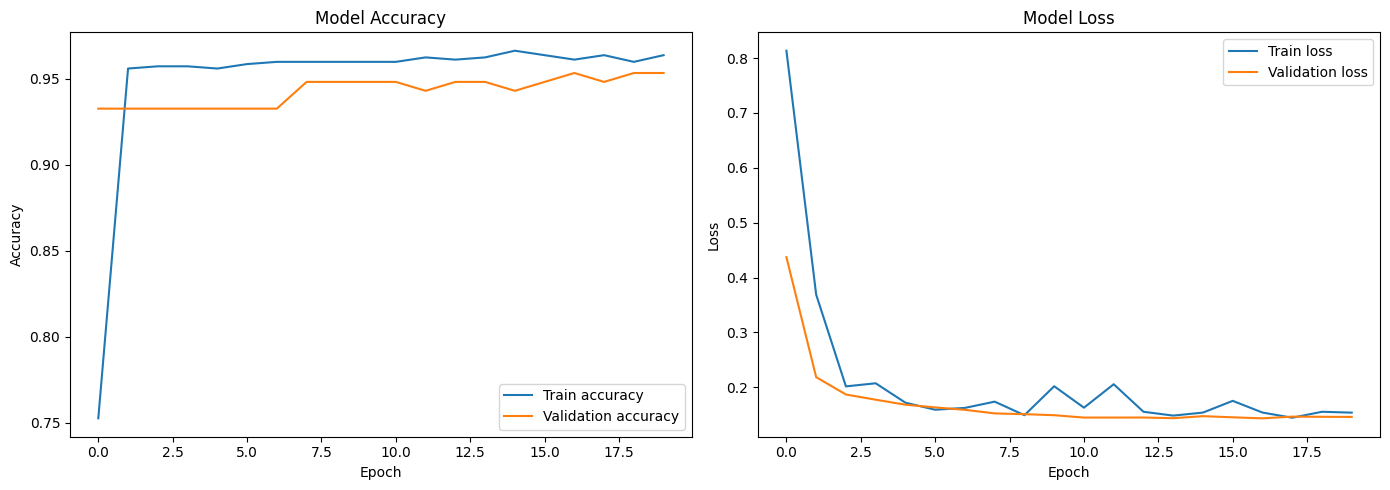

In [203]:
# Assuming the model creation and training function has been defined
model_snli, accuracy_snli, loss_snli, history_snli = train_and_evaluate_fnn(
    X_snli_train, y_snli_train_encoded, X_snli_test, y_snli_test_encoded, num_classes=y_snli_train_encoded.shape[1]
)

print(f"Test Accuracy for SNLI: {accuracy_snli:.4f}")
print(f"Test Loss for SNLI: {loss_snli:.4f}")

# Plot the training history
plot_training_history_fnn(history_snli)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 193ms/step - accuracy: 0.5534 - loss: 0.9731 - val_accuracy: 0.9628 - val_loss: 0.3970
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9461 - loss: 0.3882 - val_accuracy: 0.9628 - val_loss: 0.1911
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9637 - loss: 0.1952 - val_accuracy: 0.9628 - val_loss: 0.1894
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9680 - loss: 0.1457 - val_accuracy: 0.9628 - val_loss: 0.1841
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9752 - loss: 0.1226 - val_accuracy: 0.9628 - val_loss: 0.1813
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9709 - loss: 0.1459 - val_accuracy: 0.9628 - val_loss: 0.1801
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9711 - loss: 0.1457 - val_accuracy: 0.9628 - val_loss: 0.1778
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9659 - loss: 0.1587 - val_accuracy: 0.9628 - val_los

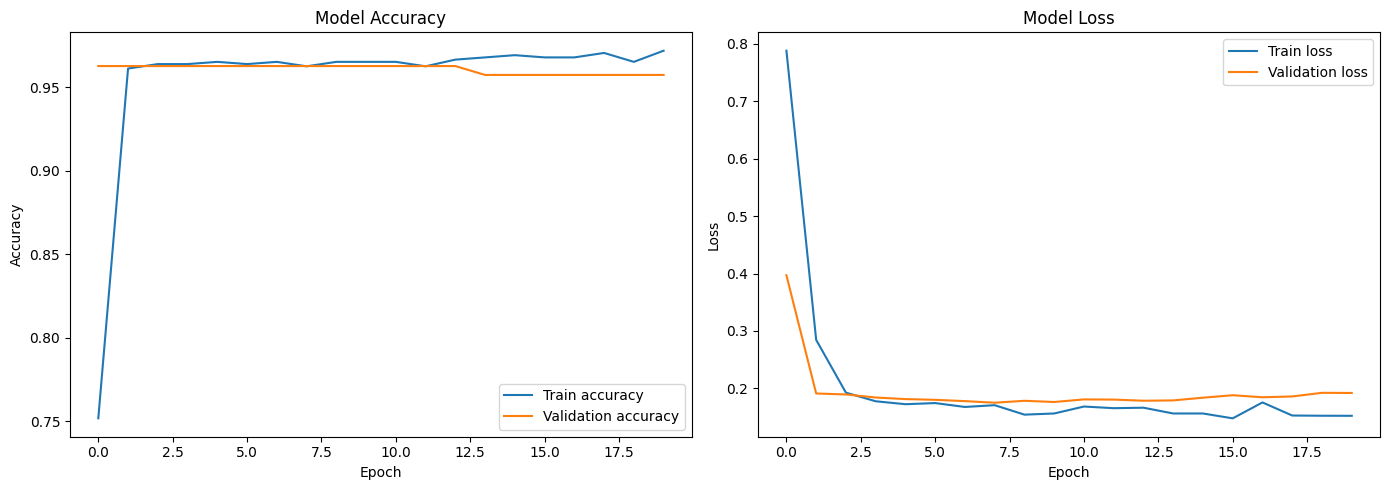

In [204]:
model_mnli_matched, accuracy_mnli_matched, loss_mnli_matched, history_mnli_matched = train_and_evaluate_fnn(
    X_mnli_matched_train, y_mnli_matched_train_encoded, X_mnli_matched_test, y_mnli_matched_test_encoded, num_classes=y_mnli_matched_train_encoded.shape[1]
)

print(f"Test Accuracy for MNLI Matched: {accuracy_mnli_matched:.4f}")
print(f"Test Loss for MNLI Matched: {loss_mnli_matched:.4f}")

# Plot the training history
plot_training_history_fnn(history_mnli_matched)


Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 178ms/step - accuracy: 0.6088 - loss: 0.9163 - val_accuracy: 0.9630 - val_loss: 0.3629
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9664 - loss: 0.3484 - val_accuracy: 0.9630 - val_loss: 0.1678
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9536 - loss: 0.2479 - val_accuracy: 0.9630 - val_loss: 0.1561
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9770 - loss: 0.1511 - val_accuracy: 0.9630 - val_loss: 0.1561
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9560 - loss: 0.2295 - val_accuracy: 0.9630 - val_loss: 0.1526
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9604 - loss: 0.2096 - val_accuracy: 0.9630 - val_loss: 0.1499
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9559 - loss: 0.2175 - val_accuracy: 0.9630 - val_loss: 0.1467
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9544 - loss: 0.2300 - val_accuracy: 0.9630 - val_los

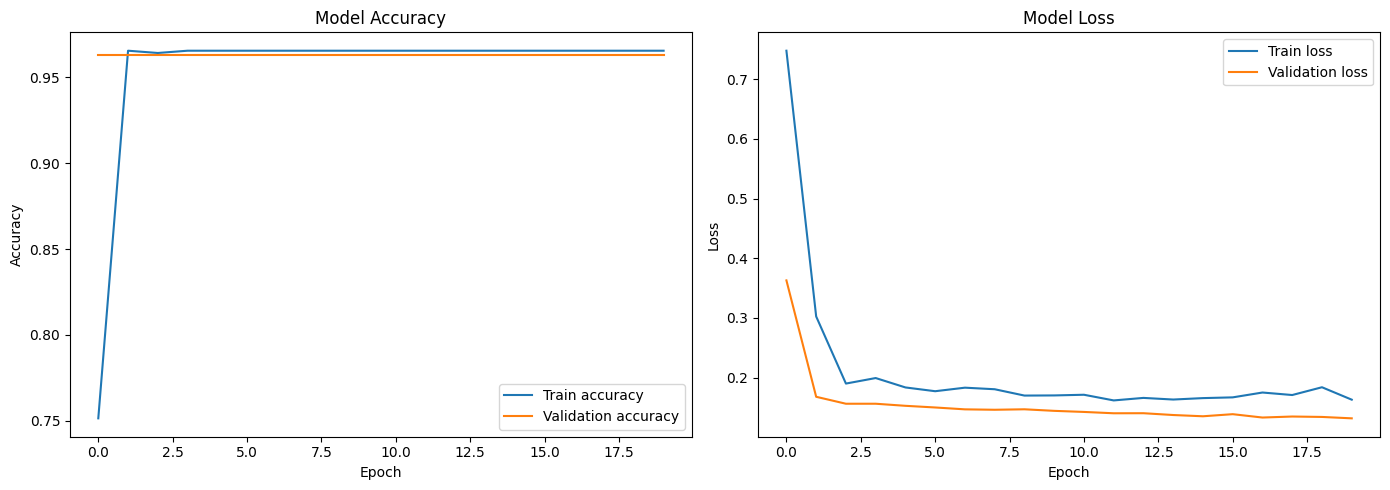

In [205]:
model_mnli_mismatched, accuracy_mnli_mismatched, loss_mnli_mismatched, history_mnli_mismatched = train_and_evaluate_fnn(
    X_mnli_mismatched_train, y_mnli_mismatched_train_encoded, X_mnli_mismatched_test, y_mnli_mismatched_test_encoded, num_classes=y_mnli_mismatched_train_encoded.shape[1]
)

print(f"Test Accuracy for MNLI Mismatched: {accuracy_mnli_mismatched:.4f}")
print(f"Test Loss for MNLI Mismatched: {loss_mnli_mismatched:.4f}")

# Plot the training history
plot_training_history_fnn(history_mnli_mismatched)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 4s/step - accuracy: 0.2068 - loss: 1.1611 - val_accuracy: 0.4286 - val_loss: 1.0707
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2685 - loss: 1.1239 - val_accuracy: 0.4286 - val_loss: 1.0430
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3843 - loss: 1.0911 - val_accuracy: 0.5714 - val_loss: 1.0199
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3966 - loss: 1.0591 - val_accuracy: 0.5714 - val_loss: 0.9989
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6053 - loss: 0.9921 - val_accuracy: 0.5714 - val_loss: 0.9792
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5930 - loss: 1.0014 - val_accuracy: 0.5714 - val_loss: 0.9604
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5475 - loss: 0.9776 - val_accuracy: 0.5714 - val_loss: 0.9438
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5351 - loss: 0.9400 - val_accuracy: 0.6429 - val_loss: 0.9283
Ep

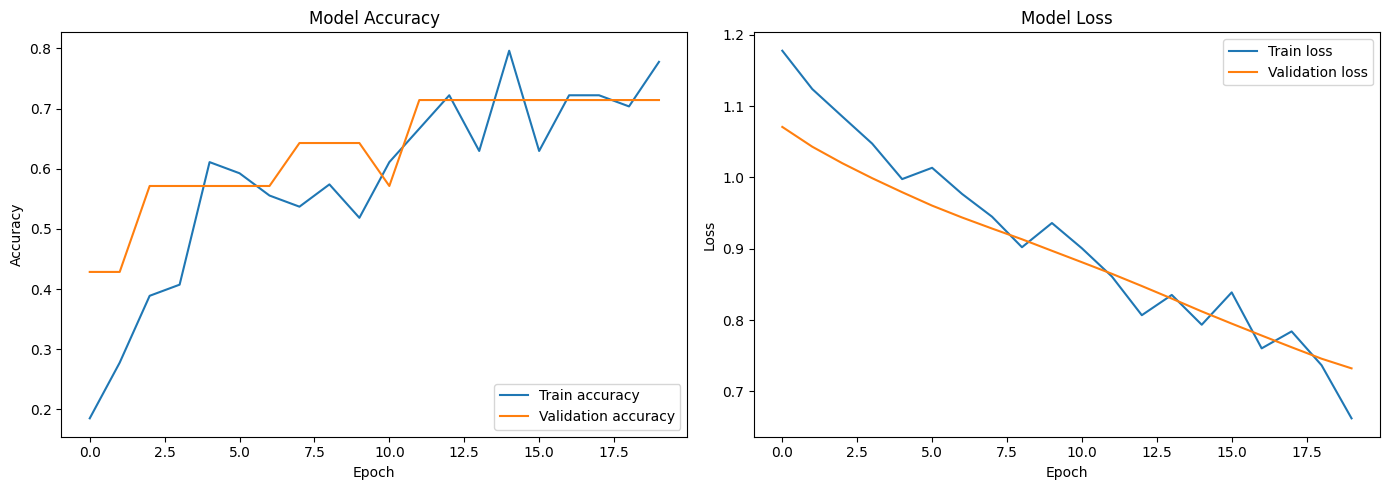

In [206]:
model_anli_r1, accuracy_anli_r1, loss_anli_r1, history_anli_r1 = train_and_evaluate_fnn(
    X_anli_r1_train, y_anli_r1_train_encoded, X_anli_r1_test, y_anli_r1_test_encoded, num_classes=y_anli_r1_train_encoded.shape[1]
)

print(f"Test Accuracy for ANLI R1: {accuracy_anli_r1:.4f}")
print(f"Test Loss for ANLI R1: {loss_anli_r1:.4f}")

# Plot the training history
plot_training_history_fnn(history_anli_r1)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step - accuracy: 0.3080 - loss: 1.1645 - val_accuracy: 0.5333 - val_loss: 1.1226
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2158 - loss: 1.2059 - val_accuracy: 0.5333 - val_loss: 1.0809
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3750 - loss: 1.0860 - val_accuracy: 0.5333 - val_loss: 1.0443
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4792 - loss: 1.0412 - val_accuracy: 0.5333 - val_loss: 1.0112
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4211 - loss: 1.0261 - val_accuracy: 0.5333 - val_loss: 0.9776
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4777 - loss: 1.0493 - val_accuracy: 0.6667 - val_loss: 0.9475
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3527 - loss: 1.0735 - val_accuracy: 0.8000 - val_loss: 0.9206
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4896 - loss: 1.0021 - val_accuracy: 0.8000 - val_loss: 0.8959
Ep

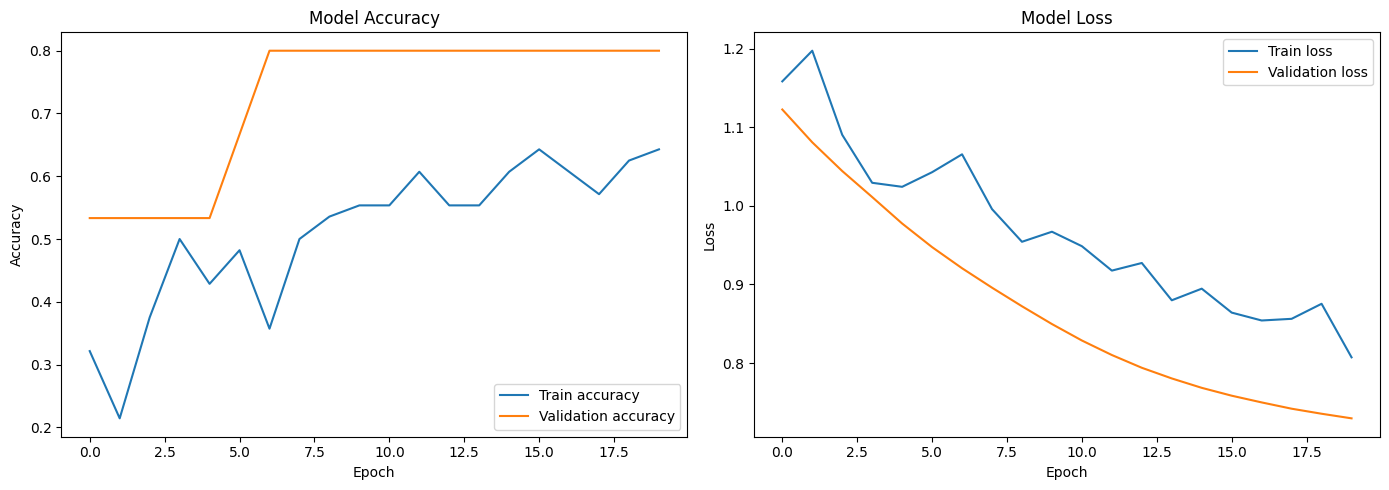

In [207]:
model_anli_r2, accuracy_anli_r2, loss_anli_r2, history_anli_r2 = train_and_evaluate_fnn(
    X_anli_r2_train, y_anli_r2_train_encoded, X_anli_r2_test, y_anli_r2_test_encoded, num_classes=y_anli_r2_train_encoded.shape[1]
)

print(f"Test Accuracy for ANLI R2: {accuracy_anli_r2:.4f}")
print(f"Test Loss for ANLI R2: {loss_anli_r2:.4f}")

# Plot the training history
plot_training_history_fnn(history_anli_r2)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2934 - loss: 1.1597 - val_accuracy: 0.6471 - val_loss: 1.0218
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3016 - loss: 1.1321 - val_accuracy: 0.6471 - val_loss: 0.9851
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3474 - loss: 1.0489 - val_accuracy: 0.6471 - val_loss: 0.9548
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4963 - loss: 1.0276 - val_accuracy: 0.6471 - val_loss: 0.9285
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4735 - loss: 1.0033 - val_accuracy: 0.7059 - val_loss: 0.9047
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5424 - loss: 0.9937 - val_accuracy: 0.7059 - val_loss: 0.8838
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6224 - loss: 0.9557 - val_accuracy: 0.7059 - val_loss: 0.8637
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4995 - loss: 0.9908 - val_accuracy: 0.7059 - val_loss: 0.8415
Ep

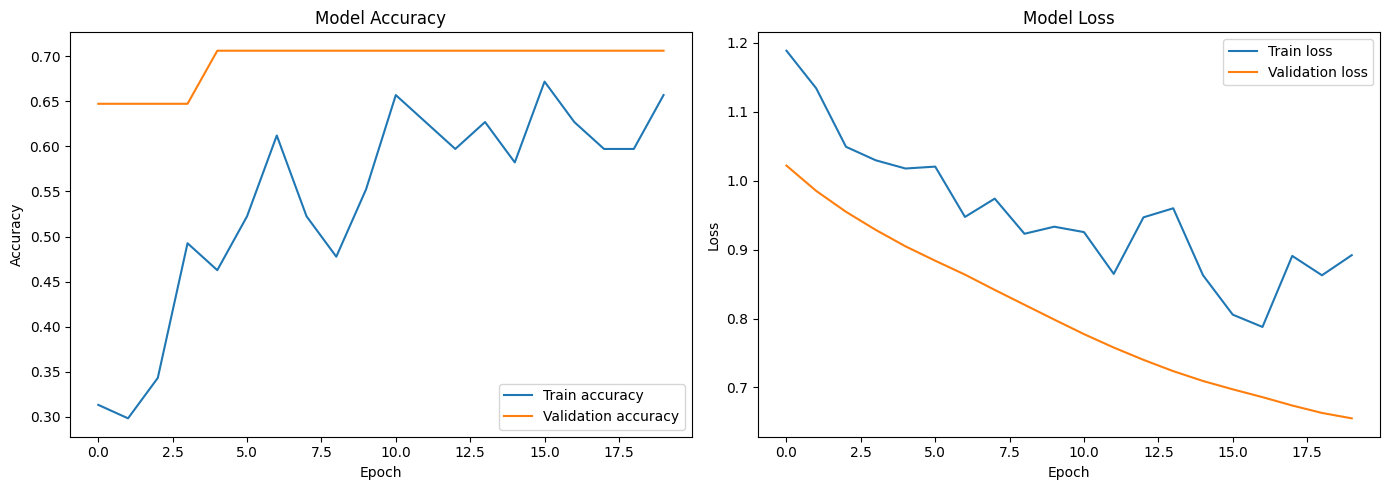

In [208]:
model_anli_r3, accuracy_anli_r3, loss_anli_r3, history_anli_r3 = train_and_evaluate_fnn(
    X_anli_r3_train, y_anli_r3_train_encoded, X_anli_r3_test, y_anli_r3_test_encoded, num_classes=y_anli_r3_train_encoded.shape[1]
)

print(f"Test Accuracy for ANLI R3: {accuracy_anli_r3:.4f}")
print(f"Test Loss for ANLI R3: {loss_anli_r3:.4f}")

# Plot the training history
plot_training_history_fnn(history_anli_r3)


Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 60ms/step - accuracy: 0.7194 - loss: 0.7911 - val_accuracy: 0.9496 - val_loss: 0.2126
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9363 - loss: 0.2567 - val_accuracy: 0.9496 - val_loss: 0.1804
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9349 - loss: 0.2457 - val_accuracy: 0.9512 - val_loss: 0.1737
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9347 - loss: 0.2378 - val_accuracy: 0.9528 - val_loss: 0.1753
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9419 - loss: 0.2294 - val_accuracy: 0.9593 - val_loss: 0.1776
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9494 - loss: 0.2193 - val_accuracy: 0.9593 - val_loss: 0.1656
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9464 - loss: 0.2135 - val_accuracy: 0.9610 - val_loss: 0.1614
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9434 - loss: 0.2085 - val_accuracy: 0.9593 - val_loss

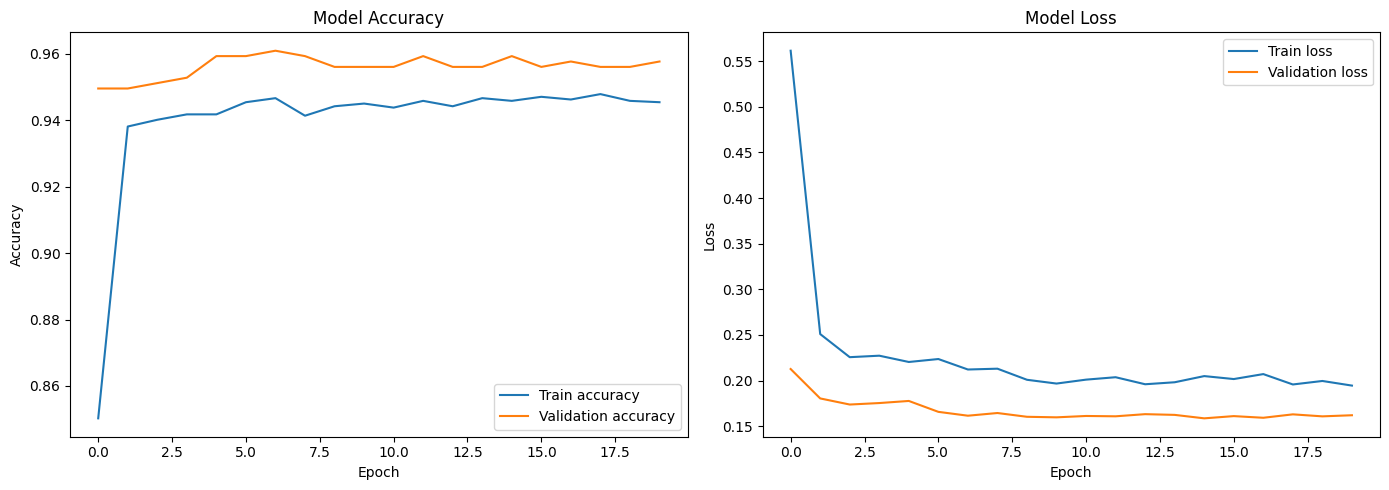

In [209]:
model_all, accuracy_all, loss_all, history_all = train_and_evaluate_fnn(
    X_all_train, y_all_train_encoded, X_all_test, y_all_test_encoded, num_classes=y_all_train_encoded.shape[1]
)

print(f"Test Accuracy for Combined Dataset: {accuracy_all:.4f}")
print(f"Test Loss for Combined Dataset: {loss_all:.4f}")

# Plot the training history
plot_training_history_fnn(history_all)
